# Lending Club

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Loan_data.csv')

C:\Users\jedru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df = pd.read_csv('Loan_data.csv', low_memory=False)

In [7]:
pd.set_option('display.max_columns', None)

# Część pierwsza - obróbka danych

Sprawdzenie ile mamy pustych wartości w datasecie (wartościowo), usunięcie informacji z przyszłości, usunięcie kolumn z > 35% wartości pustych NaN, Usunięcie kolumn ze zbędnymi informacjami lub z jedną unikatową wartością dla wszystkich obserwacji, sprawdzenie czy zbiór zawiera kolumny z tylko jedną unikatową wartością lub pustymi wartościami, zmiana typu wartości w niekótrych kolumnach i uzupełnienie pustych wartości.

In [8]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Jan-1985           735.0            739.0             1.0   
1         Apr-1999           740.0            744.0             5.0   
2         Nov-2001           735.0            739.0             2.0   
3         Feb-1996           690.0            694.0             1.0   
4         Jan-1996           695.0            699.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0      83.7%        9.0                   f        0.0   
1     1687.0       9.4%        4.0                   f        0.0   
2     2956.0      98.5%       10.0                   f        0.0   
3     5598.0        21%       37.0                   f        0.0   
4    27783.0      53.9%       38.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5863.1

In [9]:
df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
42531  73582        NaN     3500.0       3500.0            225.0   36 months   
42532  72998        NaN     1000.0       1000.0              0.0   36 months   
42533  72176        NaN     2525.0       2525.0            225.0   36 months   
42534  71623        NaN     6500.0       6500.0              0.0   36 months   
42535  70686        NaN     5000.0       5000.0              0.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
42531   10.28%       113.39     C        C1                         NaN   
42532    9.64%        32.11     B        B4  Halping hands company inc.   
42533    9.33%        80.69     B        B3                         NaN   
42534    8.38%       204.84     A        A5                         NaN   
42535    7.75%       156.11     A        A3                   Homemaker   

      emp_length home_ownership  annual_inc verification_status   issue_d  \
42531   < 1 year           RENT    180000.0        Not Verified  Jun-2007   
42532   < 1 year           RENT     12000.0        Not Verified  Jun-2007   
42533   < 1 year           RENT    110000.0        Not Verified  Jun-2007   
42534   < 1 year           NONE         NaN        Not Verified  Jun-2007   
42535  10+ years       MORTGAGE     70000.0        Not Verified  Jun-2007   

                                             loan_status pymnt_plan  \
42531  Does not meet the credit policy. Status:Fully ...          n   
42532  Does not meet the credit policy. Status:Fully ...          n   
42533  Does not meet the credit policy. Status:Fully ...          n   
42534  Does not meet the credit policy. Status:Fully ...          n   
42535  Does not meet the credit policy. Status:Fully ...          n   

                                                     url  \
42531  https://lendingclub.com/browse/loanDetail.acti...   
42532  https://lendingclub.com/browse/loanDetail.acti...   
42533  https://lendingclub.com/browse/loanDetail.acti...   
42534  https://lendingclub.com/browse/loanDetail.acti...   
42535  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc purpose  \
42531  I am getting married on July 28 and will need ...   other   
42532  I would like to buy some new furniture in my a...   other   
42533  I need to pay $2,100 for fixing my Volvo :)  A...   other   
42534  Hi,   I'm buying  a used car. Anybody on faceb...   other   
42535  I need to make several improvements around the...   other   

                   title zip_code addr_state    dti  delinq_2yrs  \
42531  Wedding coming up    100xx         NY  10.00          NaN   
42532            delight    021xx         MA  10.00          NaN   
42533    Car repair bill    100xx         NY  10.00          NaN   
42534       Buying a car    100xx         NY   4.00          NaN   
42535     Aroundthehouse    068xx         CT   8.81          NaN   

      earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
42531              NaN           685.0            689.0             NaN   
42532              NaN           695.0            699.0             NaN   
42533              NaN           710.0            714.0             NaN   
42534              NaN           740.0            744.0             NaN   
42535              NaN           770.0            774.0             NaN   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
42531                     NaN                     NaN       NaN      NaN   
42532                     NaN                     NaN       NaN      NaN   
42533                     NaN                     NaN       NaN      NaN   
42534                     NaN                     NaN       NaN      NaN   
42535                     NaN                     NaN       NaN      NaN   

       revol_bal revol_util  total_acc initial_list_status  out_prncp  \
42531        0.0        NaN 

In [10]:
df.sample(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
35059  442421        NaN     8000.0       8000.0           8000.0   36 months   
16592  730804        NaN     8000.0       8000.0           8000.0   36 months   
14061  771896        NaN     1500.0       1500.0           1500.0   36 months   
22610  625946        NaN    10000.0      10000.0           9975.0   60 months   
34842  445664        NaN     5500.0       5500.0           5500.0   36 months   

      int_rate  installment grade sub_grade                 emp_title  \
35059   11.48%       263.75     B        B2  ny presbyterian hospital   
16592   11.11%       262.33     B        B5                       NaN   
14061   12.99%        50.54     C        C1                  plus One   
22610   13.72%       231.24     C        C5             state of ohio   
34842   15.31%       191.49     D        D3                 Shire HGT   

      emp_length home_ownership  annual_inc verification_status   issue_d  \
35059  10+ years           RENT     36000.0            Verified  Sep-2009   
16592        NaN           RENT     35142.0     Source Verified  Apr-2011   
14061    7 years           RENT     27340.0            Verified  Jun-2011   
22610    2 years           RENT     40000.0        Not Verified  Dec-2010   
34842    5 years           RENT     43000.0            Verified  Oct-2009   

      loan_status pymnt_plan  \
35059  Fully Paid          n   
16592  Fully Paid          n   
14061  Fully Paid          n   
22610  Fully Paid          n   
34842  Fully Paid          n   

                                                     url  \
35059  https://lendingclub.com/browse/loanDetail.acti...   
16592  https://lendingclub.com/browse/loanDetail.acti...   
14061  https://lendingclub.com/browse/loanDetail.acti...   
22610  https://lendingclub.com/browse/loanDetail.acti...   
34842  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
35059  in intend to use the money to pay off in full ...  debt_consolidation   
16592  I currently have 3 credit cards that I am tryi...  debt_consolidation   
14061                                                NaN  debt_consolidation   
22610                                                NaN  debt_consolidation   
34842  To Whom It May Concern: I am applying for this...             wedding   

                                        title zip_code addr_state    dti  \
35059                           personal loan    112xx         NY   2.90   
16592                        CC Nullification    208xx         MD   9.56   
14061                 Debt Consolidation Loan    981xx         WA  24.32   
22610                  get out of debt faster    440xx         OH  22.83   
34842   Wedding Loan- Sudden Budget Shortfall    021xx         MA   0.28   

       delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
35059          0.0         Oct-2004           725.0            729.0   
16592          1.0         Apr-2000           695.0            699.0   
14061          0.0         Aug-2000           675.0            679.0   
22610          0.0         May-2001           685.0            689.0   
34842          0.0         Jun-2000           675.0            679.0   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
35059             1.0                     NaN                     NaN   
16592             1.0                     9.0                     NaN   
14061             2.0                     NaN                     NaN   
22610             1.0                    31.0                     NaN   
34842             0.0                    33.0                     NaN   

       open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
35059       7.0      0.0     2980.0      31.7%       10.0                   f   
16592       9.0      0.0     7747.0      59.1%       13.0                   f   
14061      18.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [12]:
df.isnull().sum()

id                           0
member_id                42536
loan_amnt                    1
funded_amnt                  1
funded_amnt_inv              1
                         ...  
settlement_status        42376
settlement_date          42376
settlement_amount        42376
settlement_percentage    42376
settlement_term          42376
Length: 151, dtype: int64

In [13]:
df.shape

(42536, 151)

In [14]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [15]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [16]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                         0.00
member_id                100.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
                          ...  
settlement_status         99.62
settlement_date           99.62
settlement_amount         99.62
settlement_percentage     99.62
settlement_term           99.62
Length: 151, dtype: float64

In [17]:
df = df.drop([
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'hardship_amount',
    'hardship_end_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag',
    'debt_settlement_flag_date',
    'settlement_status',
    'settlement_percentage',
    'mths_since_last_delinq',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'hardship_start_date'], axis=1)

In [18]:
df.dropna(thresh=df.shape[0]*0.35,how='all',axis=1,inplace=True)

In [19]:
df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title emp_length  \
0       162.87     B        B2                       NaN  10+ years   
1        59.83     C        C4                     Ryder   < 1 year   
2        84.33     C        C5                       NaN  10+ years   
3       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
0         Jan-1985           735.0            739.0             1.0       3.0   
1         Apr-1999           740.0            744.0             5.0       3.0   
2         Nov-2001           735.0            739.0             2.0       2.0   
3         Feb-1996           690.0            694.0             1.0      10.0   
4         Jan-1996           695.0            699.0             0.0      15.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    13648.0      83.7%        9.0                   f        0.0   
1      0.0     1687.0       9.4%        4.0                   f        0.0   
2      0.0     2956.0      98.5%       10.0                   f        0.0   
3      0.0     5598.0        21%       37.0                   f        0.0   
4      0.0    27783.0      53.9%       38.0                   f        0.0   

   out_prncp_inv  total_rec_int  total_rec_late_fee  recoveries  \
0            0.0         863.16                0.00         0.0   
1            0.0         435.17                0.00       122.9   
2            0.0         605.67                0.00         0.0   
3            0.0        2214.92               16.97         0.0   
4            0.0        1066.91                0.00         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d

<AxesSubplot:xlabel='loan_status', ylabel='count'>

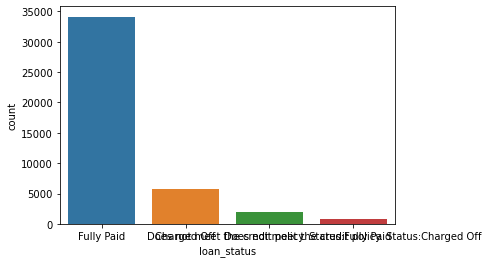

In [20]:
sns.countplot(data=df,x='loan_status')

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [22]:
df.loc[ df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'Fully Paid'
df.loc[ df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'Charged Off'
df.loc[df['loan_status'] == 'Charged Off', 'loan_status'] = int(0)
df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = int(1) 

In [23]:
target = df['loan_status']

In [24]:
df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title emp_length  \
0       162.87     B        B2                       NaN  10+ years   
1        59.83     C        C4                     Ryder   < 1 year   
2        84.33     C        C5                       NaN  10+ years   
3       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0           RENT     24000.0            Verified  Dec-2011           1   
1           RENT     30000.0     Source Verified  Dec-2011           0   
2           RENT     12252.0        Not Verified  Dec-2011           1   
3           RENT     49200.0     Source Verified  Dec-2011           1   
4           RENT     80000.0     Source Verified  Dec-2011           1   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
0         Jan-1985           735.0            739.0             1.0       3.0   
1         Apr-1999           740.0            744.0             5.0       3.0   
2         Nov-2001           735.0            739.0             2.0       2.0   
3         Feb-1996           690.0            694.0             1.0      10.0   
4         Jan-1996           695.0            699.0             0.0      15.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    13648.0      83.7%        9.0                   f        0.0   
1      0.0     1687.0       9.4%        4.0                   f        0.0   
2      0.0     2956.0      98.5%       10.0                   f        0.0   
3      0.0     5598.0        21%       37.0                   f        0.0   
4      0.0    27783.0      53.9%       38.0                   f        0.0   

   out_prncp_inv  total_rec_int  total_rec_late_fee  recoveries  \
0            0.0         863.16                0.00         0.0   
1            0.0         435.17                0.00       122.9   
2            0.0         605.67                0.00         0.0   
3            0.0        2214.92               16.97         0.0   
4            0.0        1066.91                0.00         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0 

In [25]:
df = df.drop([
    'url',
    'zip_code',
    'pymnt_plan',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'application_type',
    'disbursement_method',
    'addr_state',
    'tax_liens'], axis=1)

In [26]:
df.loc[:, df.nunique() == 1]

collections_12_mths_ex_med  policy_code  chargeoff_within_12_mths
0                             0.0          1.0                       0.0
1                             0.0          1.0                       0.0
2                             0.0          1.0                       0.0
3                             0.0          1.0                       0.0
4                             0.0          1.0                       0.0
...                           ...          ...                       ...
42531                         NaN          1.0                       NaN
42532                         NaN          1.0                       NaN
42533                         NaN          1.0                       NaN
42534                         NaN          1.0                       NaN
42535                         NaN          1.0                       NaN

[42536 rows x 3 columns]

In [27]:
df=df.loc[:, df.nunique() != 1]
df.shape

(42536, 42)

In [28]:
df.drop(['emp_title'], axis = 1, inplace = True)

In [29]:
df.isnull().sum()

id                             0
loan_amnt                      1
funded_amnt                    1
funded_amnt_inv                1
term                           1
int_rate                       1
installment                    1
grade                          1
sub_grade                      1
emp_length                  1113
home_ownership                 1
annual_inc                     5
verification_status            1
issue_d                        1
loan_status                    1
desc                       13294
purpose                        1
title                         14
dti                            1
delinq_2yrs                   30
earliest_cr_line              30
fico_range_low                 1
fico_range_high                1
inq_last_6mths                30
open_acc                      30
pub_rec                       30
revol_bal                      1
revol_util                    91
total_acc                     30
total_rec_int                  1
total_rec_

In [30]:
df.shape

(42536, 41)

In [31]:
df.dropna(axis=0, how='any')

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501     5000.0       5000.0      4975.000000   36 months   10.65%   
1      1077430     2500.0       2500.0      2500.000000   60 months   15.27%   
3      1076863    10000.0      10000.0     10000.000000   36 months   13.49%   
4      1075358     3000.0       3000.0      3000.000000   60 months   12.69%   
6      1069639     7000.0       7000.0      7000.000000   60 months   15.96%   
...        ...        ...          ...              ...         ...      ...   
42371   136976    20425.0       8500.0      1849.998917   36 months   15.96%   
42386   133891     4400.0       4400.0      1200.000000   36 months   17.86%   
42454   119262     5700.0       5700.0      1450.000000   36 months   13.43%   
42466   114838     6000.0       6000.0      1025.000000   36 months   12.80%   
42474   113450    13000.0      13000.0       700.000000   36 months   10.91%   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ years           RENT     24000.0   
1            59.83     C        C4   < 1 year           RENT     30000.0   
3           339.31     C        C1  10+ years           RENT     49200.0   
4            67.79     B        B5     1 year           RENT     80000.0   
6           170.08     C        C5    8 years           RENT     47004.0   
...            ...   ...       ...        ...            ...         ...   
42371       298.67     F        F4    4 years           RENT     29000.0   
42386       158.77     G        G5    9 years       MORTGAGE    125000.0   
42454       193.26     E        E1    5 years           RENT     65000.0   
42466       201.60     D        D4    8 years           RENT     57000.0   
42474       425.04     C        C3    2 years       MORTGAGE     62000.0   

      verification_status   issue_d loan_status  \
0                Verified  Dec-2011           1   
1         Source Verified  Dec-2011           0   
3         Source Verified  Dec-2011           1   
4         Source Verified  Dec-2011           1   
6            Not Verified  Dec-2011           1   
...                   ...       ...         ...   
42371        Not Verified  Oct-2007           0   
42386        Not Verified  Oct-2007           1   
42454        Not Verified  Aug-2007           1   
42466        Not Verified  Aug-2007           1   
42474        Not Verified  Aug-2007           1   

                                                    desc             purpose  \
0        Borrower added on 12/22/11 > I need to upgra...         credit_card   
1        Borrower added on 12/22/11 > I plan to use t...                 car   
3        Borrower added on 12/21/11 > to pay for prop...               other   
4        Borrower added on 12/21/11 > I plan on combi...               other   
6        Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
...                                                  ...                 ...   
42371  pay off credit cards, medical bills, student l...  debt_consolidation   
42386  I am trying to consolidate some high interest ...  debt_consolidation   
42454  Since I had to file bankruptcy in 2005 (medica...  debt_consolidation   
42466  I fell into a credit card trap where I unfortu...  debt_consolidation   
42474  Wanted to consolidate all debt into one paymen...  debt_consolidation   

                                 title    dti  delinq_2yrs earliest_cr_line  \
0                             Computer  27.65          0.0         Jan-1985   
1                                 bike   1.00          0.0         Apr-1999   
3                             personel  20.00          0.0         Feb-1996   
4                             Personal  17.94          0.0         Jan-1996   
6                                 Loan  23.51          0.0         Jul-2005   
...                                ...    ...          ...              ...   
42371   Nee

In [32]:
df.isnull().sum()

id                             0
loan_amnt                      1
funded_amnt                    1
funded_amnt_inv                1
term                           1
int_rate                       1
installment                    1
grade                          1
sub_grade                      1
emp_length                  1113
home_ownership                 1
annual_inc                     5
verification_status            1
issue_d                        1
loan_status                    1
desc                       13294
purpose                        1
title                         14
dti                            1
delinq_2yrs                   30
earliest_cr_line              30
fico_range_low                 1
fico_range_high                1
inq_last_6mths                30
open_acc                      30
pub_rec                       30
revol_bal                      1
revol_util                    91
total_acc                     30
total_rec_int                  1
total_rec_

In [33]:
df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status   issue_d loan_status  \
0            Verified  Dec-2011           1   
1     Source Verified  Dec-2011           0   
2        Not Verified  Dec-2011           1   
3     Source Verified  Dec-2011           1   
4     Source Verified  Dec-2011           1   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0              Computer  27.65          0.0         Jan-1985           735.0   
1                  bike   1.00          0.0         Apr-1999           740.0   
2  real estate business   8.72          0.0         Nov-2001           735.0   
3              personel  20.00          0.0         Feb-1996           690.0   
4              Personal  17.94          0.0         Jan-1996           695.0   

   fico_range_high  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            739.0             1.0       3.0      0.0    13648.0      83.7%   
1            744.0             5.0       3.0      0.0     1687.0       9.4%   
2            739.0             2.0       2.0      0.0     2956.0      98.5%   
3            694.0             1.0      10.0      0.0     5598.0        21%   
4            699.0             0.0      15.0      0.0    27783.0      53.9%   

   total_acc  total_rec_int  total_rec_late_fee  recoveries  \
0        9.0         863.16                0.00         0.0   
1        4.0         435.17                0.00       122.9   
2       10.0         605.67                0.00         0.0   
3       37.0        2214.92               16.97         0.0   
4       38.0        1066.91                0.00         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00     Jan-2015           171.62           Aug-2018   
1                     1.11     Apr-2013           119.66           Oct-2016   
2                     0.00     Jun-2014           649.91           Jun-2017   
3                     0.00     Jan-2015           357.48           Apr-2016   
4                     0.00     Jan-2017            67.30           Apr-2018   

   last_fico_range_high  last_fico_range_low  acc_now_delinq  delinq_amnt  \
0                 739.0                735.0             0.0          0.0   
1                 499.0                  0.0             0.0          0.0   
2                 739.0                735.0             0.0          0.0   
3                 604.0                600.0             0.0          0.0   
4                 684.0                680.0             0.0          0.0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       42536 non-null  object 
 1   loan_amnt                42535 non-null  float64
 2   funded_amnt              42535 non-null  float64
 3   funded_amnt_inv          42535 non-null  float64
 4   term                     42535 non-null  object 
 5   int_rate                 42535 non-null  object 
 6   installment              42535 non-null  float64
 7   grade                    42535 non-null  object 
 8   sub_grade                42535 non-null  object 
 9   emp_length               41423 non-null  object 
 10  home_ownership           42535 non-null  object 
 11  annual_inc               42531 non-null  float64
 12  verification_status      42535 non-null  object 
 13  issue_d                  42535 non-null  object 
 14  loan_status           

In [35]:
df['int_rate'] = df['int_rate'].str.rstrip("%").astype(float)
df['term'] = df['term'].str.rstrip("months").astype(float)
df['revol_util'] = df['revol_util'].str.rstrip("%").astype(float)

In [36]:
df.rename(columns={'int_rate': 'int_rate_in_%',
                   'revol_util': 'revol_util_in_%'},
          inplace=True, errors='raise')


In [37]:
df.sample(2)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_in_%  \
29459  522809    25000.0      16000.0     12362.340000  36.0          10.75   
19262  670575    16200.0      16200.0     16193.388042  60.0          17.14   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
29459       521.93     B        B2    3 years       MORTGAGE    100000.0   
19262       403.84     E        E3    3 years           RENT     53000.0   

      verification_status   issue_d loan_status desc purpose           title  \
29459            Verified  Jun-2010           1  NaN   other  GoldenWood2010   
19262            Verified  Feb-2011           0  NaN     car            Auto   

         dti  delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
29459   8.70          0.0         Nov-1993           750.0            754.0   
19262  14.31          0.0         Dec-1988           685.0            689.0   

       inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util_in_%  \
29459             1.0      15.0      0.0    22638.0             23.1   
19262             1.0       8.0      0.0    17699.0             73.7   

       total_acc  total_rec_int  total_rec_late_fee  recoveries  \
29459       33.0         808.68                 0.0        0.00   
19262       13.0        6598.06                 0.0     1826.16   

       collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
29459                   0.0000     Dec-2010         14204.86   
19262                  98.2616     Mar-2014           421.07   

      last_credit_pull_d  last_fico_range_high  last_fico_range_low  \
29459           Aug-2016                 669.0                665.0   
19262           Oct-2016                 584.0                580.0   

       acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  
29459             0.0          0.0                   0.0  
19262             0.0          0.0                   0.0

In [38]:
def leave_only_digits(rec):
    new_rec=[]
    if type(rec)==float:
        return rec
    for char in rec:
        if char.isdigit():
            new_rec.append(char)
    return int(''.join(new_rec))


df['emp_length']=df.emp_length.apply(leave_only_digits)

In [39]:
df.isnull().sum()

id                             0
loan_amnt                      1
funded_amnt                    1
funded_amnt_inv                1
term                           1
int_rate_in_%                  1
installment                    1
grade                          1
sub_grade                      1
emp_length                  1113
home_ownership                 1
annual_inc                     5
verification_status            1
issue_d                        1
loan_status                    1
desc                       13294
purpose                        1
title                         14
dti                            1
delinq_2yrs                   30
earliest_cr_line              30
fico_range_low                 1
fico_range_high                1
inq_last_6mths                30
open_acc                      30
pub_rec                       30
revol_bal                      1
revol_util_in_%               91
total_acc                     30
total_rec_int                  1
total_rec_

In [40]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(df['delinq_2yrs'].median())
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df['inq_last_6mths'].median())
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].median())
df['revol_util_in_%'] = df['revol_util_in_%'].fillna(df['revol_util_in_%'].median())

In [41]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].value_counts().idxmax(), inplace=True)
df['title'].fillna(df['title'].value_counts().idxmax(), inplace=True)

In [42]:
df['desc'] = df['desc'].fillna(0)

In [43]:
df = df.drop(['id','total_acc','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_credit_pull_d','last_pymnt_amnt','last_fico_range_high','last_fico_range_low','collection_recovery_fee','acc_now_delinq','delinq_amnt','pub_rec','issue_d'], axis=1)

In [44]:
df.shape

(42536, 26)

In [45]:
df.dropna(axis=0, how='any', inplace=True)

In [46]:
df = df.drop_duplicates()

In [47]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate_in_%           0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
desc                    0
purpose                 0
title                   0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util_in_%         0
pub_rec_bankruptcies    0
dtype: int64

In [48]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_in_%  installment  \
0     5000.0       5000.0           4975.0  36.0          10.65       162.87   
1     2500.0       2500.0           2500.0  60.0          15.27        59.83   
2     2400.0       2400.0           2400.0  36.0          15.96        84.33   
3    10000.0      10000.0          10000.0  36.0          13.49       339.31   
4     3000.0       3000.0           3000.0  60.0          12.69        67.79   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2        10.0           RENT     24000.0            Verified   
1     C        C4         1.0           RENT     30000.0     Source Verified   
2     C        C5        10.0           RENT     12252.0        Not Verified   
3     C        C1        10.0           RENT     49200.0     Source Verified   
4     B        B5         1.0           RENT     80000.0     Source Verified   

  loan_status                                               desc  \
0           1    Borrower added on 12/22/11 > I need to upgra...   
1           0    Borrower added on 12/22/11 > I plan to use t...   
2           1                                                  0   
3           1    Borrower added on 12/21/11 > to pay for prop...   
4           1    Borrower added on 12/21/11 > I plan on combi...   

          purpose                 title    dti  delinq_2yrs earliest_cr_line  \
0     credit_card              Computer  27.65          0.0         Jan-1985   
1             car                  bike   1.00          0.0         Apr-1999   
2  small_business  real estate business   8.72          0.0         Nov-2001   
3           other              personel  20.00          0.0         Feb-1996   
4           other              Personal  17.94          0.0         Jan-1996   

   fico_range_low  fico_range_high  inq_last_6mths  open_acc  revol_bal  \
0           735.0            739.0             1.0       3.0    13648.0   
1           740.0            744.0             5.0       3.0     1687.0   
2           735.0            739.0             2.0       2.0     2956.0   
3           690.0            694.0             1.0      10.0     5598.0   
4           695.0            699.0             0.0      15.0    27783.0   

   revol_util_in_%  pub_rec_bankruptcies  
0             83.7                   0.0  
1              9.4                   0.0  
2             98.5                   0.0  
3             21.0                   0.0  
4             53.9                   0.0

In [49]:
df.shape

(42506, 26)

In [50]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate_in_%',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'desc', 'purpose',
       'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util_in_%', 'pub_rec_bankruptcies'],
      dtype='object')

# Część druga - Eksploracyjna analiza danych

In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [52]:
df.describe().T

count          mean           std      min       25%  \
loan_amnt             42506.0  11094.625465   7410.835576   500.00   5200.00   
funded_amnt           42506.0  10826.355691   7146.772440   500.00   5006.25   
funded_amnt_inv       42506.0  10146.285141   7129.794024     0.00   4950.00   
term                  42506.0     42.211453     10.511675    36.00     36.00   
int_rate_in_%         42506.0     12.166921      3.708235     5.42      9.63   
installment           42506.0    322.759750    208.924211    15.67    165.67   
emp_length            42506.0      5.019644      3.370396     1.00      2.00   
annual_inc            42506.0  69135.339884  64096.039777  1896.00  40000.00   
dti                   42506.0     13.376882      6.725965     0.00      8.20   
delinq_2yrs           42506.0      0.152449      0.512406     0.00      0.00   
fico_range_low        42506.0    713.044982     36.182005   610.00    685.00   
fico_range_high       42506.0    717.044982     36.182005   614.00    689.00   
inq_last_6mths        42506.0      1.081424      1.527455     0.00      0.00   
open_acc              42506.0      9.343951      4.496274     1.00      6.00   
revol_bal             42506.0  14307.615725  22022.782452     0.00   3646.00   
revol_util_in_%       42506.0     49.117992     28.343920     0.00     25.80   
pub_rec_bankruptcies  42506.0      0.043806      0.205582     0.00      0.00   

                           50%        75%         max  
loan_amnt              9750.00  15000.000    35000.00  
funded_amnt            9600.00  15000.000    35000.00  
funded_amnt_inv        8500.00  14000.000    35000.00  
term                     36.00     60.000       60.00  
int_rate_in_%            11.99     14.720       24.59  
installment             277.86    428.500     1305.19  
emp_length                4.00      9.000       10.00  
annual_inc            59000.00  82485.000  6000000.00  
dti                      13.48     18.680       29.99  
delinq_2yrs               0.00      0.000       13.00  
fico_range_low          710.00    740.000      825.00  
fico_range_high         714.00    744.000      829.00  
inq_last_6mths            1.00      2.000       33.00  
open_acc                  9.00     12.000       47.00  
revol_bal              8829.50  17258.000  1207359.00  
revol_util_in_%          49.70     72.675      119.00  
pub_rec_bankruptcies      0.00      0.000        2.00

## 2.1 Outliers

### 2.1.1. Wykrywanie outlierów

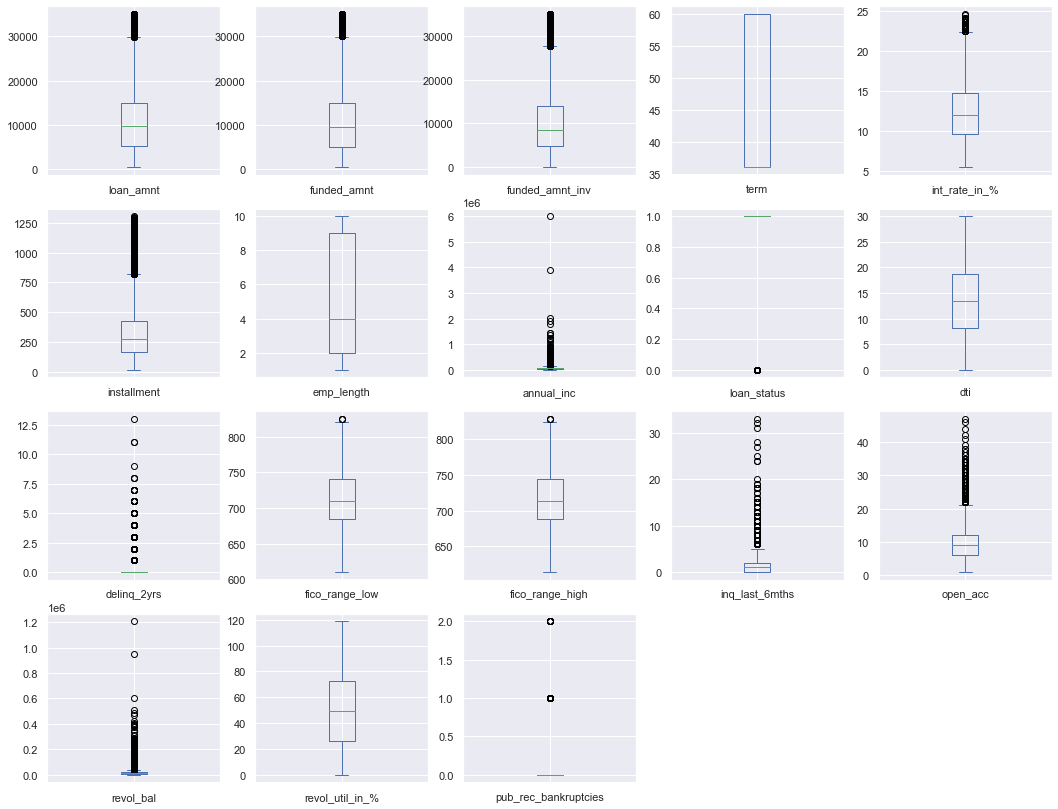

In [53]:
df.plot(kind='box', figsize=(18, 18), subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

In [54]:
Q1=df['loan_amnt'].quantile(q=0.25)
Q3=df['loan_amnt'].quantile(q=0.75)
print('1st Quartile (Q1) is:', Q1)
print('3st Quartile (Q3) is:', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['loan_amnt']))

1st Quartile (Q1) is: 5200.0
3st Quartile (Q3) is: 15000.0
Interquartile range (IQR) is 9800.0


In [55]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in loan amount:', L_outliers)
print('Upper outliers in loan amount:', U_outliers)

Lower outliers in loan amount: -9500.0
Upper outliers in loan amount: 29700.0


In [56]:
print('Number of outliers in loan amount upper:', df[df['loan_amnt']>29700]['loan_amnt'].count())
print('Number of outliers in loan amount lower:', df[df['loan_amnt']<-9500]['loan_amnt'].count())
print('% of Outlier in loan amount upper:',round(df[df['loan_amnt']>29700]['loan_amnt'].count()*100/len(df)),'%')
print('% of Outlier in loan amount lower:',round(df[df['loan_amnt']<-9500]['loan_amnt'].count()*100/len(df)),'%')

Number of outliers in loan amount upper: 1218
Number of outliers in loan amount lower: 0
% of Outlier in loan amount upper: 3 %
% of Outlier in loan amount lower: 0 %


In [57]:
Q1=df['annual_inc'].quantile(q=0.25)
Q3=df['annual_inc'].quantile(q=0.75)
print('1st Quartile (Q1) is:', Q1)
print('3st Quartile (Q3) is:', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['annual_inc']))

1st Quartile (Q1) is: 40000.0
3st Quartile (Q3) is: 82485.0
Interquartile range (IQR) is 42485.0


In [58]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in annual income:', L_outliers)
print('Upper outliers in annual income:', U_outliers)

Lower outliers in annual income: -23727.5
Upper outliers in annual income: 146212.5


In [59]:
print('Number of outliers in annual income upper:', df[df['annual_inc']>146212.5]['annual_inc'].count())
print('Number of outliers in annual income lower:', df[df['annual_inc']<-23727.5]['annual_inc'].count())
print('% of Outlier in annual income upper:',round(df[df['annual_inc']>146212.5]['annual_inc'].count()*100/len(df)),'%')
print('% of Outlier in annual income lower:',round(df[df['annual_inc']<-23727.5]['annual_inc'].count()*100/len(df)),'%')

Number of outliers in annual income upper: 2029
Number of outliers in annual income lower: 0
% of Outlier in annual income upper: 5 %
% of Outlier in annual income lower: 0 %


In [60]:
Q1=df['installment'].quantile(q=0.25)
Q3=df['installment'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['installment']))

1st Quartile (Q1) is:  165.67
3st Quartile (Q3) is:  428.5
Interquartile range (IQR) is  262.83000000000004


In [61]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in installment: ', L_outliers)
print('Upper outliers in installment: ', U_outliers)

Lower outliers in installment:  -228.57500000000007
Upper outliers in installment:  822.7450000000001


In [62]:
print('Number of outliers in installment upper:', df[df['installment']>822.74]['installment'].count())
print('Number of outliers in installment lower:', df[df['installment']<-228.58]['installment'].count())
print('% of Outlier in annual installment:',round(df[df['installment']>822.74]['installment'].count()*100/len(df)),'%')
print('% of Outlier in installment lower:',round(df[df['installment']<-228.58]['installment'].count()*100/len(df)),'%')

Number of outliers in installment upper: 1392
Number of outliers in installment lower: 0
% of Outlier in annual installment: 3 %
% of Outlier in installment lower: 0 %


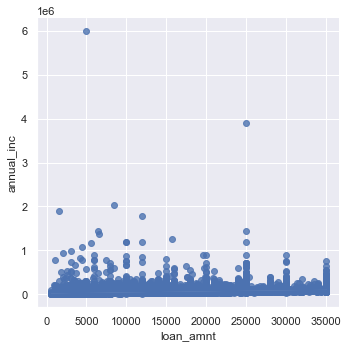

In [63]:
sns.lmplot(x="loan_amnt",y="annual_inc",data=df)
plt.show()

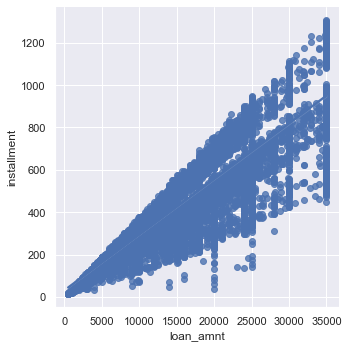

In [64]:
sns.lmplot(x="loan_amnt",y="installment",data=df)
plt.show()

### 2.1.2. Usuwanie outlierów

In [65]:
z = np.abs(stats.zscore(df.annual_inc))
len(z[z>5])

118

In [66]:
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 5).all(axis=1)]

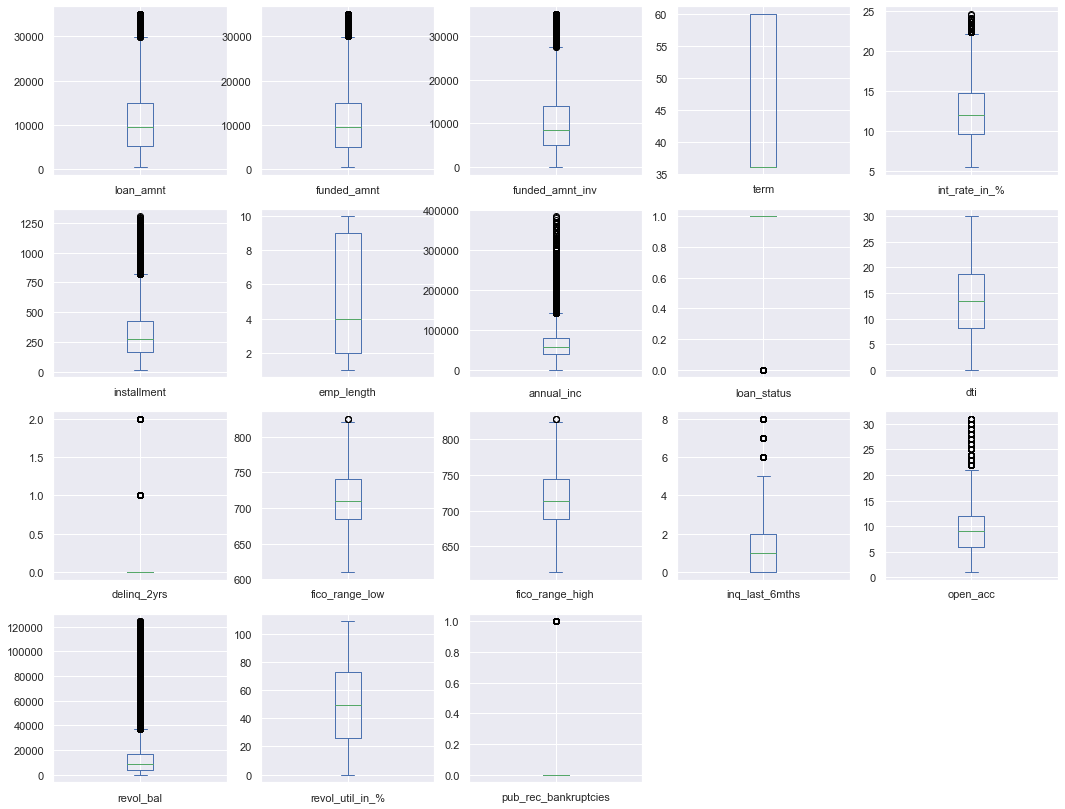

In [67]:
df.plot(kind='box', figsize=(18, 18), subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

In [68]:
new_cols = [col for col in df.columns if col != 'loan_status'] + ['loan_status']
df = df[new_cols]

In [69]:
df.sample(3)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_in_%  \
21304    24000.0      24000.0     23500.000000  36.0           8.88   
17668    33950.0      33950.0     29710.797304  36.0          14.54   
6831     16000.0      16000.0     15975.000000  60.0          13.49   

       installment grade sub_grade  emp_length home_ownership  annual_inc  \
21304       761.86     B        B1        10.0            OWN    88494.45   
17668      1169.26     D        D1         3.0           RENT    80000.00   
6831        368.08     C        C1         7.0       MORTGAGE    57500.00   

      verification_status                                               desc  \
21304            Verified    Borrower added on 01/03/11 > My wife and I a...   
17668            Verified                                                  0   
6831             Verified                                                  0   

                  purpose             title    dti  delinq_2yrs  \
21304    home_improvement  Green Dream Home   8.41          0.0   
17668  debt_consolidation      Pay Off Debt  22.29          0.0   
6831   debt_consolidation          the loan  11.10          0.0   

      earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
21304         May-1989           775.0            779.0             0.0   
17668         Jul-1994           710.0            714.0             0.0   
6831          Feb-1994           730.0            734.0             1.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies loan_status  
21304       4.0        0.0              0.0                   0.0           1  
17668       6.0    46980.0             58.0                   0.0           1  
6831        7.0     4816.0             42.6                   0.0           1

Text(0.5, 1.0, 'Correlation between features')

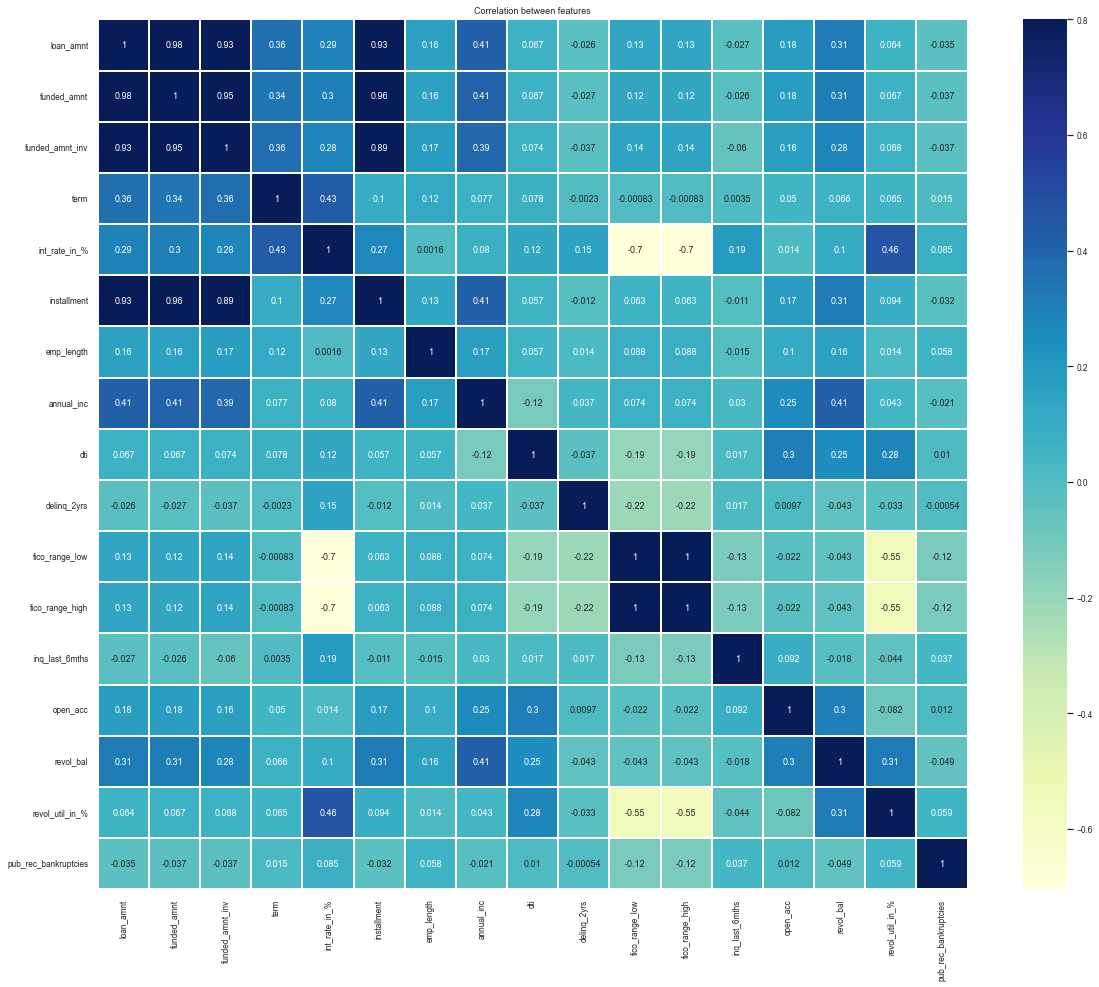

In [70]:
corr_all = df.corr()
sns.set(font_scale=0.75)
plt.figure(figsize=(20, 16))

sns.heatmap(corr_all, vmax=.8, linewidths=0.01, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation between features')

Usuwamy wartości, w których z-score jest poniżej 5 -> czyli zostawiamy wartości z z-score >5. 
Widzimy, że występują outliery w naszym datasecie. Mocno zaoutlierowane są następujące atrybuty: installment, annual_inc,  open_acc, revol_bal
Mocno skorelowanie ujemnie z atrybutem int_rate (stopa % pożyczki) oraz revol_util są dane dotyczące fico_rate (high/low), co oznacza, że przy wzroście jednej zmiennej druga będzie proporcjonalnie spadać.
Wysoce skorelowanie dodatnie z atrybutem loan_amnt (kwota pożyczki) są dane odnośnie raty kredytu (installment), więc przy wzroście jednej zmiennej druga będzie proporcjonalnie rosnąć.
Należy usunąć atrybuty, które są ze sobą wysoce skorelowane, czyli (> +- 0,9)

In [71]:
df.drop(['funded_amnt'], axis = 1, inplace = True)
df.drop(['funded_amnt_inv'], axis = 1, inplace = True)

C:\Users\jedru\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate_in_%', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'desc', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util_in_%',
       'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

C:\Users\jedru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

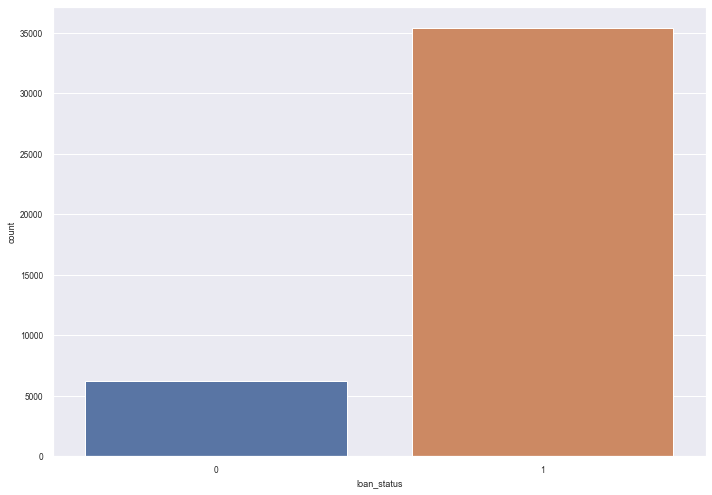

In [73]:
sns.countplot(df['loan_status'])

In [74]:
print('Średni przychód dla osób zaciągających pożyczkę wynosi:')
round(df['annual_inc'].mean())

Średni przychód dla osób zaciągających pożyczkę wynosi:


66662

In [75]:
print('Średni przychód osób, które spłaciły pożyczkę wynosi:')
round(df[(df.loan_status == 1)].annual_inc.mean())

Średni przychód osób, które spłaciły pożyczkę wynosi:


67659

In [76]:
print('Średni przychód osób, które nie spłaciły pożyczki wynosi:')
round(df[(df.loan_status == 0)].annual_inc.mean())

Średni przychód osób, które nie spłaciły pożyczki wynosi:


61012

### 2.2.1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

In [77]:
round(df['fico_range_low'].describe())

count    41627.0
mean       713.0
std         36.0
min        610.0
25%        685.0
50%        710.0
75%        740.0
max        825.0
Name: fico_range_low, dtype: float64

In [78]:
df.fico_range_low.value_counts().sort_index()

610.0       1
615.0       1
625.0       2
630.0       5
635.0       5
640.0      92
645.0      94
650.0     110
655.0     112
660.0    1506
665.0    1730
670.0    1784
675.0    1944
680.0    2171
685.0    2258
690.0    2145
695.0    2148
700.0    2230
705.0    1939
710.0    1734
715.0    1868
720.0    1929
725.0    1870
730.0    1656
735.0    1636
740.0    1469
745.0    1306
750.0    1285
755.0    1083
760.0     967
765.0     783
770.0     790
775.0     648
780.0     568
785.0     404
790.0     415
795.0     334
800.0     246
805.0     187
810.0     124
815.0      27
820.0      18
825.0       3
Name: fico_range_low, dtype: int64

In [79]:
stat, p = ttest_rel(df['fico_range_low'], df['loan_status']) 
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')


stat=4036.330, p=0.000
Probably different mean


Brak zależnolści pomiędzy wynikiem FICO a prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę. Według testu t- studenta wynik FICO nie wpływa na spłacenie pożyczki.

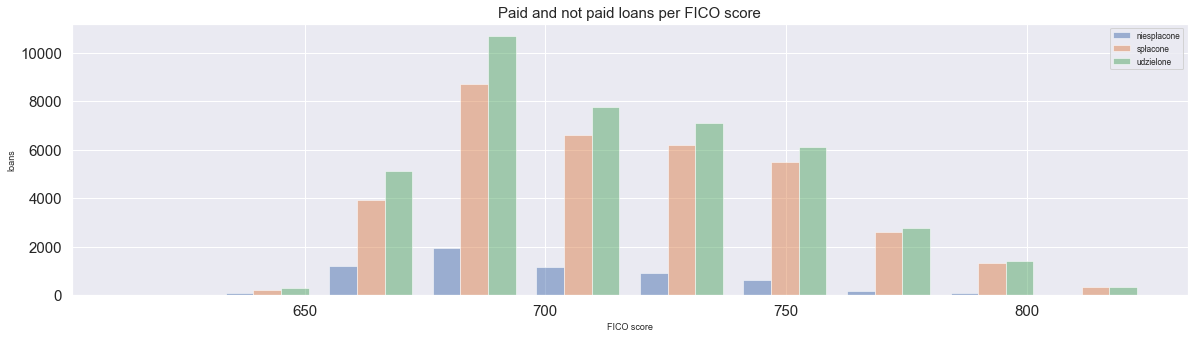

In [80]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.hist([df.fico_range_low[df.loan_status == 0], df.fico_range_low[df.loan_status == 1], df.fico_range_low], alpha = 0.5, label = ['niespłacone', 'spłacone','udzielone'])

ax.set_title('Paid and not paid loans per FICO score', fontsize=15)
ax.set_xlabel('FICO score')
ax.set_ylabel('loans')
ax.tick_params(labelsize=15)
plt.legend()

In [81]:
print('Zobowiązania przy FICO niższym, równym niż 685:', df[(df.fico_range_low <= 685)].fico_range_low.count())
print('Zobowiązania przy FICO między 690 a 710', df[(df.fico_range_low >= 690)&(df.fico_range_low <= 710)].fico_range_low.count())
print('Zobowiązania przy FICO między 715 a 740:', df[(df.fico_range_low >= 715)&(df.fico_range_low <= 740)].fico_range_low.count())
print('Zobowiązania przy FICO równym, wyższym 745:', df[(df.fico_range_low >= 745)].fico_range_low.count())

Zobowiązania przy FICO niższym, równym niż 685: 11815
Zobowiązania przy FICO między 690 a 710 10196
Zobowiązania przy FICO między 715 a 740: 10428
Zobowiązania przy FICO równym, wyższym 745: 9188


In [82]:
niesplacone_FICO_685 = df[(df.fico_range_low <= 685) & (df.loan_status == 0)].fico_range_low.count()
niesplacone_FICO_690 = df[(df.fico_range_low >= 690) & (df.fico_range_low <=710) & (df.loan_status == 0)].fico_range_low.count()
niesplacone_FICO_715 = df[(df.fico_range_low >= 715) & (df.fico_range_low <=740) & (df.loan_status == 0)].fico_range_low.count()
niesplacone_FICO_745 = df[(df.fico_range_low >= 745) & (df.loan_status == 0)].fico_range_low.count()

print('Niespłacone pożyczki przy FICO niższym, równym niż 685:',niesplacone_FICO_685, round((niesplacone_FICO_685*100)/11591,2),'%')
print('Niespłacone pożyczki przy FICO między 690 a 710:', niesplacone_FICO_690, round((niesplacone_FICO_690*100)/10021,2),'%')
print('Niespłacone pożyczki przy FICO między 715 a 740:', niesplacone_FICO_715, round((niesplacone_FICO_715*100)/10268,2),'%')
print('Niespłacone pożyczki przy FICO równym/wyższym niż 745:',  niesplacone_FICO_745, round((niesplacone_FICO_745*100)/9054,2),'%')

Niespłacone pożyczki przy FICO niższym, równym niż 685: 2494 21.52 %
Niespłacone pożyczki przy FICO między 690 a 710: 1678 16.74 %
Niespłacone pożyczki przy FICO między 715 a 740: 1327 12.92 %
Niespłacone pożyczki przy FICO równym/wyższym niż 745: 745 8.23 %


Im niższy FICO score tym jest więcej niespłaconych pożyczek, co oznacza większe ryzyko niespłacenia zobowiązania.
W analizowanej bazie liczba niespłaconych pożyczek przy najniższym analizowanym FICO score jest o ponad 13 pp wyższa niż przy najwyższym analizowanym FICO Score.

### 2.2.2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

In [83]:
round(df['term'].describe())

count    41627.0
mean        42.0
std         11.0
min         36.0
25%         36.0
50%         36.0
75%         60.0
max         60.0
Name: term, dtype: float64

In [84]:
df.term.value_counts().sort_index()

36.0    30796
60.0    10831
Name: term, dtype: int64

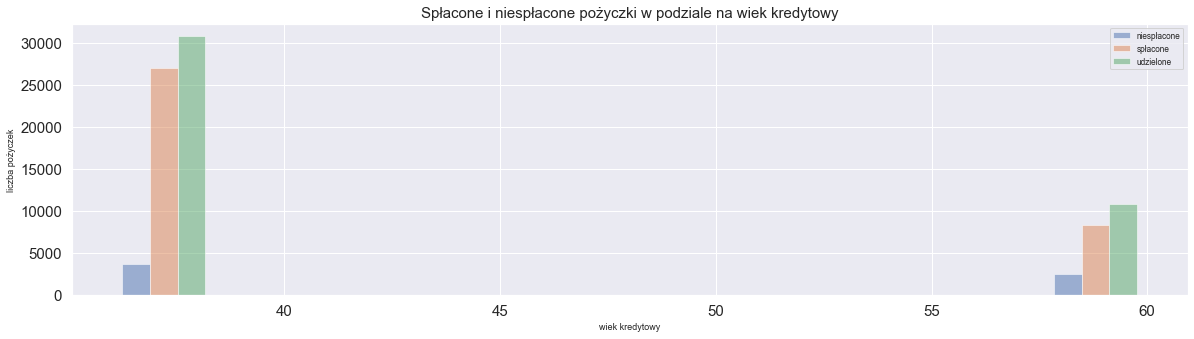

In [85]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.hist([df.term[df.loan_status == 0], df.term[df.loan_status == 1], df.term], alpha = 0.5, label = ['niespłacone', 'spłacone','udzielone'])

ax.set_title('Spłacone i niespłacone pożyczki w podziale na wiek kredytowy', fontsize=15)
ax.set_xlabel('wiek kredytowy')
ax.set_ylabel('liczba pożyczek')
ax.tick_params(labelsize=15)
plt.legend()

In [86]:
print('Wiek równy 36:', df[(df.term == 36)].term.count())
print('Wiek równy 60:', df[(df.term == 60)].term.count())


Wiek równy 36: 30796
Wiek równy 60: 10831


In [87]:
niesplacone_wiek_kredytowy_36 = df[(df.term == 36) & (df.loan_status == 0)].term.count()
niesplacone_wiek_kredytowy_60 = df[(df.term == 60) & (df.loan_status == 0)].term.count()

print('Niespłacone zobowiązania i wiek kredytowy równy 36:',niesplacone_wiek_kredytowy_36, round((niesplacone_wiek_kredytowy_36*100)/30825,2), '%')
print('Niespłacone zobowiązania i wiek kredytowy równy 60:',niesplacone_wiek_kredytowy_60, round((niesplacone_wiek_kredytowy_60*100)/10830,2), '%')

Niespłacone zobowiązania i wiek kredytowy równy 36: 3727 12.09 %
Niespłacone zobowiązania i wiek kredytowy równy 60: 2517 23.24 %


Na podstawie danych widać, że im dłuższy wiek kredytowy, tym więcej niespłaconych kredytów, co oznacza większe ryzyko niespłacenia zobowiązania.
W analizowanej bazie danych liczba niespłaconych pożyczek przy najniższym analizowanym wieku kredytowym jest o ponad 11 pp wyższa, niż przy najwyższym analizowanym wieku kredytowym.
Wynik ten jest odwrotnie skorelowany z wynikiem FICO Score.

### 2.2.3.	W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [88]:
df.loc[df['verification_status'] == 'Source Verified','verification_status'] = int(2)
df.loc[df['verification_status'] == 'Verified','verification_status'] = int(1)
df.loc[df['verification_status'] == 'Not Verified','verification_status'] = int(0)

C:\Users\jedru\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [89]:
round(df['verification_status'].describe())

count     41627
unique        3
top           0
freq      18278
Name: verification_status, dtype: int64

In [90]:
df.verification_status.value_counts().sort_index()

0    18278
1    13194
2    10155
Name: verification_status, dtype: int64

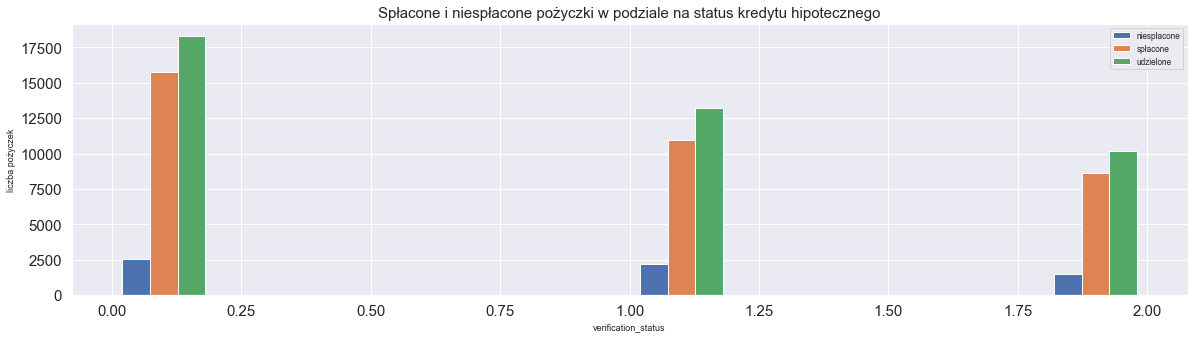

In [91]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.hist([df.verification_status[df.loan_status == 0], df.verification_status[df.loan_status == 1], df.verification_status], alpha = 1.00, label = ['niespłacone', 'spłacone','udzielone'])

ax.set_title('Spłacone i niespłacone pożyczki w podziale na status kredytu hipotecznego', fontsize=15)
ax.set_xlabel('verification_status')
ax.set_ylabel('liczba pożyczek')
ax.tick_params(labelsize=15)
plt.legend()

In [92]:
print('Status kredytu hipotecznego równy 0:', df[(df.verification_status == 0)].verification_status.count())
print('Status kredytu hipotecznego równy 1:', df[(df.verification_status == 1)].verification_status.count())
print('Status kredytu hipotecznego równy 2:', df[(df.verification_status == 2)].verification_status.count())

Status kredytu hipotecznego równy 0: 18278
Status kredytu hipotecznego równy 1: 13194
Status kredytu hipotecznego równy 2: 10155


In [93]:
niesplacone_status_kredytu_0 = df[(df.verification_status == 0) & (df.loan_status == 0)].verification_status.count()
niesplacone_status_kredytu_1 = df[(df.verification_status == 1) & (df.loan_status == 0)].verification_status.count()
niesplacone_status_kredytu_2 = df[(df.verification_status == 2) & (df.loan_status == 0)].verification_status.count()                                  
                                  

print('Niespłacone pożyczki przy statusie kredytu rówym 0:',niesplacone_status_kredytu_0, round((niesplacone_status_kredytu_0*100)/18307,2), '%')
print('Niespłacone pożyczki przy statusie kredytu rówym 1:',niesplacone_status_kredytu_1, round((niesplacone_status_kredytu_1*100)/13193,2), '%')
print('Niespłacone pożyczki przy statusie kredytu rówym 2:',niesplacone_status_kredytu_2, round((niesplacone_status_kredytu_2*100)/10155,2), '%')                                                                                  

Niespłacone pożyczki przy statusie kredytu rówym 0: 2538 13.86 %
Niespłacone pożyczki przy statusie kredytu rówym 1: 2195 16.64 %
Niespłacone pożyczki przy statusie kredytu rówym 2: 1511 14.88 %


Im status kredytu wyższy tym jest więcej niespłaconych pożyczek, co oznacza większe ryzyko niespłacenia zobowiązania.
W analizowanej bazie liczba niespłaconych pożyczek przy najniższym analizowanym statusie kredytowym jest o 1 pp wyższa niż przy najwyższym analizowanym statusie kredytowym (weryfikacji).

### 2.2.4.	W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [94]:
round(df['annual_inc'].describe())

count     41627.0
mean      66662.0
std       39656.0
min        1896.0
25%       40000.0
50%       58000.0
75%       81368.0
max      385000.0
Name: annual_inc, dtype: float64

In [95]:
df.annual_inc.value_counts().sort_index()

1896.0      1
2000.0      1
3300.0      1
3500.0      1
3600.0      1
           ..
372000.0    1
375000.0    1
381450.0    1
384000.0    1
385000.0    1
Name: annual_inc, Length: 5461, dtype: int64

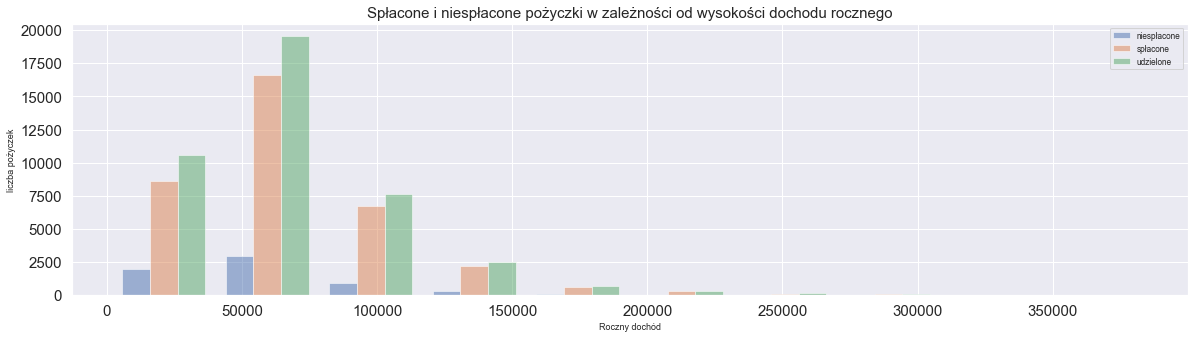

In [96]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.hist([df.annual_inc[df.loan_status == 0], df.annual_inc[df.loan_status == 1], df.annual_inc], alpha = 0.5, label = ['niespłacone', 'spłacone','udzielone'])

ax.set_title('Spłacone i niespłacone pożyczki w zależności od wysokości dochodu rocznego', fontsize=15)
ax.set_xlabel('Roczny dochód')
ax.set_ylabel('liczba pożyczek')
ax.tick_params(labelsize=15)
plt.legend()

In [97]:
print('Zaciągnię pożyczki przy dochodzie rocznym niższym, równym niż 40.000:', df[(df.annual_inc <= 40000)].annual_inc.count())
print('Zaciągnię pożyczki przy dochodzie rocznym między 40.500 a 58.000:', df[(df.annual_inc >= 40500) & (df.annual_inc <= 58000)].annual_inc.count())
print('Zaciągnię pożyczki przy dochodzie rocznym między 58.500 a 81.368:', df[(df.annual_inc >= 58500) & (df.annual_inc <= 81368)].annual_inc.count())
print('Zaciągnię pożyczki przy dochodzie rocznym równym, wyższym 81.370:', df[(df.annual_inc >= 81370)].annual_inc.count())

Zaciągnię pożyczki przy dochodzie rocznym niższym, równym niż 40.000: 10560
Zaciągnię pożyczki przy dochodzie rocznym między 40.500 a 58.000: 10254
Zaciągnię pożyczki przy dochodzie rocznym między 58.500 a 81.368: 10309
Zaciągnię pożyczki przy dochodzie rocznym równym, wyższym 81.370: 10407


In [98]:
niesplacone_dochód_40= df[(df.annual_inc <= 40000) & (df.loan_status == 0)].annual_inc.count()
niesplacone_dochód_58 = df[(df.annual_inc >= 41500) & (df.annual_inc <= 58000) & (df.loan_status == 0)].annual_inc.count()
niesplacone_dochód_81 = df[(df.annual_inc >= 58500) & (df.annual_inc <= 81368) & (df.loan_status == 0)].annual_inc.count()
niesplacone_dochód_81plus = df[(df.annual_inc >= 81370) & (df.loan_status == 0)].annual_inc.count()

print('Niespłacone pożyczki przy dochodzie rocznym niższym, równym niż 40.000:', niesplacone_dochód_40, round((niesplacone_dochód_40*100)/10572,2), '%')
print('Niespłacone pożyczki pozyczek przy dochodzie rocznym między 40.500 a 58.000:', niesplacone_dochód_58, round((niesplacone_dochód_58*100)/10255,2), '%')
print('Niespłacone pożyczki pożyczek przy dochodzie rocznym między 58.500 a 81.368:', niesplacone_dochód_81, round((niesplacone_dochód_81*100)/10317,2), '%')
print('Niespłacone pożyczki pożyczek przy dochodzie rocznym równym/wyższym niż 81.370:', niesplacone_dochód_81plus,round((niesplacone_dochód_81plus*100)/10414,2),'%')

Niespłacone pożyczki przy dochodzie rocznym niższym, równym niż 40.000: 1952 18.46 %
Niespłacone pożyczki pozyczek przy dochodzie rocznym między 40.500 a 58.000: 1533 14.95 %
Niespłacone pożyczki pożyczek przy dochodzie rocznym między 58.500 a 81.368: 1488 14.42 %
Niespłacone pożyczki pożyczek przy dochodzie rocznym równym/wyższym niż 81.370: 1207 11.59 %


Im wyższy dochód roczny tym mniej jest niespłaconych pożyczek, co oznacza mniejsze ryzyko niespłacenia zobowiązania.
W analizowanej bazie liczba niespłaconych pożyczek przy najniższym analizowanym dochodzie roczny jest o prawie 7 pp wyższa niż przy najwyższym analizowanym dochodzie rocznym.

### 2.2.5.	W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [99]:
round(df['emp_length'].describe())

count    41627.0
mean         5.0
std          3.0
min          1.0
25%          2.0
50%          4.0
75%          9.0
max         10.0
Name: emp_length, dtype: float64

In [100]:
df.emp_length.value_counts().sort_index()

1.0     8463
2.0     4632
3.0     4292
4.0     4686
5.0     3400
6.0     2330
7.0     1838
8.0     1545
9.0     1310
10.0    9131
Name: emp_length, dtype: int64

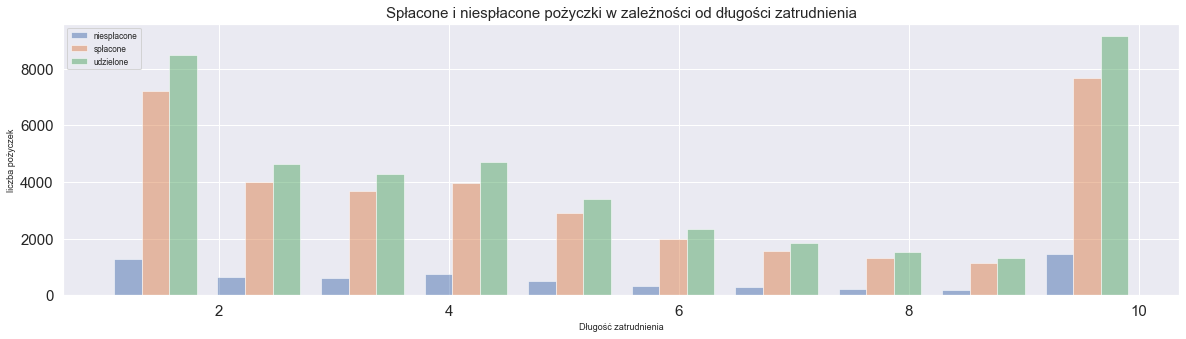

In [101]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.hist([df.emp_length[df.loan_status == 0], df.emp_length[df.loan_status == 1], df.emp_length], alpha = 0.5, label = ['niespłacone', 'spłacone','udzielone'])

ax.set_title('Spłacone i niespłacone pożyczki w zależności od długości zatrudnienia', fontsize=15)
ax.set_xlabel('Długość zatrudnienia')
ax.set_ylabel('liczba pożyczek')
ax.tick_params(labelsize=15)
plt.legend()

In [102]:
# Sprawdzeie jak dużo jest pożyczek zaciągniętych przy danej długości zatrudnienia:

print('Zaciągnięte pożyczki przy długości zatrudnienia niższej, równej niż 2 lata:', df[(df.emp_length <= 2)].emp_length.count())
print('Zaciągnięte pożyczki przy długości zatrudnienia między 3 lata a 4 lata:', df[(df.emp_length >= 3) & (df.emp_length <= 4)].emp_length.count())
print('Zaciągnięte pożyczki przy długości zatrudnienia między 5 lata a 9 lat:', df[(df.emp_length >= 5) & (df.emp_length <= 9)].emp_length.count())
print('Zaciągnięte pożyczki przy długości zatrudnienia równej, wyższej 10 lat:', df[(df.emp_length >= 10)].emp_length.count())

Zaciągnięte pożyczki przy długości zatrudnienia niższej, równej niż 2 lata: 13095
Zaciągnięte pożyczki przy długości zatrudnienia między 3 lata a 4 lata: 8978
Zaciągnięte pożyczki przy długości zatrudnienia między 5 lata a 9 lat: 10423
Zaciągnięte pożyczki przy długości zatrudnienia równej, wyższej 10 lat: 9131


In [103]:
niesplacone_zatrudnienie_2 = df[(df.emp_length <= 2) & (df.loan_status == 0)].emp_length.count()
niesplacone_zatrudnienie_4 = df[(df.emp_length >= 4) & (df.emp_length <= 4) & (df.loan_status == 0)].emp_length.count()
niesplacone_zatrudnienie_9 = df[(df.emp_length >= 5) & (df.emp_length <= 9) & (df.loan_status == 0)].emp_length.count()
niesplacone_zatrudnienie_10plus = df[(df.emp_length >= 10) & (df.loan_status == 0)].emp_length.count()

print('Niespłacone pożyczki przy długości zatrudnienia niższej, równej niż 2 lata:', niesplacone_zatrudnienie_2,round((niesplacone_zatrudnienie_2*100)/13117,2), '%')
print('Niespłacone pożyczki przy długości zatrudnienia między 3 a 4 lata:', niesplacone_zatrudnienie_4, round((niesplacone_zatrudnienie_4*100)/8980,2), '%')
print('Niespłacone pożyczki przy długości zatrudnienia między 5 a 9 lat:', niesplacone_zatrudnienie_9, round((niesplacone_zatrudnienie_9*100)/10424,2), '%')
print('Niespłacone pożyczki przy długości zatrudnienia równej/wyższej niż 10 lat:', niesplacone_zatrudnienie_10plus, round((niesplacone_zatrudnienie_10plus*100)/9134,2),'%')

Niespłacone pożyczki przy długości zatrudnienia niższej, równej niż 2 lata: 1899 14.48 %
Niespłacone pożyczki przy długości zatrudnienia między 3 a 4 lata: 741 8.25 %
Niespłacone pożyczki przy długości zatrudnienia między 5 a 9 lat: 1524 14.62 %
Niespłacone pożyczki przy długości zatrudnienia równej/wyższej niż 10 lat: 1460 15.98 %


Wyłączając długość zatrudnienia z przedziału pomiędzy 3 a 4 lata, w związku z tym, że stanowią jedynie 13,2% wszystkich niespłaconych pożyczek, mozemy zauważyć, że im dłuższa historia zatrudnienia tym jest wiecej niespłaconych pożyczek, co oznacza większe ryzyko niespłacenia zobowiązania.
W analizowanej bazie liczba niespłaconych pożyczek przy najniższej analizowanej długości zatrudnienia jest o 1,5pp niższa niż przy najwyższej analizowanej długości zatrudnienia.
W przedziale długości zatrudnienia pomiędzy 3 a 4 lata widzimy, że mamy 8,25% niespłaconych pożyczek.

### 2.2.6.	Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [104]:
round(df['loan_amnt'].describe())

count    41627.0
mean     11074.0
std       7391.0
min        500.0
25%       5200.0
50%       9600.0
75%      15000.0
max      35000.0
Name: loan_amnt, dtype: float64

In [105]:
df.loan_amnt.value_counts().sort_index()

500.0        9
550.0        1
600.0        6
700.0        3
725.0        1
          ... 
34475.0      5
34525.0      1
34675.0      1
34800.0      2
35000.0    665
Name: loan_amnt, Length: 896, dtype: int64

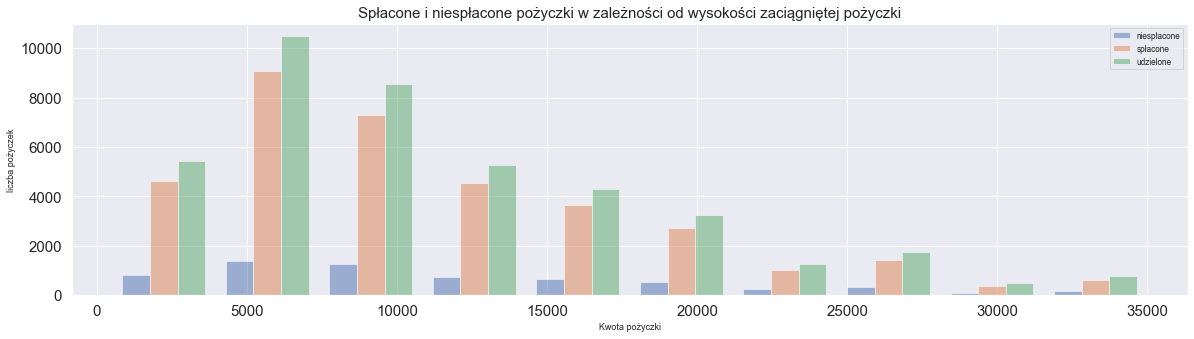

In [106]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.hist([df.loan_amnt[df.loan_status == 0], df.loan_amnt[df.loan_status == 1], df.loan_amnt], alpha = 0.5, label = ['niespłacone', 'spłacone','udzielone'])

ax.set_title('Spłacone i niespłacone pożyczki w zależności od wysokości zaciągniętej pożyczki', fontsize=15)
ax.set_xlabel('Kwota pożyczki')
ax.set_ylabel('liczba pożyczek')
ax.tick_params(labelsize=15)
plt.legend()

In [107]:
print('Pożyczki w wysokości niższej, równej niż 5.200:', df[(df.loan_amnt <= 5200)].loan_amnt.count())
print('Pożyczki w wysokości między 5.250 a 9.600:', df[(df.loan_amnt >= 5250) & (df.loan_amnt <= 9600)].loan_amnt.count())
print('Pożyczki w wysokości między 9.650 a 15.000:', df[(df.loan_amnt >= 9650) & (df.loan_amnt <= 15000)].loan_amnt.count())
print('Pożyczki w wysokości równej, wyższej 15.500:', df[(df.loan_amnt >= 15500)].loan_amnt.count())

Pożyczki w wysokości niższej, równej niż 5.200: 10458
Pożyczki w wysokości między 5.250 a 9.600: 10355
Pożyczki w wysokości między 9.650 a 15.000: 11401
Pożyczki w wysokości równej, wyższej 15.500: 9275


In [108]:
niesplacone_pożyczka_5200= df[(df.loan_amnt <= 5200) & (df.loan_status == 0)].loan_amnt.count()
niesplacone_pożyczka_9600 = df[(df.loan_amnt >= 5250) & (df.annual_inc <= 9600) & (df.loan_status == 0)].loan_amnt.count()
niesplacone_pożyczka_15000 = df[(df.loan_amnt >= 9650) & (df.annual_inc <= 15000) & (df.loan_status == 0)].loan_amnt.count()
niesplacone_pożyczka_15500plus = df[(df.loan_amnt >= 15500) & (df.loan_status == 0)].loan_amnt.count()

print('Niespłacone zobowiązania przy kwocie pożyczki niższej, równej niż 5200:', niesplacone_pożyczka_5200, round((niesplacone_pożyczka_5200*100)/10480,2), '%')
print('Niespłacone zobowiązania przy kwocie pożyczki między 5250 a 9600:', niesplacone_pożyczka_9600, round((niesplacone_pożyczka_9600*100)/10361,2), '%')
print('Niespłacone zobowiązania przy kwocie pożyczki między 9950 a 15000:', niesplacone_pożyczka_15000, round((niesplacone_pożyczka_15000*100)/11402,2), '%')
print('Niespłacone zobowiązania przy kwocie pożyczki równej/wyższej niż 15500:', niesplacone_pożyczka_15500plus, round((niesplacone_pożyczka_15500plus*100)/9274,2),'%')

Niespłacone zobowiązania przy kwocie pożyczki niższej, równej niż 5200: 1539 14.69 %
Niespłacone zobowiązania przy kwocie pożyczki między 5250 a 9600: 2 0.02 %
Niespłacone zobowiązania przy kwocie pożyczki między 9950 a 15000: 1 0.01 %
Niespłacone zobowiązania przy kwocie pożyczki równej/wyższej niż 15500: 1670 18.01 %


Po wyłączeniu kwoty pożyczki z przedziału 52520 a 15000, ponieważ stanowią one tylko neicałe 0,01% wszytskich niespłaconych pożyczek to mozemy zauważyć iż, im wyższa kwota pożyczki tym jest wiecej niespłaconych pożyczek, co oznacza większe ryzyko niespłacenia zobowiązania.
W analizowanej bazie liczba niespłaconych pożyczek przy najniższej analizowanej wysokości pożyczki jest o ponad 3 pp niższa niż przy najwyższej analizowanej wysokości pożyczki.

# Część trzecia - Feature Engineering

In [109]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, skew
import sklearn as sk
from datetime import date
from matplotlib import rcParams
from sklearn.preprocessing import power_transform # odpowiednik transformacji logarytmicznej --> ma uczynic rozład naszych danych bardziej gaussowskie
from collections import Counter
# from imblearn.over_sampling import SMOTE --> błąd przy tym imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
df.head()

loan_amnt  term  int_rate_in_%  installment grade sub_grade  emp_length  \
0     5000.0  36.0          10.65       162.87     B        B2        10.0   
1     2500.0  60.0          15.27        59.83     C        C4         1.0   
2     2400.0  36.0          15.96        84.33     C        C5        10.0   
3    10000.0  36.0          13.49       339.31     C        C1        10.0   
4     3000.0  60.0          12.69        67.79     B        B5         1.0   

  home_ownership  annual_inc verification_status  \
0           RENT     24000.0                   1   
1           RENT     30000.0                   2   
2           RENT     12252.0                   0   
3           RENT     49200.0                   2   
4           RENT     80000.0                   2   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                  0  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0              Computer  27.65          0.0         Jan-1985           735.0   
1                  bike   1.00          0.0         Apr-1999           740.0   
2  real estate business   8.72          0.0         Nov-2001           735.0   
3              personel  20.00          0.0         Feb-1996           690.0   
4              Personal  17.94          0.0         Jan-1996           695.0   

   fico_range_high  inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
0            739.0             1.0       3.0    13648.0             83.7   
1            744.0             5.0       3.0     1687.0              9.4   
2            739.0             2.0       2.0     2956.0             98.5   
3            694.0             1.0      10.0     5598.0             21.0   
4            699.0             0.0      15.0    27783.0             53.9   

   pub_rec_bankruptcies loan_status  
0                   0.0           1  
1                   0.0           0  
2                   0.0           1  
3                   0.0           1  
4                   0.0           1

In [111]:
df.drop(['title'], axis = 1, inplace = True)
df.drop(['desc'], axis = 1, inplace = True)
df.drop(['purpose'], axis = 1, inplace = True)
# df.drop(['sub_grade'], axis = 1, inplace = True)

In [112]:
df.earliest_cr_line.value_counts()

Oct-1999    390
Nov-1998    387
Oct-2000    368
Dec-1998    363
Nov-2000    340
           ... 
Feb-1966      1
Dec-1961      1
Nov-1965      1
Sep-1956      1
May-1969      1
Name: earliest_cr_line, Length: 529, dtype: int64

In [113]:
df.drop(['earliest_cr_line'], axis = 1, inplace = True)

In [114]:
installment = round(df['loan_amnt']/df['term'])
monthly_income = df['annual_inc']/12
df['installment_to_inc'] = 100*(installment/monthly_income)
df['installment_to_inc'].head()

0    6.950000
1    1.680000
2    6.562194
3    6.780488
4    0.750000
Name: installment_to_inc, dtype: float64

In [115]:
df.sample(3)

loan_amnt  term  int_rate_in_%  installment grade sub_grade  \
11999     8325.0  36.0           6.99       257.02     A        A3   
25531    20000.0  60.0          13.61       461.34     C        C2   
35609    15600.0  36.0          12.53       522.08     B        B5   

       emp_length home_ownership  annual_inc verification_status    dti  \
11999         2.0       MORTGAGE    106369.0                   2  15.07   
25531         1.0           RENT     90000.0                   1   7.04   
35609         2.0       MORTGAGE     84996.0                   1   9.05   

       delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
11999          0.0           765.0            769.0             2.0       9.0   
25531          0.0           715.0            719.0             0.0       9.0   
35609          0.0           715.0            719.0             0.0       9.0   

       revol_bal  revol_util_in_%  pub_rec_bankruptcies loan_status  \
11999    27301.0             39.6                   0.0           1   
25531    23899.0             44.2                   0.0           0   
35609     5760.0             22.5                   0.0           0   

       installment_to_inc  
11999            2.606022  
25531            4.440000  
35609            6.113229

In [116]:
new_cols = [col for col in df.columns if col != 'loan_status'] 
X = df[new_cols]
y = df['loan_status']

In [117]:
X = pd.get_dummies(X)

In [118]:
X.head()

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc    dti  \
0     5000.0  36.0          10.65       162.87        10.0     24000.0  27.65   
1     2500.0  60.0          15.27        59.83         1.0     30000.0   1.00   
2     2400.0  36.0          15.96        84.33        10.0     12252.0   8.72   
3    10000.0  36.0          13.49       339.31        10.0     49200.0  20.00   
4     3000.0  60.0          12.69        67.79         1.0     80000.0  17.94   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
0          0.0           735.0            739.0             1.0       3.0   
1          0.0           740.0            744.0             5.0       3.0   
2          0.0           735.0            739.0             2.0       2.0   
3          0.0           690.0            694.0             1.0      10.0   
4          0.0           695.0            699.0             0.0      15.0   

   revol_bal  revol_util_in_%  pub_rec_bankruptcies  installment_to_inc  \
0    13648.0             83.7                   0.0            6.950000   
1     1687.0              9.4                   0.0            1.680000   
2     2956.0             98.5                   0.0            6.562194   
3     5598.0             21.0                   0.0            6.780488   
4    27783.0             53.9                   0.0            0.750000   

   grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             1   
3             1             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             

In [119]:
X.shape

(41627, 66)

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41627 entries, 0 to 42514
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                41627 non-null  float64
 1   term                     41627 non-null  float64
 2   int_rate_in_%            41627 non-null  float64
 3   installment              41627 non-null  float64
 4   emp_length               41627 non-null  float64
 5   annual_inc               41627 non-null  float64
 6   dti                      41627 non-null  float64
 7   delinq_2yrs              41627 non-null  float64
 8   fico_range_low           41627 non-null  float64
 9   fico_range_high          41627 non-null  float64
 10  inq_last_6mths           41627 non-null  float64
 11  open_acc                 41627 non-null  float64
 12  revol_bal                41627 non-null  float64
 13  revol_util_in_%          41627 non-null  float64
 14  pub_rec_bankruptcies  

# Część czwarta - Modelowanie

In [121]:
# data processing, CSV file I/O (e.g. pd.read_csv):
import pandas as pd
# linear algebra:
import numpy as np 
# Import stats from scipy:
from scipy import stats
#importing ploting libraries:
import matplotlib.pyplot as plt 
#styling figures
# plt.rc('font',size=14)
# sns.set(style='white')
# sns.set(style='whitegrid',color_codes=True)
# #To enable plotting graphs in Jupyter notebook
# %matplotlib inline
#importing seaborn for statistical plots:
import seaborn as sns

from scipy.stats import ttest_rel, skew, pearsonr

import sklearn as sk
#Import the metrics:
from sklearn import metrics

from datetime import datetime, date

from matplotlib import rcParams
# odpowiednik transformacji logarytmicznej --> ma uczynic rozład naszych danych batdziej gaussowskie:
from sklearn.preprocessing import MinMaxScaler,power_transform

from collections import Counter

import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering

# from imblearn.over_sampling import SMOTE

import scipy.stats as stats

from sklearn.cluster import KMeans, DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

from sklearn.decomposition import PCA, IncrementalPCA

from sklearn.preprocessing import StandardScaler, label_binarize

import xgboost as xgb

from xgboost import plot_importance

from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, classification_report, accuracy_score, silhouette_score
#Import DecissionTree model:
from sklearn.tree import DecisionTreeClassifier
#Import RandowmForest model:
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LassoCV, Lasso

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, train_test_split
# Import support vector regressor machine learning library
from sklearn.svm import SVC #albo SVR

from sklearn import svm

# Import KNN Classifier machine learning library:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit

import pickle

import warnings

### 4.1. Wyznaczenie danych testowych i danych treningowych:

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [123]:
X_train

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
17744    24000.0  60.0          14.17       560.56         3.0    133000.0   
24675    10000.0  36.0          15.58       349.51         6.0     33900.0   
15179     6400.0  36.0           5.99       194.68        10.0     36000.0   
3803     14000.0  36.0           6.03       426.10         3.0    115000.0   
15117    10000.0  36.0          16.49       354.00         3.0     95000.0   
...          ...   ...            ...          ...         ...         ...   
34415     8000.0  36.0          15.31       278.53         1.0     41000.0   
13040    23750.0  36.0          12.99       800.12        10.0    110000.0   
8784      5000.0  36.0          15.99       175.77         3.0     70000.0   
34609    24250.0  36.0          16.70       860.91        10.0    126000.0   
8412     12000.0  36.0           5.99       365.01         3.0     77000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
17744  15.31          0.0           730.0            734.0             1.0   
24675  12.21          0.0           665.0            669.0             0.0   
15179  24.47          0.0           750.0            754.0             0.0   
3803    0.87          0.0           785.0            789.0             2.0   
15117  22.00          1.0           700.0            704.0             0.0   
...      ...          ...             ...              ...             ...   
34415   8.20          1.0           660.0            664.0             0.0   
13040  15.57          1.0           715.0            719.0             3.0   
8784    7.95          0.0           685.0            689.0             0.0   
34609  17.14          0.0           680.0            684.0             1.0   
8412    8.79          0.0           775.0            779.0             1.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
17744      10.0    37772.0             41.1                   0.0   
24675      10.0     9554.0             65.0                   0.0   
15179      12.0     7478.0             19.0                   0.0   
3803        7.0     5571.0             16.7                   0.0   
15117      13.0    24340.0             98.9                   0.0   
...         ...        ...              ...                   ...   
34415       6.0     7979.0             48.7                   0.0   
13040      16.0    30375.0             23.8                   0.0   
8784        7.0     5781.0             99.7                   0.0   
34609      10.0    46226.0             97.9                   0.0   
8412        9.0      710.0              3.0                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
17744            3.609023        0        0        1        0        0   
24675            9.840708        0        0        0        1        0   
15179            5.933333        1        0        0        0        0   
3803             4.059130        1        0        0        0        0   
15117            3.511579        0        0        0        1        0   
...                   ...      ...      ...      ...      ...      ...   
34415            6.497561        0        0        0        1        0   
13040            7.200000        0        0        1        0        0   
8784             2.382857        0        0        0        1        0   
34609            6.419048        0        0        0        0        1   
8412             5.189610        1        0        0        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
17744        0        0             0             0             0   
24675        0        0             0             0             0   
15179        0        0             0             1             0   
3803         0        0             1             0             0   
15117        0        0             0             0             0   
.

In [124]:
X_test

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
13859    10400.0  60.0          10.99       226.07         7.0     42000.0   
38430    12000.0  36.0           9.38       383.73        10.0    135000.0   
7517      2500.0  36.0           6.62        76.76        10.0     74000.0   
621      18000.0  60.0          16.77       445.13         2.0     50000.0   
34105    13000.0  36.0          14.61       448.18         1.0     39600.0   
...          ...   ...            ...          ...         ...         ...   
33719    17500.0  36.0          12.53       585.67         6.0     44000.0   
3312      5000.0  36.0           7.51       155.56         4.0     24000.0   
31720     6000.0  36.0          14.96       207.88         1.0     42000.0   
21850    14400.0  36.0           5.79       436.71         1.0    145000.0   
32488     5400.0  36.0           7.88       168.92        10.0     54000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
13859  13.51          0.0           775.0            779.0             0.0   
38430   9.91          0.0           765.0            769.0             0.0   
7517   10.96          0.0           730.0            734.0             0.0   
621    21.22          0.0           700.0            704.0             1.0   
34105  21.39          0.0           675.0            679.0             0.0   
...      ...          ...             ...              ...             ...   
33719  21.63          0.0           715.0            719.0             0.0   
3312   25.75          0.0           730.0            734.0             2.0   
31720  14.06          1.0           660.0            664.0             1.0   
21850   7.69          0.0           780.0            784.0             0.0   
32488  21.27          0.0           725.0            729.0             0.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
13859       7.0     1741.0             18.7                   0.0   
38430       9.0     1579.0              7.2                   0.0   
7517       14.0    24495.0             65.3                   0.0   
621         9.0    19489.0             77.6                   0.0   
34105       6.0    14021.0             71.9                   0.0   
...         ...        ...              ...                   ...   
33719       7.0    20010.0             85.1                   0.0   
3312       13.0     3987.0             25.7                   0.0   
31720      11.0    27010.0             64.5                   0.0   
21850       9.0     4500.0              9.4                   0.0   
32488       8.0    19843.0             59.9                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
13859            4.942857        0        1        0        0        0   
38430            2.960000        1        0        0        0        0   
7517             1.118919        1        0        0        0        0   
621              7.200000        0        0        0        1        0   
34105           10.939394        0        0        0        1        0   
...                   ...      ...      ...      ...      ...      ...   
33719           13.254545        0        1        0        0        0   
3312             6.950000        1        0        0        0        0   
31720            4.771429        0        0        0        1        0   
21850            3.310345        1        0        0        0        0   
32488            3.333333        1        0        0        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
13859        0        0             0             0             0   
38430        0        0             0             0             0   
7517         0        0             0             1             0   
621          0        0             0             0             0   
34105        0        0             0             0             0   
.

In [125]:
y_train

17744    1
24675    1
15179    1
3803     1
15117    1
        ..
34415    1
13040    1
8784     1
34609    1
8412     1
Name: loan_status, Length: 29138, dtype: object

In [126]:
y_test

13859    1
38430    1
7517     1
621      1
34105    1
        ..
33719    1
3312     1
31720    1
21850    1
32488    1
Name: loan_status, Length: 12489, dtype: object

### 4.2. Skaling

In [127]:
X_scaled = X.apply(stats.zscore)

In [128]:
X_scaled

loan_amnt      term  int_rate_in_%  installment  emp_length  \
0      -0.821837 -0.593044      -0.398569    -0.764497    1.481536   
1      -1.160101  1.686215       0.850379    -1.260584   -1.191882   
2      -1.173632 -0.593044       1.036910    -1.142628    1.481536   
3      -0.145308 -0.593044       0.369182     0.084973    1.481536   
4      -1.092448  1.686215       0.152914    -1.222260   -1.191882   
...          ...       ...            ...          ...         ...   
42507  -1.227754 -0.593044       0.182651    -1.225101   -1.191882   
42509  -0.774480 -0.593044       0.269158    -0.679281   -1.191882   
42511  -0.145308 -0.593044       0.696288     0.113235   -1.191882   
42513  -0.686531 -0.593044      -0.414789    -0.608459   -1.191882   
42514  -0.903020 -0.593044      -0.671608    -0.868587   -0.894836   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
0       -1.075805  2.123779    -0.321395        0.597916         0.597916   
1       -0.924504 -1.846100    -0.321395        0.736544         0.736544   
2       -1.372053 -0.696101    -0.321395        0.597916         0.597916   
3       -0.440340  0.984207    -0.321395       -0.649738        -0.649738   
4        0.336340  0.677343    -0.321395       -0.511110        -0.511110   
...           ...       ...          ...             ...              ...   
42507   -1.428841 -1.476670     2.315325       -1.897391        -1.897391   
42509   -1.580142  0.239390    -0.321395       -1.481507        -1.481507   
42511   -0.420166 -0.919547     4.952046       -1.758763        -1.758763   
42513   -1.176672 -0.073434    -0.321395       -0.511110        -0.511110   
42514   -0.924504 -1.440919    -0.321395       -0.511110        -0.511110   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
0           -0.029178 -1.427537   0.018400         1.218438   
1            2.927848 -1.427537  -0.749091        -1.405192   
2            0.710078 -1.654513  -0.667664         1.741045   
3           -0.029178  0.161294  -0.498137        -0.995581   
4           -0.768435  1.296173   0.925390         0.166161   
...               ...       ...        ...              ...   
42507       -0.768435 -1.654513  -0.820701         0.448652   
42509       -0.029178 -1.881489  -0.857340         0.017854   
42511       -0.768435  1.069197  -0.214074         1.264343   
42513        2.188591 -0.973586   0.019170         0.593428   
42514       -0.768435 -1.200562  -0.633207         0.505150   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
0                  -0.21327            0.468507 -0.565967  1.551998 -0.508417   
1                  -0.21327           -1.129144 -0.565967 -0.644331  1.966890   
2                  -0.21327            0.350940 -0.565967 -0.644331  1.966890   
3                  -0.21327            0.417118 -0.565967 -0.644331  1.966890   
4                  -0.21327           -1.411083 -0.565967  1.551998 -0.508417   
...                     ...                 ...       ...       ...       ...   
42507              -0.21327            0.398780 -0.565967 -0.644331 -0.508417   
42509              -0.21327           11.912785 -0.565967 -0.644331 -0.508417   
42511              -0.21327            0.384229 -0.565967 -0.644331 -0.508417   
42513              -0.21327            1.399207 -0.565967 -0.644331  1.966890   
42514              -0.21327           -0.159033 -0.565967  1.551998 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
0     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
1     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
2     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
3     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
4     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

In [129]:
X.columns

Index(['loan_amnt', 'term', 'int_rate_in_%', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util_in_%',
       'pub_rec_bankruptcies', 'installment_to_inc', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'home_ownership_M

In [130]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [131]:
X_scaled_df.head()

loan_amnt      term  int_rate_in_%  installment  emp_length  annual_inc  \
0  -0.821837 -0.593044      -0.398569    -0.764497    1.481536   -1.075805   
1  -1.160101  1.686215       0.850379    -1.260584   -1.191882   -0.924504   
2  -1.173632 -0.593044       1.036910    -1.142628    1.481536   -1.372053   
3  -0.145308 -0.593044       0.369182     0.084973    1.481536   -0.440340   
4  -1.092448  1.686215       0.152914    -1.222260   -1.191882    0.336340   

        dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0  2.123779    -0.321395        0.597916         0.597916       -0.029178   
1 -1.846100    -0.321395        0.736544         0.736544        2.927848   
2 -0.696101    -0.321395        0.597916         0.597916        0.710078   
3  0.984207    -0.321395       -0.649738        -0.649738       -0.029178   
4  0.677343    -0.321395       -0.511110        -0.511110       -0.768435   

   open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
0 -1.427537   0.018400         1.218438              -0.21327   
1 -1.427537  -0.749091        -1.405192              -0.21327   
2 -1.654513  -0.667664         1.741045              -0.21327   
3  0.161294  -0.498137        -0.995581              -0.21327   
4  1.296173   0.925390         0.166161              -0.21327   

   installment_to_inc   grade_A   grade_B   grade_C   grade_D   grade_E  \
0            0.468507 -0.565967  1.551998 -0.508417 -0.404367 -0.290766   
1           -1.129144 -0.565967 -0.644331  1.966890 -0.404367 -0.290766   
2            0.350940 -0.565967 -0.644331  1.966890 -0.404367 -0.290766   
3            0.417118 -0.565967 -0.644331  1.966890 -0.404367 -0.290766   
4           -1.411083 -0.565967  1.551998 -0.508417 -0.404367 -0.290766   

    grade_F   grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  \
0 -0.173834 -0.104539     -0.167498     -0.193943     -0.213209     -0.272581   
1 -0.173834 -0.104539     -0.167498     -0.193943     -0.213209     -0.272581   
2 -0.173834 -0.104539     -0.167498     -0.193943     -0.213209     -0.272581   
3 -0.173834 -0.104539     -0.167498     -0.193943     -0.213209     -0.272581   
4 -0.173834 -0.104539     -0.167498     -0.193943     -0.213209     -0.272581   

   sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0     -0.266738     -0.216452      4.357081     -0.275974     -0.255505   
1     -0.266738     -0.216452     -0.229511     -0.275974     -0.255505   
2     -0.266738     -0.216452     -0.229511     -0.275974     -0.255505   
3     -0.266738     -0.216452     -0.229511     -0.275974     -0.255505   
4     -0.266738     -0.216452     -0.229511     -0.275974     -0.255505   

   sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  \
0     -0.266945     -0.237350     -0.231246     -0.201099     -0.182236   
1     -0.266945     -0.237350     -0.231246     -0.201099      5.487382   
2     -0.266945     -0.237350     -0.231246     -0.201099     -0.182236   
3     -0.266945      4.213182     -0.231246     -0.201099     -0.182236   
4      3.746095     -0.237350     -0.231246     -0.201099     -0.182236   

   sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  \
0     -0.176746      -0.15825     -0.189839     -0.178688     -0.165364   
1     -0.176746      -0.15825     -0.189839     -0.178688     -0.165364   
2      5.657835      -0.15825     -0.189839     -0.178688     -0.165364   
3     -0.176746      -0.15825     -0.189839     -0.178688     -0.165364   
4     -0.176746      -0.15825     -0.189839     -0.178688     -0.165364   

   sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  \
0     -0.156003     -0.145329     -0.136462      -0.12476     -0.111592   
1     -0.156003     -0.145329     -0.136462      -0.12476     -0.111592   
2     -0.156003     -0.145329     -0.136462      -0.12476     -0.111592   
3     -0.156003     -0.145329     -0.136462      -0.12476     -0.111592   
4     -0.15600

In [132]:
X_scaled_df

loan_amnt      term  int_rate_in_%  installment  emp_length  \
0      -0.821837 -0.593044      -0.398569    -0.764497    1.481536   
1      -1.160101  1.686215       0.850379    -1.260584   -1.191882   
2      -1.173632 -0.593044       1.036910    -1.142628    1.481536   
3      -0.145308 -0.593044       0.369182     0.084973    1.481536   
4      -1.092448  1.686215       0.152914    -1.222260   -1.191882   
...          ...       ...            ...          ...         ...   
42507  -1.227754 -0.593044       0.182651    -1.225101   -1.191882   
42509  -0.774480 -0.593044       0.269158    -0.679281   -1.191882   
42511  -0.145308 -0.593044       0.696288     0.113235   -1.191882   
42513  -0.686531 -0.593044      -0.414789    -0.608459   -1.191882   
42514  -0.903020 -0.593044      -0.671608    -0.868587   -0.894836   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
0       -1.075805  2.123779    -0.321395        0.597916         0.597916   
1       -0.924504 -1.846100    -0.321395        0.736544         0.736544   
2       -1.372053 -0.696101    -0.321395        0.597916         0.597916   
3       -0.440340  0.984207    -0.321395       -0.649738        -0.649738   
4        0.336340  0.677343    -0.321395       -0.511110        -0.511110   
...           ...       ...          ...             ...              ...   
42507   -1.428841 -1.476670     2.315325       -1.897391        -1.897391   
42509   -1.580142  0.239390    -0.321395       -1.481507        -1.481507   
42511   -0.420166 -0.919547     4.952046       -1.758763        -1.758763   
42513   -1.176672 -0.073434    -0.321395       -0.511110        -0.511110   
42514   -0.924504 -1.440919    -0.321395       -0.511110        -0.511110   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
0           -0.029178 -1.427537   0.018400         1.218438   
1            2.927848 -1.427537  -0.749091        -1.405192   
2            0.710078 -1.654513  -0.667664         1.741045   
3           -0.029178  0.161294  -0.498137        -0.995581   
4           -0.768435  1.296173   0.925390         0.166161   
...               ...       ...        ...              ...   
42507       -0.768435 -1.654513  -0.820701         0.448652   
42509       -0.029178 -1.881489  -0.857340         0.017854   
42511       -0.768435  1.069197  -0.214074         1.264343   
42513        2.188591 -0.973586   0.019170         0.593428   
42514       -0.768435 -1.200562  -0.633207         0.505150   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
0                  -0.21327            0.468507 -0.565967  1.551998 -0.508417   
1                  -0.21327           -1.129144 -0.565967 -0.644331  1.966890   
2                  -0.21327            0.350940 -0.565967 -0.644331  1.966890   
3                  -0.21327            0.417118 -0.565967 -0.644331  1.966890   
4                  -0.21327           -1.411083 -0.565967  1.551998 -0.508417   
...                     ...                 ...       ...       ...       ...   
42507              -0.21327            0.398780 -0.565967 -0.644331 -0.508417   
42509              -0.21327           11.912785 -0.565967 -0.644331 -0.508417   
42511              -0.21327            0.384229 -0.565967 -0.644331 -0.508417   
42513              -0.21327            1.399207 -0.565967 -0.644331  1.966890   
42514              -0.21327           -0.159033 -0.565967  1.551998 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
0     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
1     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
2     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
3     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
4     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

In [133]:
np.isnan(X_scaled) == True

loan_amnt   term  int_rate_in_%  installment  emp_length  annual_inc  \
0          False  False          False        False       False       False   
1          False  False          False        False       False       False   
2          False  False          False        False       False       False   
3          False  False          False        False       False       False   
4          False  False          False        False       False       False   
...          ...    ...            ...          ...         ...         ...   
42507      False  False          False        False       False       False   
42509      False  False          False        False       False       False   
42511      False  False          False        False       False       False   
42513      False  False          False        False       False       False   
42514      False  False          False        False       False       False   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0      False        False           False            False           False   
1      False        False           False            False           False   
2      False        False           False            False           False   
3      False        False           False            False           False   
4      False        False           False            False           False   
...      ...          ...             ...              ...             ...   
42507  False        False           False            False           False   
42509  False        False           False            False           False   
42511  False        False           False            False           False   
42513  False        False           False            False           False   
42514  False        False           False            False           False   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
0         False      False            False                 False   
1         False      False            False                 False   
2         False      False            False                 False   
3         False      False            False                 False   
4         False      False            False                 False   
...         ...        ...              ...                   ...   
42507     False      False            False                 False   
42509     False      False            False                 False   
42511     False      False            False                 False   
42513     False      False            False                 False   
42514     False      False            False                 False   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
0                   False    False    False    False    False    False   
1                   False    False    False    False    False    False   
2                   False    False    False    False    False    False   
3                   False    False    False    False    False    False   
4                   False    False    False    False    False    False   
...                   ...      ...      ...      ...      ...      ...   
42507               False    False    False    False    False    False   
42509               False    False    False    False    False    False   
42511               False    False    False    False    False    False   
42513               False    False    False    False    False    False   
42514               False    False    False    False    False    False   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0        False    False         False         False         False   
1        False    False         False         False         False   
2        False    False         False         False         False   
3        False    False         False         False         False   
4        False    False         False         False       

<AxesSubplot:>

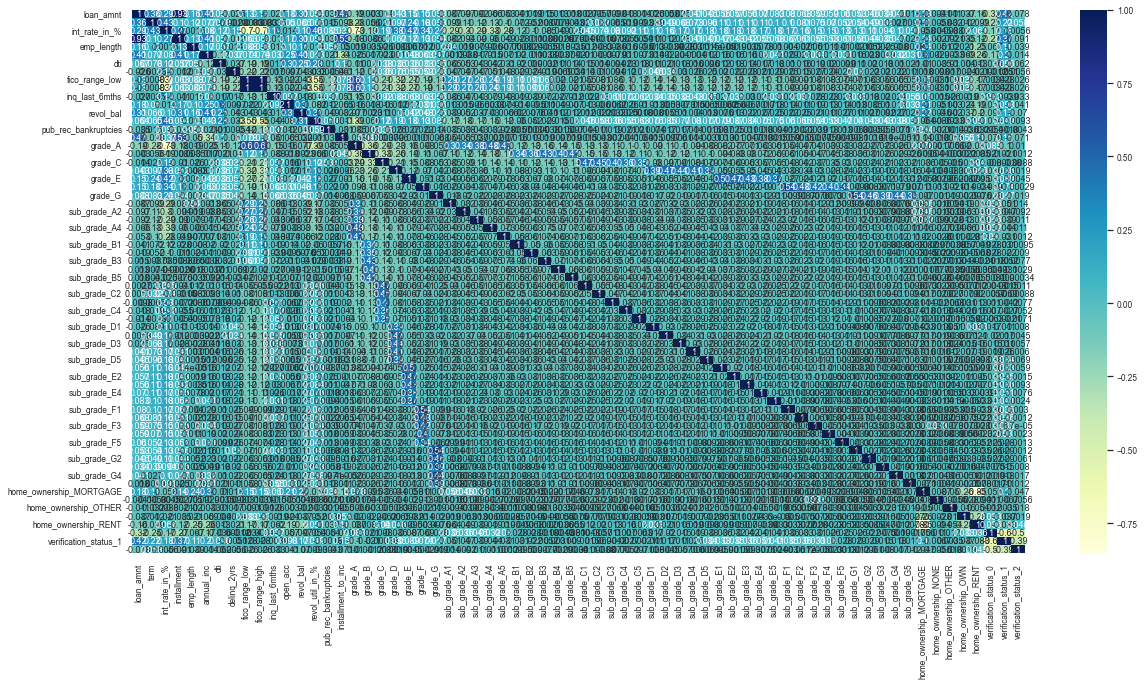

In [134]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True,cmap="YlGnBu")

In [135]:
X_scaled_df.corr()

loan_amnt      term  int_rate_in_%  installment  \
loan_amnt               1.000000  0.358820       0.293244     0.930591   
term                    0.358820  1.000000       0.432276     0.099980   
int_rate_in_%           0.293244  0.432276       1.000000     0.271113   
installment             0.930591  0.099980       0.271113     1.000000   
emp_length              0.157867  0.116116       0.001628     0.128147   
...                          ...       ...            ...          ...   
home_ownership_OWN     -0.036937 -0.012089      -0.020536    -0.034650   
home_ownership_RENT    -0.156454 -0.099273       0.067340    -0.121980   
verification_status_0  -0.324279 -0.252081      -0.171958    -0.270029   
verification_status_1   0.418140  0.215001       0.178286     0.372175   
verification_status_2  -0.078295  0.058361       0.005550    -0.091185   

                       emp_length  annual_inc       dti  delinq_2yrs  \
loan_amnt                0.157867    0.413653  0.067028    -0.025933   
term                     0.116116    0.076540  0.077827    -0.002341   
int_rate_in_%            0.001628    0.080417  0.120403     0.150287   
installment              0.128147    0.413433  0.056760    -0.012387   
emp_length               1.000000    0.166187  0.057429     0.014128   
...                           ...         ...       ...          ...   
home_ownership_OWN       0.020667   -0.068847 -0.003994     0.002443   
home_ownership_RENT     -0.251874   -0.256878  0.013292    -0.021302   
verification_status_0   -0.067271   -0.173566 -0.036197    -0.000120   
verification_status_1    0.107337    0.197819  0.095643    -0.005070   
verification_status_2   -0.038555   -0.013754 -0.061793     0.005632   

                       fico_range_low  fico_range_high  inq_last_6mths  \
loan_amnt                    0.131668         0.131668       -0.026776   
term                        -0.000827        -0.000827        0.003542   
int_rate_in_%               -0.703869        -0.703869        0.185646   
installment                  0.062668         0.062668       -0.010789   
emp_length                   0.088012         0.088012       -0.014842   
...                               ...              ...             ...   
home_ownership_OWN           0.033451         0.033451       -0.001890   
home_ownership_RENT         -0.168870        -0.168870       -0.061998   
verification_status_0       -0.003358        -0.003358        0.032263   
verification_status_1        0.027977         0.027977       -0.003884   
verification_status_2       -0.026431        -0.026431       -0.033074   

                       open_acc  revol_bal  revol_util_in_%  \
loan_amnt              0.177297   0.314233         0.063720   
term                   0.050007   0.065880         0.064671   
int_rate_in_%          0.014500   0.101120         0.463650   
installment            0.173799   0.313012         0.093689   
emp_length             0.102775   0.158189         0.014006   
...                         ...        ...              ...   
home_ownership_OWN    -0.023861  -0.036863        -0.051541   
home_ownership_RENT   -0.192940  -0.201500         0.091453   
verification_status_0 -0.056971  -0.096555        -0.053717   
verification_status_1  0.098495   0.167373         0.048727   
verification_status_2 -0.040878  -0.069760         0.009282   

                       pub_rec_bankruptcies  installment_to_inc   grade_A  \
loan_amnt                         -0.035227            0.473978 -0.189387   
term                               0.015244           -0.097539 -0.280079   
int_rate_in_%                      0.085219            0.036719 -0.732332   
installment                       -0.032251            0.532340 -0.178944   
emp_length                         0.058120           -0.050388  0.019449   
...                                     ...                 ...       ...   
home_ownership_OWN                -0.003569            0.055245  0.020107   
home_ow

In [136]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

In [137]:
X_scaled

loan_amnt      term  int_rate_in_%  installment  emp_length  \
0      -0.821837 -0.593044      -0.398569    -0.764497    1.481536   
1      -1.160101  1.686215       0.850379    -1.260584   -1.191882   
2      -1.173632 -0.593044       1.036910    -1.142628    1.481536   
3      -0.145308 -0.593044       0.369182     0.084973    1.481536   
4      -1.092448  1.686215       0.152914    -1.222260   -1.191882   
...          ...       ...            ...          ...         ...   
42507  -1.227754 -0.593044       0.182651    -1.225101   -1.191882   
42509  -0.774480 -0.593044       0.269158    -0.679281   -1.191882   
42511  -0.145308 -0.593044       0.696288     0.113235   -1.191882   
42513  -0.686531 -0.593044      -0.414789    -0.608459   -1.191882   
42514  -0.903020 -0.593044      -0.671608    -0.868587   -0.894836   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
0       -1.075805  2.123779    -0.321395        0.597916         0.597916   
1       -0.924504 -1.846100    -0.321395        0.736544         0.736544   
2       -1.372053 -0.696101    -0.321395        0.597916         0.597916   
3       -0.440340  0.984207    -0.321395       -0.649738        -0.649738   
4        0.336340  0.677343    -0.321395       -0.511110        -0.511110   
...           ...       ...          ...             ...              ...   
42507   -1.428841 -1.476670     2.315325       -1.897391        -1.897391   
42509   -1.580142  0.239390    -0.321395       -1.481507        -1.481507   
42511   -0.420166 -0.919547     4.952046       -1.758763        -1.758763   
42513   -1.176672 -0.073434    -0.321395       -0.511110        -0.511110   
42514   -0.924504 -1.440919    -0.321395       -0.511110        -0.511110   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
0           -0.029178 -1.427537   0.018400         1.218438   
1            2.927848 -1.427537  -0.749091        -1.405192   
2            0.710078 -1.654513  -0.667664         1.741045   
3           -0.029178  0.161294  -0.498137        -0.995581   
4           -0.768435  1.296173   0.925390         0.166161   
...               ...       ...        ...              ...   
42507       -0.768435 -1.654513  -0.820701         0.448652   
42509       -0.029178 -1.881489  -0.857340         0.017854   
42511       -0.768435  1.069197  -0.214074         1.264343   
42513        2.188591 -0.973586   0.019170         0.593428   
42514       -0.768435 -1.200562  -0.633207         0.505150   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
0                  -0.21327            0.468507 -0.565967  1.551998 -0.508417   
1                  -0.21327           -1.129144 -0.565967 -0.644331  1.966890   
2                  -0.21327            0.350940 -0.565967 -0.644331  1.966890   
3                  -0.21327            0.417118 -0.565967 -0.644331  1.966890   
4                  -0.21327           -1.411083 -0.565967  1.551998 -0.508417   
...                     ...                 ...       ...       ...       ...   
42507              -0.21327            0.398780 -0.565967 -0.644331 -0.508417   
42509              -0.21327           11.912785 -0.565967 -0.644331 -0.508417   
42511              -0.21327            0.384229 -0.565967 -0.644331 -0.508417   
42513              -0.21327            1.399207 -0.565967 -0.644331  1.966890   
42514              -0.21327           -0.159033 -0.565967  1.551998 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
0     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
1     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
2     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
3     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
4     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

In [138]:
X_scaled_train

loan_amnt      term  int_rate_in_%  installment  emp_length  \
34685   0.531221 -0.593044       0.201575     0.880281   -1.191882   
36729   0.450038 -0.593044       0.193465     0.782065    1.184490   
23002  -0.686531 -0.593044       0.431360    -0.565225   -0.597789   
35327  -0.415919 -0.593044       0.015043    -0.266052   -0.300743   
29095  -1.281877  1.686215       0.934183    -1.362988    1.481536   
...          ...       ...            ...          ...         ...   
30389  -0.957143 -0.593044      -1.450173    -0.956066   -0.597789   
18443  -1.119510 -0.593044       1.255882    -1.069544   -0.894836   
34342  -0.348267 -0.593044       0.390809    -0.158496   -0.894836   
5443    0.531221  1.686215       1.474853     0.268791   -0.597789   
39219  -0.686531 -0.593044      -0.722972    -0.623962    0.590397   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
34685   -0.672335  1.392368    -0.321395       -0.233853        -0.233853   
36729   -0.142881 -0.474146    -0.321395       -0.511110        -0.511110   
23002   -0.634610  0.304934    -0.321395       -1.204250        -1.204250   
35327   -0.924504 -1.375375    -0.321395        0.597916         0.597916   
29095    1.092846 -1.189171    -0.321395       -1.204250        -1.204250   
...           ...       ...          ...             ...              ...   
30389    0.462424 -0.094289    -0.321395        1.845569         1.845569   
18443   -0.531120  1.544310    -0.321395       -1.342879        -1.342879   
34342   -1.176672  0.230452    -0.321395       -0.649738        -0.649738   
5443    -0.041913  0.069571    -0.321395       -0.788366        -0.788366   
39219   -0.167997 -0.034703    -0.321395        0.459288         0.459288   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
34685       -0.768435  0.615245   0.254532         1.084255   
36729       -0.768435  0.161294  -0.597018        -0.734277   
23002        0.710078 -0.292658  -0.541578         0.092007   
35327       -0.768435 -1.427537  -0.483893        -0.024520   
29095        0.710078  0.615245  -0.654382        -1.292196   
...               ...       ...        ...              ...   
30389        0.710078  0.388270   2.234893        -1.542906   
18443        1.449335 -0.519634  -0.578923         1.744576   
34342        1.449335 -0.519634  -0.571479        -0.307010   
5443        -0.029178 -0.746610  -0.284207         1.211376   
39219       -0.768435  0.842221   1.222993         0.205004   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
34685             -0.213270            2.154075 -0.565967 -0.644331  1.966890   
36729             -0.213270            0.747223 -0.565967 -0.644331  1.966890   
23002             -0.213270           -0.174379 -0.565967 -0.644331  1.966890   
35327             -0.213270            1.053605 -0.565967  1.551998 -0.508417   
29095              4.688885           -1.549158 -0.565967 -0.644331 -0.508417   
...                     ...                 ...       ...       ...       ...   
30389             -0.213270           -1.163384  1.766888 -0.644331 -0.508417   
18443             -0.213270           -1.016178 -0.565967 -0.644331 -0.508417   
34342             -0.213270            2.654288 -0.565967 -0.644331  1.966890   
5443              -0.213270           -0.239254 -0.565967 -0.644331 -0.508417   
39219             -0.213270           -0.625899 -0.565967  1.551998 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
34685 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
36729 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
23002 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
35327 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
29095  2.472999 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

In [139]:
X_scaled_test

loan_amnt      term  int_rate_in_%  installment  emp_length  \
36182  -0.821837 -0.593044      -0.674311    -0.776004    1.481536   
21626   0.666527 -0.593044      -1.509647     0.813745   -1.191882   
4621    0.666527  1.686215       0.850379     0.294934   -1.191882   
23902   0.125304 -0.593044      -0.576991     0.315299   -1.191882   
33203  -0.740653 -0.593044      -0.860842    -0.691991   -0.894836   
...          ...       ...            ...          ...         ...   
37944   0.531221 -0.593044       0.536790     0.923323    1.184490   
35747   0.531221 -0.593044      -0.174191     0.832280   -0.597789   
4904    0.531221 -0.593044      -1.647518     0.649378   -0.300743   
3587   -1.092448 -0.593044       0.079924    -1.065982   -1.191882   
8644    1.748973 -0.593044      -1.387996     2.018670    1.184490   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
36182    0.084070  0.413677     2.315325        0.459288         0.459288   
21626   -0.167997  0.144053    -0.321395        0.875172         0.875172   
4621    -0.280566  0.258755    -0.321395        0.043403         0.043403   
23902   -0.672335 -1.928030    -0.321395        1.429685         1.429685   
33203   -0.735377  1.213611    -0.321395        0.875172         0.875172   
...           ...       ...          ...             ...              ...   
37944    0.613726  0.507524    -0.321395       -0.926994        -0.926994   
35747    0.462324 -0.502449    -0.321395        0.736544         0.736544   
4904     0.462424  0.002538    -0.321395        2.261454         2.261454   
3587    -0.584076  1.654544    -0.321395       -0.372481        -0.372481   
8644    -0.013081  1.270218    -0.321395        1.429685         1.429685   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
36182       -0.768435 -0.746610  -0.241088        -0.391757   
21626        1.449335  1.296173   0.135889        -1.122701   
4621         0.710078  0.161294  -0.180579         0.960665   
23902       -0.768435 -1.427537  -0.842774        -1.641778   
33203        2.188591 -0.519634  -0.787719        -1.225104   
...               ...       ...        ...              ...   
37944       -0.029178  0.388270   0.229315         1.476210   
35747       -0.029178  1.750125   0.049008        -0.317604   
4904        -0.029178  1.750125  -0.186226        -1.444034   
3587        -0.768435 -0.973586   0.921476         1.695141   
8644        -0.768435 -0.519634  -0.553898        -1.281602   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
36182             -0.213270           -0.916025  1.766888 -0.644331 -0.508417   
21626             -0.213270            1.053605  1.766888 -0.644331 -0.508417   
4621              -0.213270            0.110545 -0.565967 -0.644331  1.966890   
23902             -0.213270            1.390113 -0.565967  1.551998 -0.508417   
33203             -0.213270           -0.125080  1.766888 -0.644331 -0.508417   
...                     ...                 ...       ...       ...       ...   
37944              4.688885            0.028592 -0.565967 -0.644331 -0.508417   
35747             -0.213270            0.146350 -0.565967  1.551998 -0.508417   
4904              -0.213270            0.146266  1.766888 -0.644331 -0.508417   
3587              -0.213270           -0.944322 -0.565967  1.551998 -0.508417   
8644              -0.213270            2.030078  1.766888 -0.644331 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
36182 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
21626 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
4621  -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
23902 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
33203 -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

In [140]:
y_train

34685    1
36729    1
23002    0
35327    1
29095    1
        ..
30389    1
18443    1
34342    1
5443     1
39219    1
Name: loan_status, Length: 29138, dtype: object

In [141]:
y_test

36182    1
21626    1
4621     0
23902    1
33203    1
        ..
37944    1
35747    1
4904     1
3587     1
8644     1
Name: loan_status, Length: 12489, dtype: object

## 4.3. Skompresowanie danych metodą PCA  

In [142]:
from sklearn.decomposition import PCA
pca = PCA(random_state=66)
pca.fit(X_scaled)

PCA(random_state=66)

In [143]:
pca.components_[0]

array([ 0.14017412,  0.15699755,  0.41050689,  0.13816196,  0.00437641,
        0.05222901,  0.10490344,  0.07942327, -0.35311485, -0.35311485,
        0.08061789,  0.03397714,  0.09507875,  0.26248816,  0.04925366,
        0.03054147, -0.334949  , -0.06558299,  0.09988667,  0.16336645,
        0.16857078,  0.12966234,  0.08932806, -0.1332348 , -0.13830531,
       -0.13586303, -0.14586856, -0.12569915, -0.04723288, -0.03963052,
       -0.02845482, -0.01469735, -0.00253435,  0.03417861,  0.04278478,
        0.03922599,  0.04278065,  0.04757919,  0.05620401,  0.07248251,
        0.07213512,  0.07088818,  0.07168176,  0.07619871,  0.07589022,
        0.07349284,  0.06974222,  0.07044742,  0.06692305,  0.06103917,
        0.05510793,  0.05390794,  0.0480567 ,  0.04715267,  0.041591  ,
        0.03566798,  0.03925308,  0.0338842 , -0.02719284, -0.00252815,
        0.00334556, -0.02290047,  0.03887717, -0.09500757,  0.10339238,
       -0.00222962])

In [144]:
pca.explained_variance_ratio_

array([7.99323760e-02, 5.45943284e-02, 3.75085137e-02, 3.43103065e-02,
       3.24430529e-02, 3.17587468e-02, 3.07963397e-02, 3.05820814e-02,
       2.43180088e-02, 2.19379680e-02, 1.87859141e-02, 1.81721756e-02,
       1.74464746e-02, 1.70759974e-02, 1.66292021e-02, 1.62857420e-02,
       1.62561514e-02, 1.61848266e-02, 1.61072504e-02, 1.60051885e-02,
       1.59512959e-02, 1.59121843e-02, 1.58712912e-02, 1.57852039e-02,
       1.56919808e-02, 1.56633222e-02, 1.56334082e-02, 1.56082676e-02,
       1.55893732e-02, 1.55548016e-02, 1.54964538e-02, 1.54384902e-02,
       1.54358493e-02, 1.53710635e-02, 1.53223783e-02, 1.52808780e-02,
       1.52578017e-02, 1.52332638e-02, 1.52104913e-02, 1.51620914e-02,
       1.51160144e-02, 1.50594341e-02, 1.48276245e-02, 1.46761277e-02,
       1.43912088e-02, 1.42821516e-02, 1.31490946e-02, 1.21504767e-02,
       9.91378939e-03, 7.21999625e-03, 5.39570089e-03, 3.16099287e-03,
       2.05244391e-03, 5.87126218e-04, 4.17282947e-04, 8.44539993e-33,
      

In [145]:
var_cumu = np.cumsum(pca.explained_variance_ratio_) #po dodaniu kazdej wartosci z wariancji otrzymamy w sumie 1
var_cumu

array([0.07993238, 0.1345267 , 0.17203522, 0.20634552, 0.23878858,
       0.27054732, 0.30134366, 0.33192575, 0.35624375, 0.37818172,
       0.39696764, 0.41513981, 0.43258629, 0.44966228, 0.46629149,
       0.48257723, 0.49883338, 0.51501821, 0.53112546, 0.54713065,
       0.56308194, 0.57899413, 0.59486542, 0.61065062, 0.6263426 ,
       0.64200592, 0.65763933, 0.6732476 , 0.68883697, 0.70439177,
       0.71988823, 0.73532672, 0.75076257, 0.76613363, 0.78145601,
       0.79673689, 0.81199469, 0.82722795, 0.84243844, 0.85760054,
       0.87271655, 0.88777598, 0.90260361, 0.91727974, 0.93167094,
       0.9459531 , 0.95910219, 0.97125267, 0.98116646, 0.98838645,
       0.99378215, 0.99694315, 0.99899559, 0.99958272, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

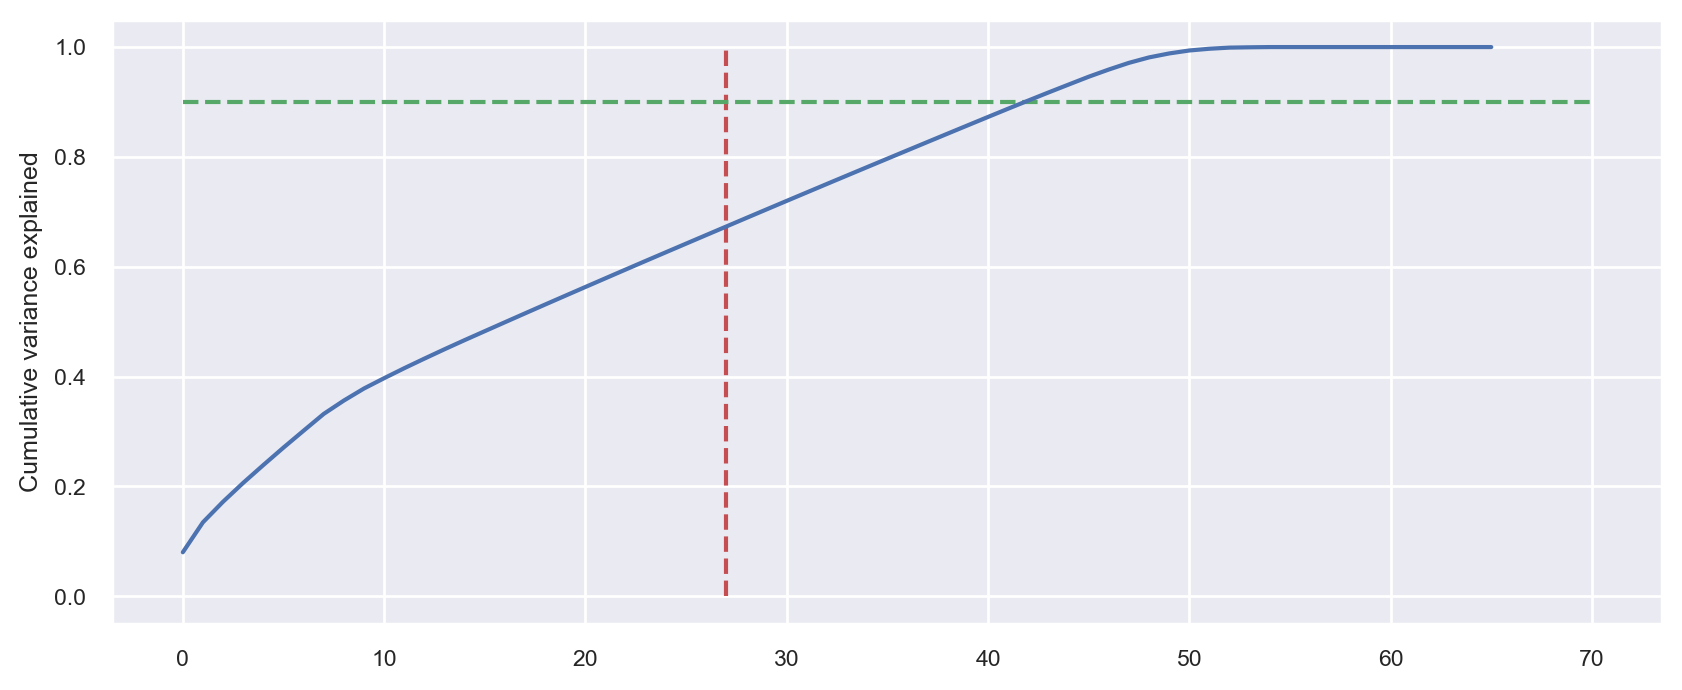

In [146]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--") 
plt.hlines(y=0.90, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Wnioski:  Wykres pokazuje nam ze 66 kolumn (wszytskie dane) opisuje nam 100% a 27 kolumn opisuja nam 88%, stad mozemy usunac 39 kolumn bo ich wartosc dodana jest niewielka.

In [147]:
from sklearn.decomposition import IncrementalPCA 
pca_final = IncrementalPCA(n_components=27)  
X_pca_final = pca_final.fit_transform(X_scaled)

In [148]:
print(X.shape)
print(X_pca_final.shape)

(41627, 66)
(41627, 27)


In [149]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [150]:
corrmat.shape

(27, 27)

<AxesSubplot:>

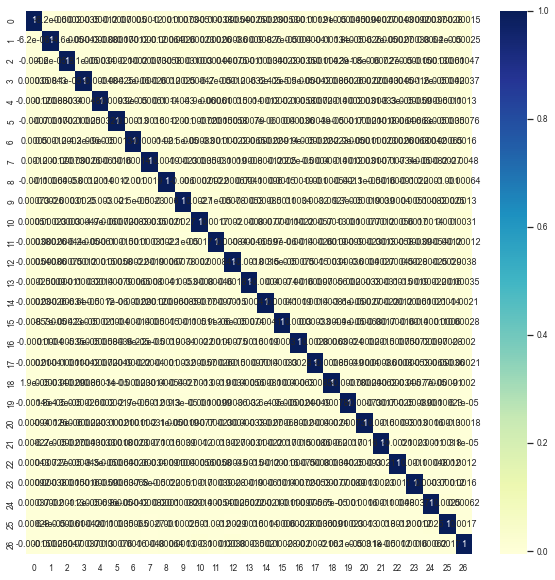

In [151]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True,cmap="YlGnBu") 

Każda z kolumn niesie dużą wartość informacyjną i żadne z nich nie są do siebie podobne, ponieważ wartości korelacji bliskie są 0 (na diagonalu zawsze będziemy mieć wartość 1).

In [152]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

PC1       PC2        Feature
0  0.140174  0.414925      loan_amnt
1  0.156998  0.161239           term
2  0.410507 -0.005299  int_rate_in_%
3  0.138162  0.379048    installment
4  0.004376  0.177193     emp_length

In [153]:
pca_df

PC1       PC2                Feature
0   0.140174  0.414925              loan_amnt
1   0.156998  0.161239                   term
2   0.410507 -0.005299          int_rate_in_%
3   0.138162  0.379048            installment
4   0.004376  0.177193             emp_length
..       ...       ...                    ...
61 -0.022900 -0.019431     home_ownership_OWN
62  0.038877 -0.262032    home_ownership_RENT
63 -0.095008 -0.214155  verification_status_0
64  0.103392  0.276879  verification_status_1
65 -0.002230 -0.052506  verification_status_2

[66 rows x 3 columns]

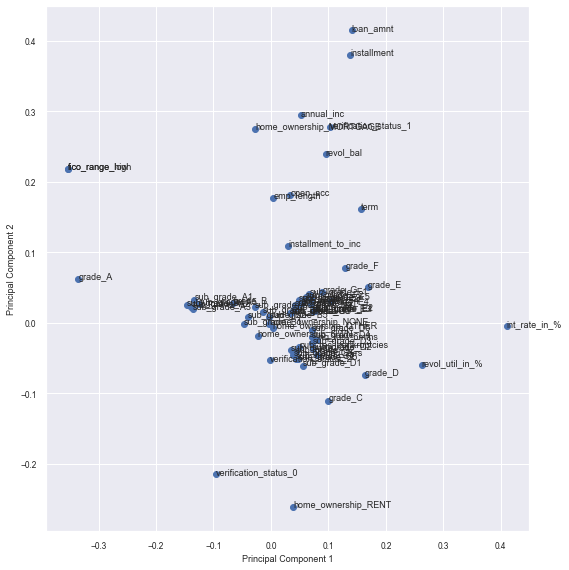

In [154]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

Wygląda na to, że moglibyśmy usunąć kolumny dotyczące home_ownership, gdyż nie przynoszą one wartości dodanej do modelu.

## 4.4. Klasteryzacja

In [155]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [156]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [157]:
kmeans.labels_

array([4, 2, 2, ..., 0, 2, 4])

### 4.4.1. Określenie optymalnej liczby klastrów

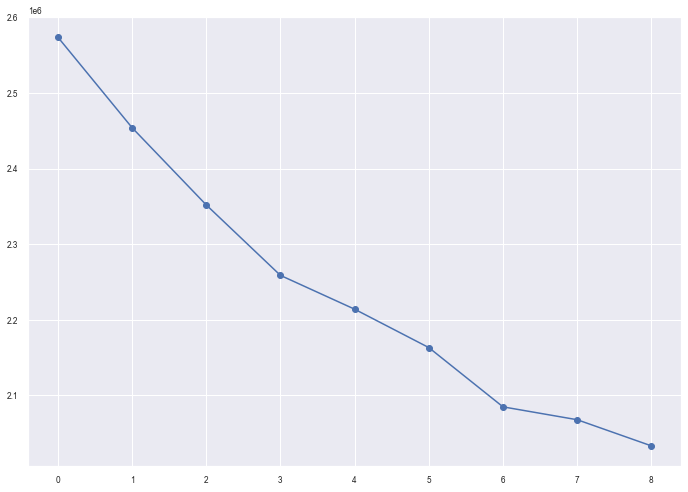

In [158]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd, marker = "o" )

Metoda łokciowa wyznaczyła optymalną ilość klastrów na 3.

In [159]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.09406716168132505
For n_clusters=3, the silhouette score is 0.03396622696731543
For n_clusters=4, the silhouette score is 0.06548426849220157
For n_clusters=5, the silhouette score is 0.08850301869814776
For n_clusters=6, the silhouette score is 0.09221189605094053
For n_clusters=7, the silhouette score is 0.09645490782676784
For n_clusters=8, the silhouette score is 0.0927016992877818
For n_clusters=9, the silhouette score is 0.10657578236373041
For n_clusters=10, the silhouette score is 0.11001352107016989


Zgodnie z wyliczeniami najskuteczniejsza będzie metoda trzech klastrów.

In [160]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=66)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=3, random_state=66)

In [161]:
kmeans.labels_

array([2, 1, 1, ..., 1, 1, 2])

In [162]:
X_pca_final.shape

(41627, 27)

In [163]:
X.shape

(41627, 66)

### 4.4.2. K-Means Clustering

In [164]:
X['K-Means_Cluster_ID'] = kmeans.labels_

In [165]:
X.head()

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc    dti  \
0     5000.0  36.0          10.65       162.87        10.0     24000.0  27.65   
1     2500.0  60.0          15.27        59.83         1.0     30000.0   1.00   
2     2400.0  36.0          15.96        84.33        10.0     12252.0   8.72   
3    10000.0  36.0          13.49       339.31        10.0     49200.0  20.00   
4     3000.0  60.0          12.69        67.79         1.0     80000.0  17.94   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
0          0.0           735.0            739.0             1.0       3.0   
1          0.0           740.0            744.0             5.0       3.0   
2          0.0           735.0            739.0             2.0       2.0   
3          0.0           690.0            694.0             1.0      10.0   
4          0.0           695.0            699.0             0.0      15.0   

   revol_bal  revol_util_in_%  pub_rec_bankruptcies  installment_to_inc  \
0    13648.0             83.7                   0.0            6.950000   
1     1687.0              9.4                   0.0            1.680000   
2     2956.0             98.5                   0.0            6.562194   
3     5598.0             21.0                   0.0            6.780488   
4    27783.0             53.9                   0.0            0.750000   

   grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             1   
3             1             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

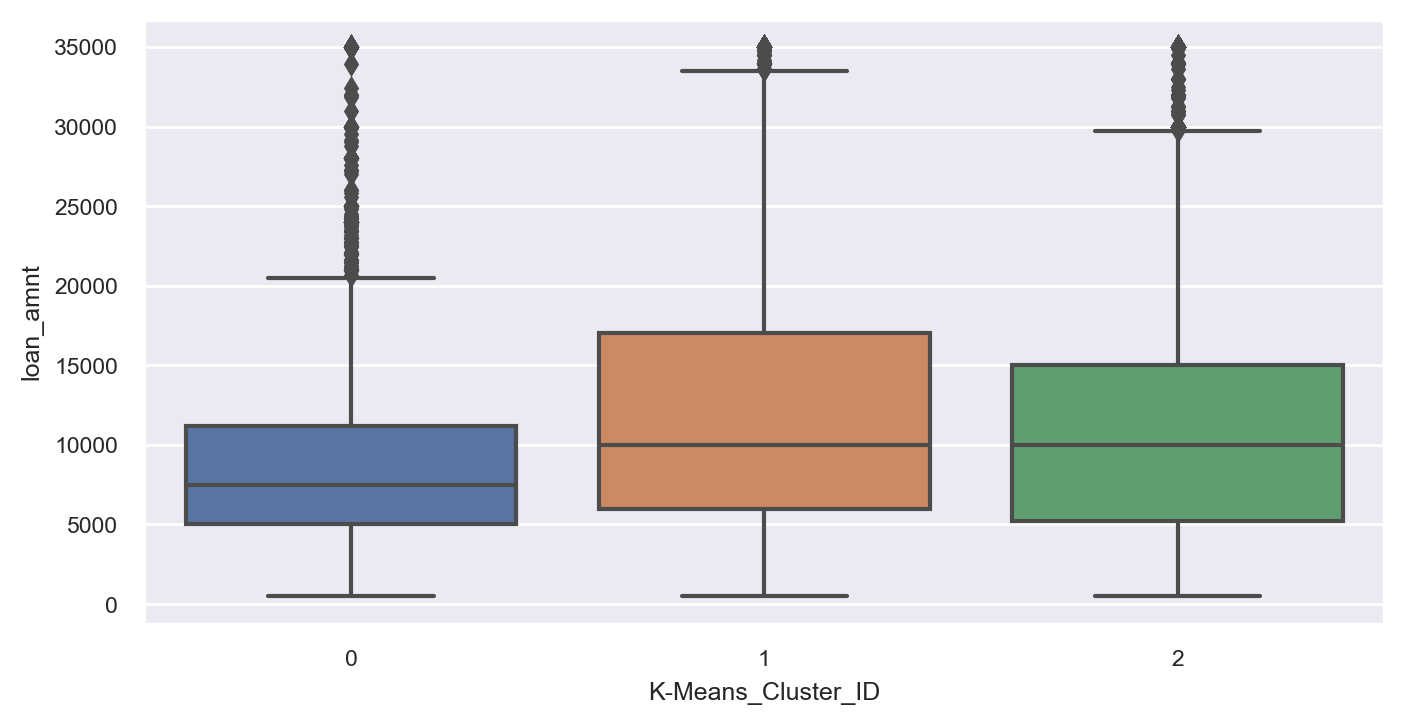

In [166]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

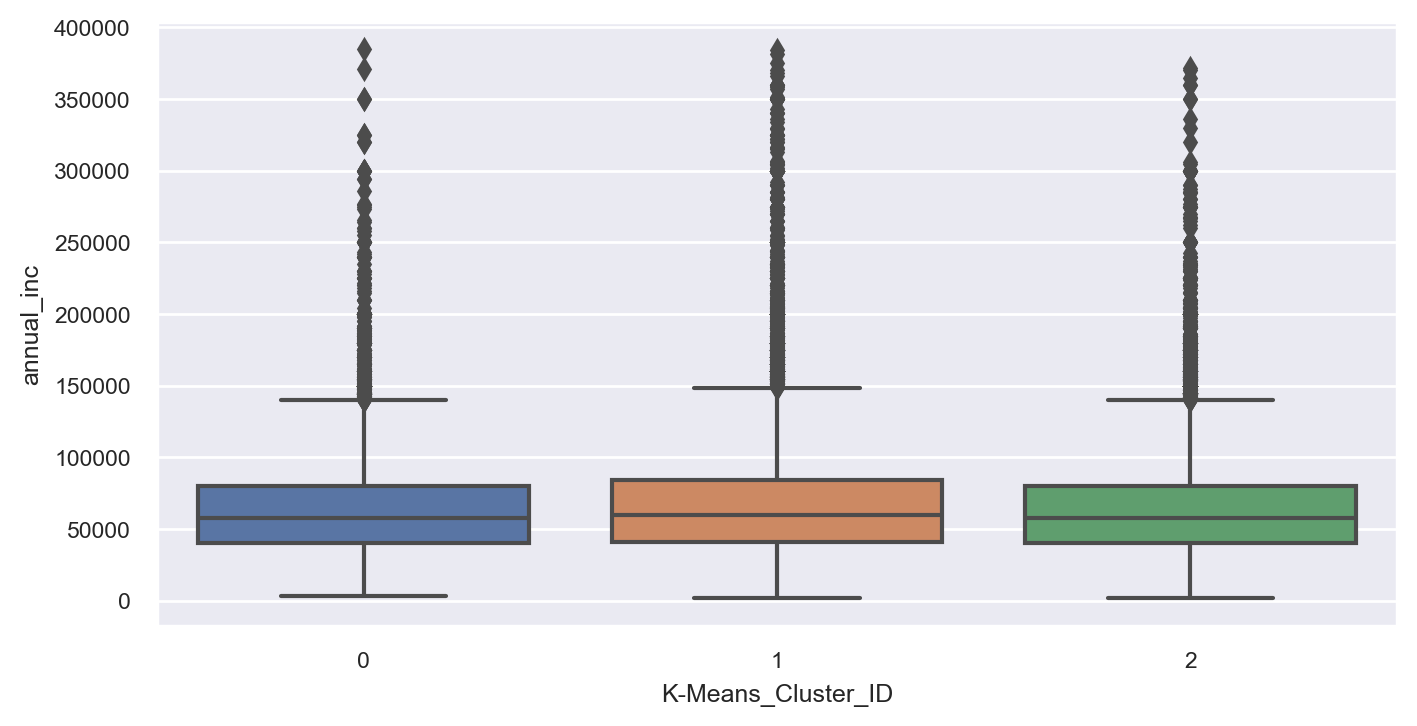

In [167]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='installment'>

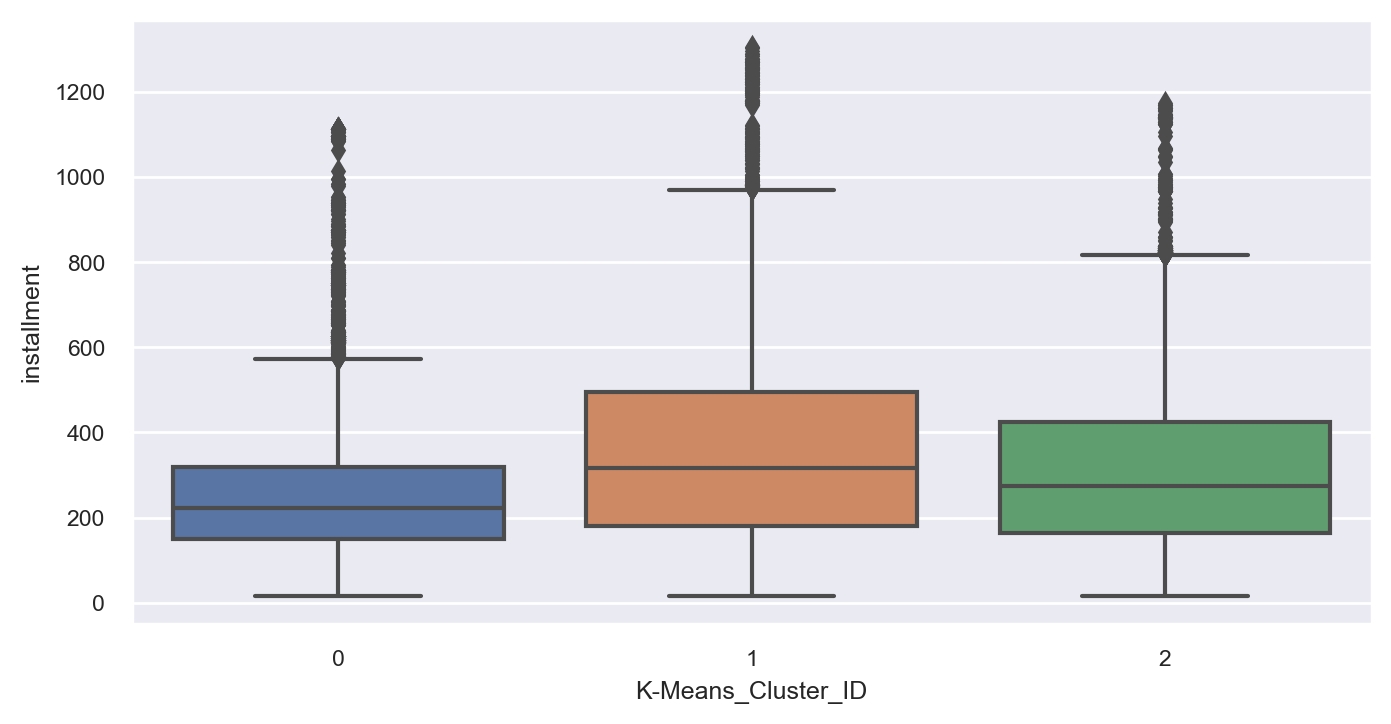

In [168]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='installment', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='emp_length'>

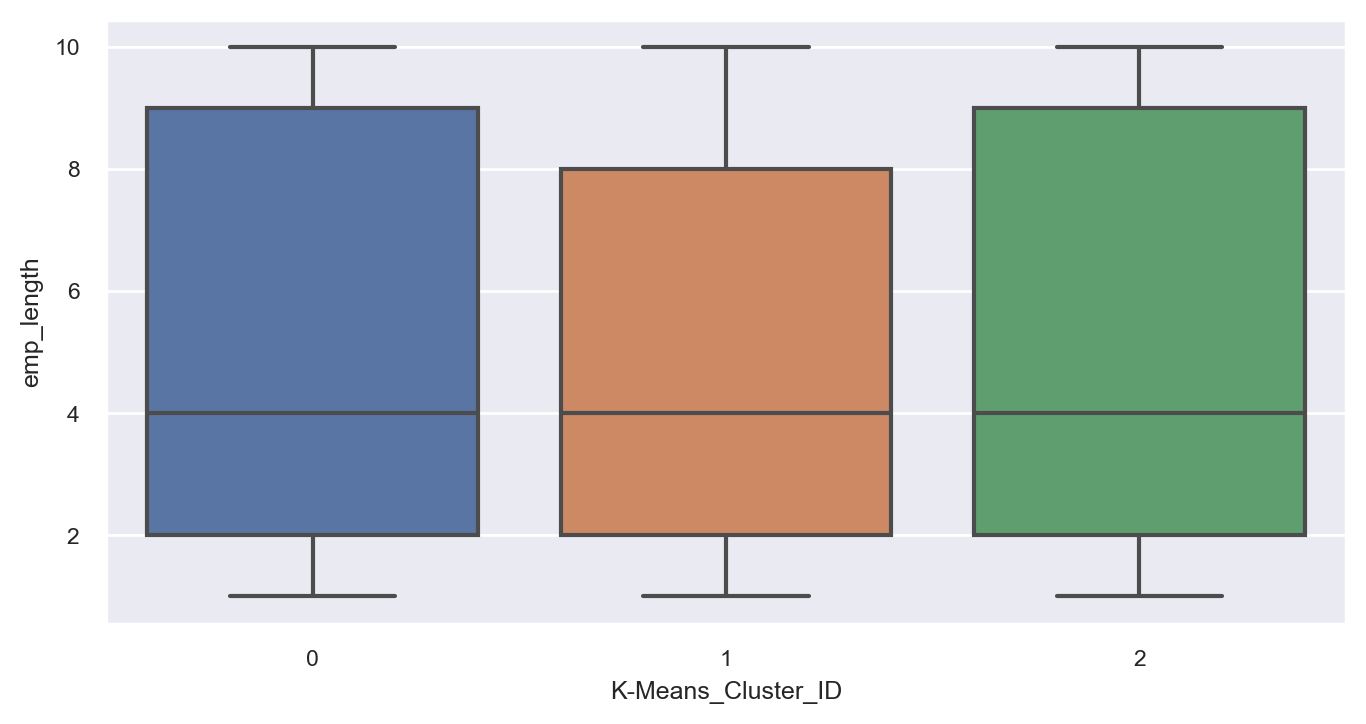

In [169]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=X)

Nie stwierdzam występowania outlierów. Grupa 0 i 2 mają podobną wielkość. Grupa 1 jest nieznacznie mniejsza od 0 i 2.

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='installment_to_inc'>

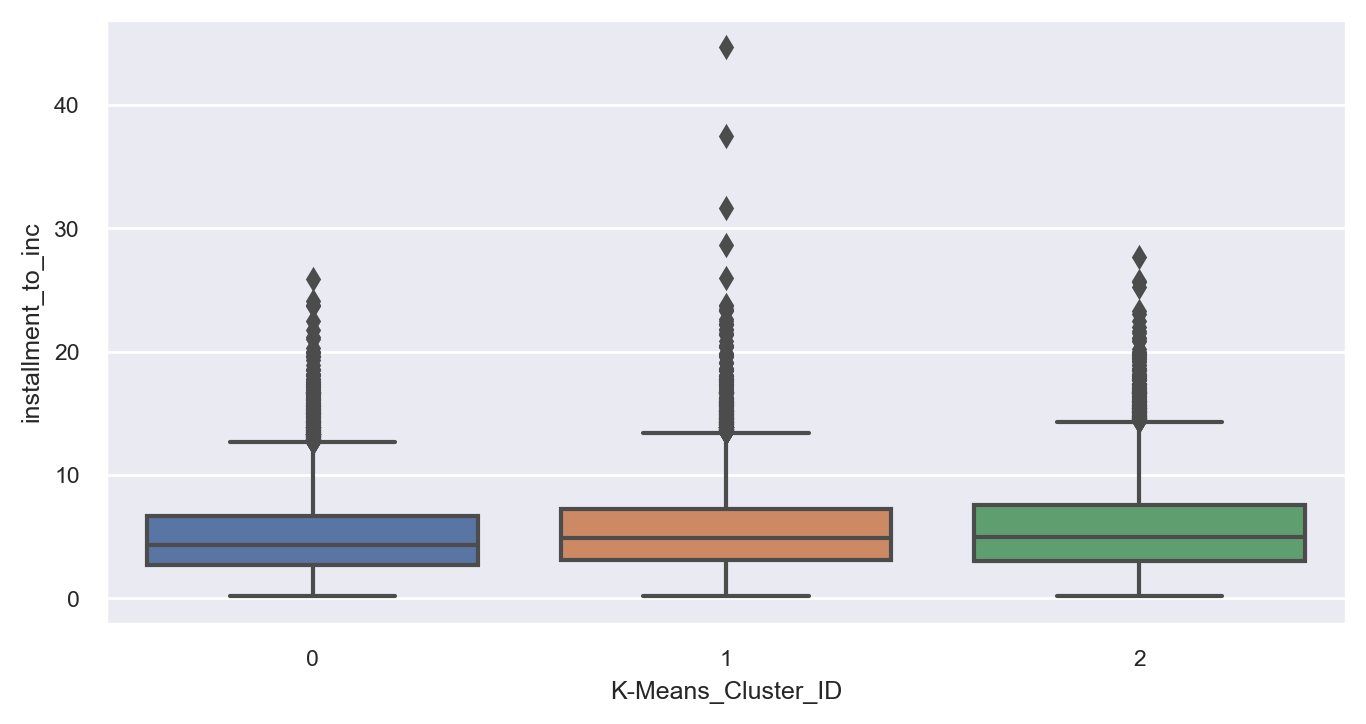

In [170]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='installment_to_inc', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico_range_low'>

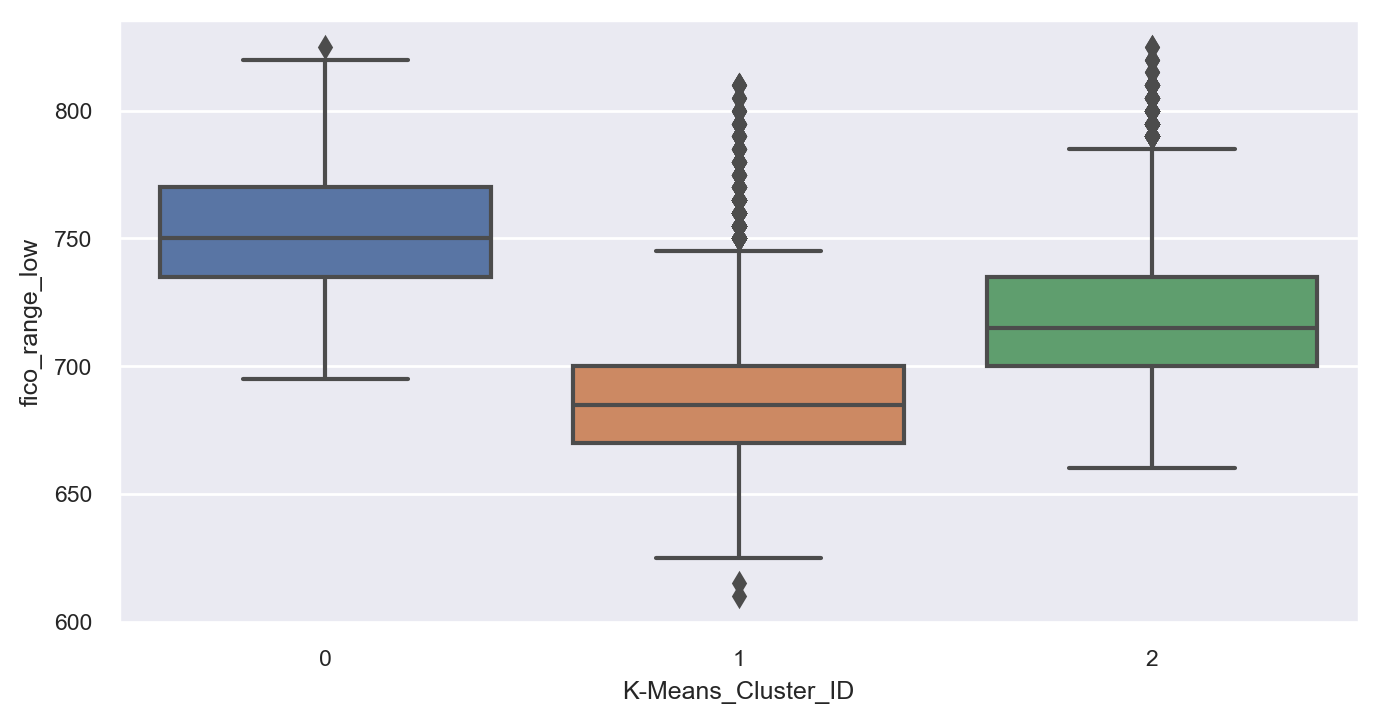

In [171]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_low', data=X)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico_range_high'>

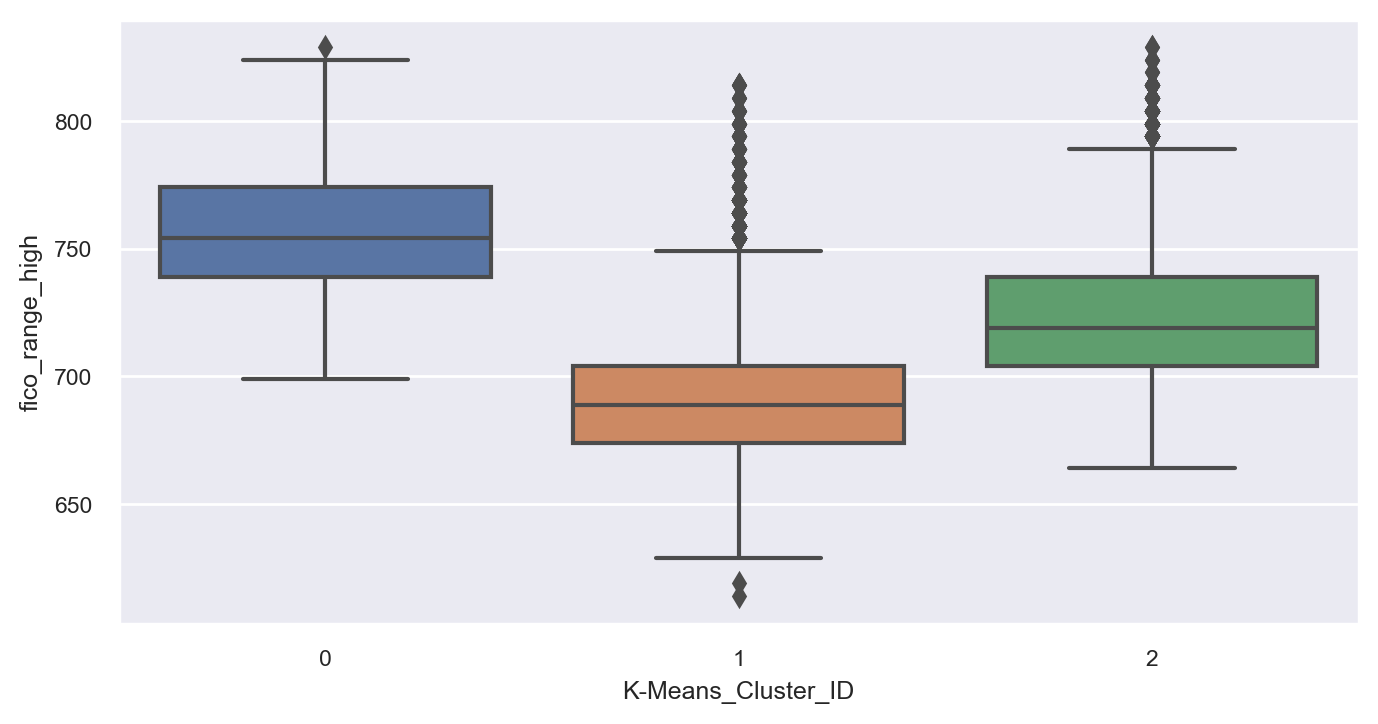

In [172]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_high', data=X)

Sytuacja jak w przypadku porównania fico_range_low. Nieznaczna liczba outlierów w grupie 0. Najwięcej outlierów występuje w grupie 1, równie dużo outlierów w grupie 2. Grupa 0 i 2 są podobnej wielkości. Grupa 1 jest nieznacznie mniejsza.

In [174]:
X[X['K-Means_Cluster_ID'] ==2]

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
0         5000.0  36.0          10.65       162.87        10.0     24000.0   
4         3000.0  60.0          12.69        67.79         1.0     80000.0   
9         5375.0  60.0          12.69       121.45         1.0     15000.0   
11       12000.0  36.0          12.69       402.54        10.0     75000.0   
13        3000.0  36.0           9.91        96.68         3.0     15000.0   
...          ...   ...            ...          ...         ...         ...   
42412     4100.0  36.0           9.33       131.01         2.0     16000.0   
42433     4000.0  36.0           9.33       127.82         1.0     50000.0   
42459     2500.0  36.0           9.96        80.63         1.0     18000.0   
42472     8000.0  36.0           9.96       257.99         3.0     25000.0   
42514     4400.0  36.0           9.64       141.25         2.0     30000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0      27.65          0.0           735.0            739.0             1.0   
4      17.94          0.0           695.0            699.0             0.0   
9      18.08          0.0           725.0            729.0             0.0   
11     10.78          0.0           675.0            679.0             0.0   
13     12.56          0.0           705.0            709.0             2.0   
...      ...          ...             ...              ...             ...   
42412   2.70          0.0           700.0            704.0             0.0   
42433   4.00          0.0           700.0            704.0             3.0   
42459   2.33          0.0           690.0            694.0             1.0   
42472   0.48          0.0           700.0            704.0             1.0   
42514   3.72          0.0           695.0            699.0             0.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
0           3.0    13648.0             83.7                   0.0   
4          15.0    27783.0             53.9                   0.0   
9           2.0     9279.0             36.5                   0.0   
11         12.0    23336.0             67.1                   0.0   
13         11.0     7323.0             43.1                   0.0   
...         ...        ...              ...                   ...   
42412       1.0      355.0             59.2                   0.0   
42433       4.0     6500.0             80.0                   0.0   
42459       6.0     2937.0             43.3                   0.0   
42472       3.0      316.0             19.2                   0.0   
42514       4.0     3493.0             63.5                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
0                   6.950        0        1        0        0        0   
4                   0.750        0        1        0        0        0   
9                   7.200        0        1        0        0        0   
11                  5.328        0        1        0        0        0   
13                  6.640        0        1        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
42412               8.550        0        1        0        0        0   
42433               2.664        0        1        0        0        0   
42459               4.600        0        1        0        0        0   
42472              10.656        0        1        0        0        0   
42514               4.880        0        1        0        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0            0        0             0             0             0   
4            0        0             0             0             0   
9            0        0             0             0             0   
11           0        0             0             0             0   
13           0        0             0             0             0   
.

In [175]:
X_scaled_df

loan_amnt      term  int_rate_in_%  installment  emp_length  \
0      -0.821837 -0.593044      -0.398569    -0.764497    1.481536   
1      -1.160101  1.686215       0.850379    -1.260584   -1.191882   
2      -1.173632 -0.593044       1.036910    -1.142628    1.481536   
3      -0.145308 -0.593044       0.369182     0.084973    1.481536   
4      -1.092448  1.686215       0.152914    -1.222260   -1.191882   
...          ...       ...            ...          ...         ...   
42507  -1.227754 -0.593044       0.182651    -1.225101   -1.191882   
42509  -0.774480 -0.593044       0.269158    -0.679281   -1.191882   
42511  -0.145308 -0.593044       0.696288     0.113235   -1.191882   
42513  -0.686531 -0.593044      -0.414789    -0.608459   -1.191882   
42514  -0.903020 -0.593044      -0.671608    -0.868587   -0.894836   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
0       -1.075805  2.123779    -0.321395        0.597916         0.597916   
1       -0.924504 -1.846100    -0.321395        0.736544         0.736544   
2       -1.372053 -0.696101    -0.321395        0.597916         0.597916   
3       -0.440340  0.984207    -0.321395       -0.649738        -0.649738   
4        0.336340  0.677343    -0.321395       -0.511110        -0.511110   
...           ...       ...          ...             ...              ...   
42507   -1.428841 -1.476670     2.315325       -1.897391        -1.897391   
42509   -1.580142  0.239390    -0.321395       -1.481507        -1.481507   
42511   -0.420166 -0.919547     4.952046       -1.758763        -1.758763   
42513   -1.176672 -0.073434    -0.321395       -0.511110        -0.511110   
42514   -0.924504 -1.440919    -0.321395       -0.511110        -0.511110   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
0           -0.029178 -1.427537   0.018400         1.218438   
1            2.927848 -1.427537  -0.749091        -1.405192   
2            0.710078 -1.654513  -0.667664         1.741045   
3           -0.029178  0.161294  -0.498137        -0.995581   
4           -0.768435  1.296173   0.925390         0.166161   
...               ...       ...        ...              ...   
42507       -0.768435 -1.654513  -0.820701         0.448652   
42509       -0.029178 -1.881489  -0.857340         0.017854   
42511       -0.768435  1.069197  -0.214074         1.264343   
42513        2.188591 -0.973586   0.019170         0.593428   
42514       -0.768435 -1.200562  -0.633207         0.505150   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
0                  -0.21327            0.468507 -0.565967  1.551998 -0.508417   
1                  -0.21327           -1.129144 -0.565967 -0.644331  1.966890   
2                  -0.21327            0.350940 -0.565967 -0.644331  1.966890   
3                  -0.21327            0.417118 -0.565967 -0.644331  1.966890   
4                  -0.21327           -1.411083 -0.565967  1.551998 -0.508417   
...                     ...                 ...       ...       ...       ...   
42507              -0.21327            0.398780 -0.565967 -0.644331 -0.508417   
42509              -0.21327           11.912785 -0.565967 -0.644331 -0.508417   
42511              -0.21327            0.384229 -0.565967 -0.644331 -0.508417   
42513              -0.21327            1.399207 -0.565967 -0.644331  1.966890   
42514              -0.21327           -0.159033 -0.565967  1.551998 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
0     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
1     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
2     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
3     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
4     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

### 4.2.3. Single linkage (dendrogram)

In [176]:
X_scaled_df.sample(3)

loan_amnt      term  int_rate_in_%  installment  emp_length  \
30371  -0.686531 -0.593044       0.866599    -0.542549    0.293350   
7153   -0.212961  1.686215       1.866839    -0.361379   -0.300743   
8310   -1.092448 -0.593044      -1.658331    -1.109264   -0.300743   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
30371    0.265733  0.242369    -0.321395       -1.342879        -1.342879   
7153     0.084171 -0.846555    -0.321395       -0.926994        -0.926994   
8310    -1.261905 -1.403678    -0.321395        2.538710         2.538710   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
30371        0.710078 -0.292658  -0.619027         1.176064   
7153         0.710078 -1.200562  -0.552679         0.558117   
8310        -0.029178 -0.292658  -0.822754        -1.574686   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
30371              4.688885           -0.851494 -0.565967 -0.644331 -0.508417   
7153              -0.213270           -0.817323 -0.565967 -0.644331 -0.508417   
8310              -0.213270            0.178317  1.766888 -0.644331 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
30371  2.472999 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
7153  -0.404367  3.439192 -0.173834 -0.104539     -0.167498     -0.193943   
8310  -0.404367 -0.290766 -0.173834 -0.104539     -0.167498      5.156144   

       sub_grade_A3  sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  \
30371     -0.213209     -0.272581     -0.266738     -0.216452     -0.229511   
7153      -0.213209     -0.272581     -0.266738     -0.216452     -0.229511   
8310      -0.213209     -0.272581     -0.266738     -0.216452     -0.229511   

       sub_grade_B3  sub_grade_B4  sub_grade_B5  sub_grade_C1  sub_grade_C2  \
30371     -0.275974     -0.255505     -0.266945      -0.23735     -0.231246   
7153      -0.275974     -0.255505     -0.266945      -0.23735     -0.231246   
8310      -0.275974     -0.255505     -0.266945      -0.23735     -0.231246   

       sub_grade_C3  sub_grade_C4  sub_grade_C5  sub_grade_D1  sub_grade_D2  \
30371     -0.201099     -0.182236     -0.176746      -0.15825     -0.189839   
7153      -0.201099     -0.182236     -0.176746      -0.15825     -0.189839   
8310      -0.201099     -0.182236     -0.176746      -0.15825     -0.189839   

       sub_grade_D3  sub_grade_D4  sub_grade_D5  sub_grade_E1  sub_grade_E2  \
30371      5.596347     -0.165364     -0.156003     -0.145329     -0.136462   
7153      -0.178688     -0.165364     -0.156003     -0.145329      7.328055   
8310      -0.178688     -0.165364     -0.156003     -0.145329     -0.136462   

       sub_grade_E3  sub_grade_E4  sub_grade_E5  sub_grade_F1  sub_grade_F2  \
30371      -0.12476     -0.111592     -0.107207     -0.094571     -0.083175   
7153       -0.12476     -0.111592     -0.107207     -0.094571     -0.083175   
8310       -0.12476     -0.111592     -0.107207     -0.094571     -0.083175   

       sub_grade_F3  sub_grade_F4  sub_grade_F5  sub_grade_G1  sub_grade_G2  \
30371     -0.073057     -0.069482     -0.059123     -0.056401     -0.047827   
7153      -0.073057     -0.069482     -0.059123     -0.056401     -0.047827   
8310      -0.073057     -0.069482     -0.059123     -0.056401     -0.047827   

       sub_grade_G3  sub_grade_G4  sub_grade_G5  home_ownership_MORTGAGE  \
30371     -0.040747       -0.0455      -0.04045                -0.890436   
7153      -0.040747       -0.0455      -0.04045                -0.890436   
8310      -0.040747       -0.0455      -0.04045                -0.890436   

       home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
30371            -0.009803             -0.055971           -0.287253   
7153             -0.009803             -0.055971           -0.287253   
8310             -0.009803             -0.055971            3.481254   

       home_ownership_RENT  verifi

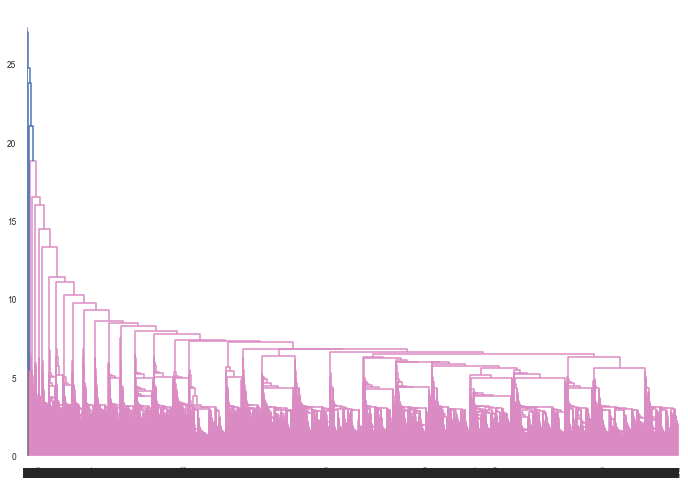

In [177]:
sl_mergings = linkage(X_scaled_df[:10000], method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

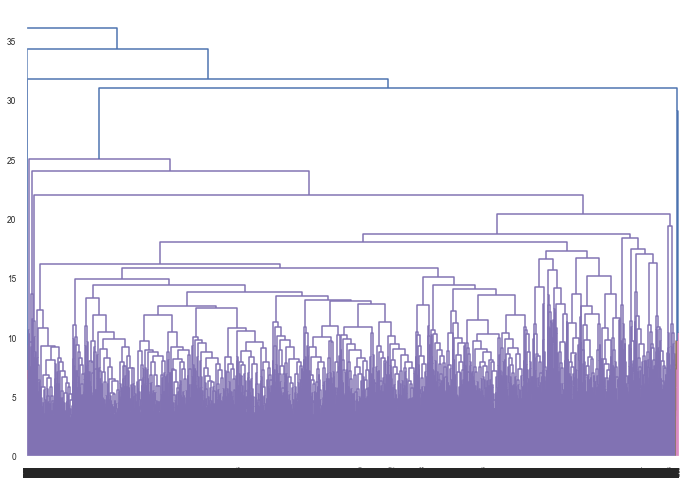

In [178]:
cl_mergings = linkage(X_scaled_df[:10000], method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [179]:
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=3).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [180]:
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=3).reshape(-1, )
cl_cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [181]:
df_hierarchical = X[:10000].copy()

In [182]:
df_hierarchical["Hierarchical_Cluster_labels"] = cl_cluster_labels

In [183]:
df_hierarchical.head()

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc    dti  \
0     5000.0  36.0          10.65       162.87        10.0     24000.0  27.65   
1     2500.0  60.0          15.27        59.83         1.0     30000.0   1.00   
2     2400.0  36.0          15.96        84.33        10.0     12252.0   8.72   
3    10000.0  36.0          13.49       339.31        10.0     49200.0  20.00   
4     3000.0  60.0          12.69        67.79         1.0     80000.0  17.94   

   delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
0          0.0           735.0            739.0             1.0       3.0   
1          0.0           740.0            744.0             5.0       3.0   
2          0.0           735.0            739.0             2.0       2.0   
3          0.0           690.0            694.0             1.0      10.0   
4          0.0           695.0            699.0             0.0      15.0   

   revol_bal  revol_util_in_%  pub_rec_bankruptcies  installment_to_inc  \
0    13648.0             83.7                   0.0            6.950000   
1     1687.0              9.4                   0.0            1.680000   
2     2956.0             98.5                   0.0            6.562194   
3     5598.0             21.0                   0.0            6.780488   
4    27783.0             53.9                   0.0            0.750000   

   grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        0        1        0        0        0        0        0   
1        0        0        1        0        0        0        0   
2        0        0        1        0        0        0        0   
3        0        0        1        0        0        0        0   
4        0        1        0        0        0        0        0   

   sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  \
0             0             1             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             1   

   sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  \
0             0             0             0             0             0   
1             0             0             0             1             0   
2             0             0             0             0             1   
3             1             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='loan_amnt'>

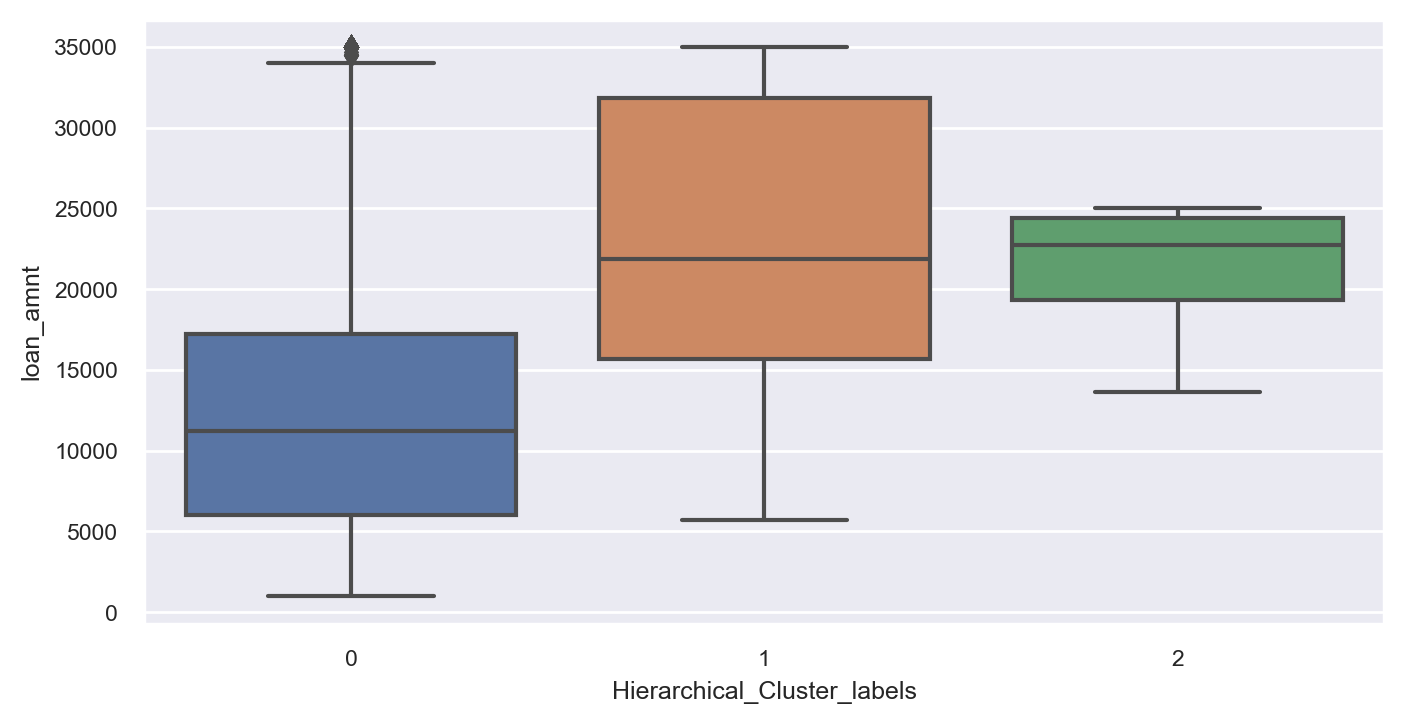

In [184]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='annual_inc'>

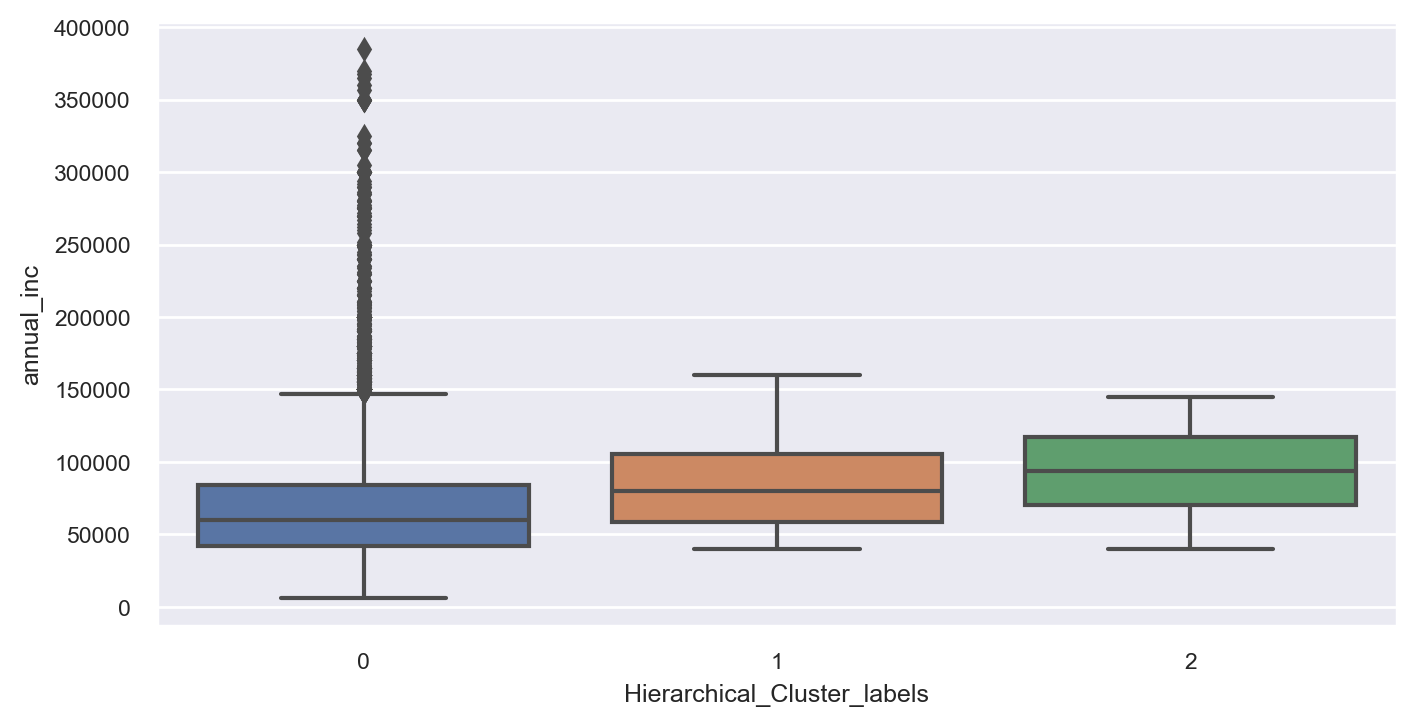

In [185]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='installment'>

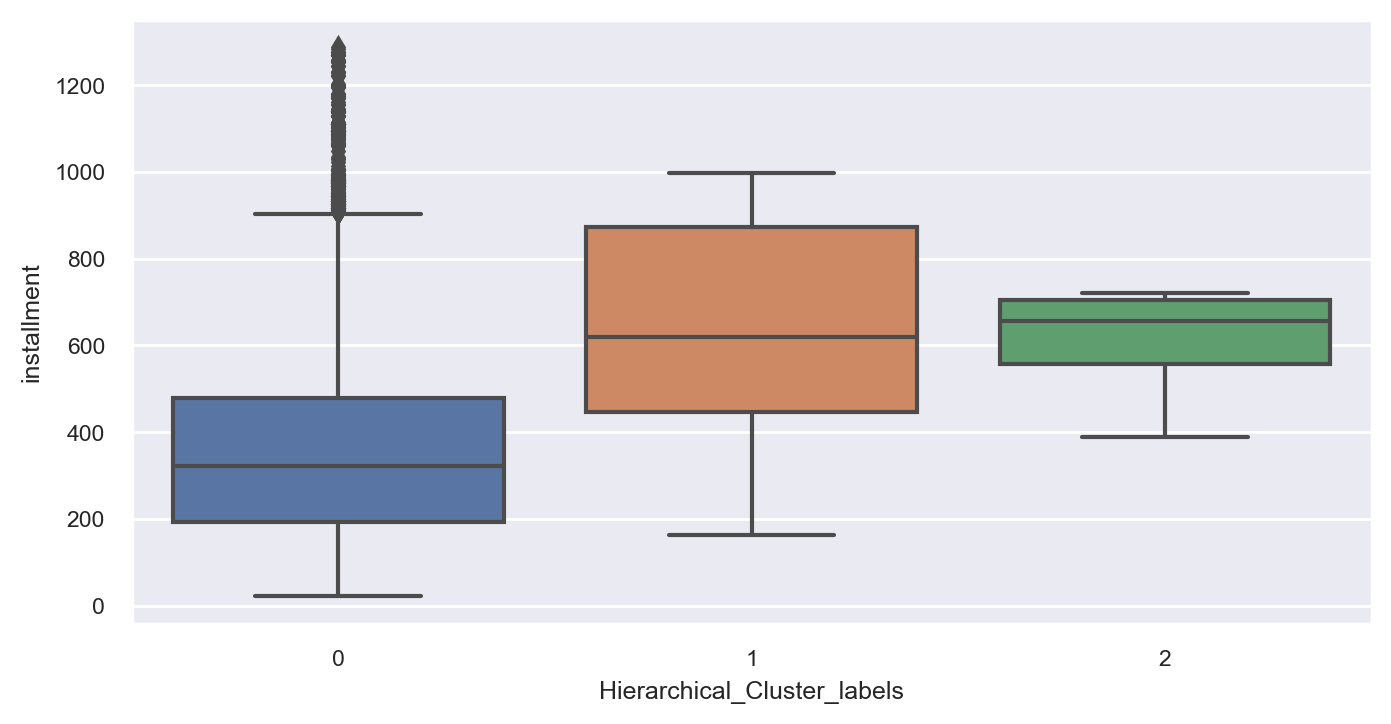

In [186]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='emp_length'>

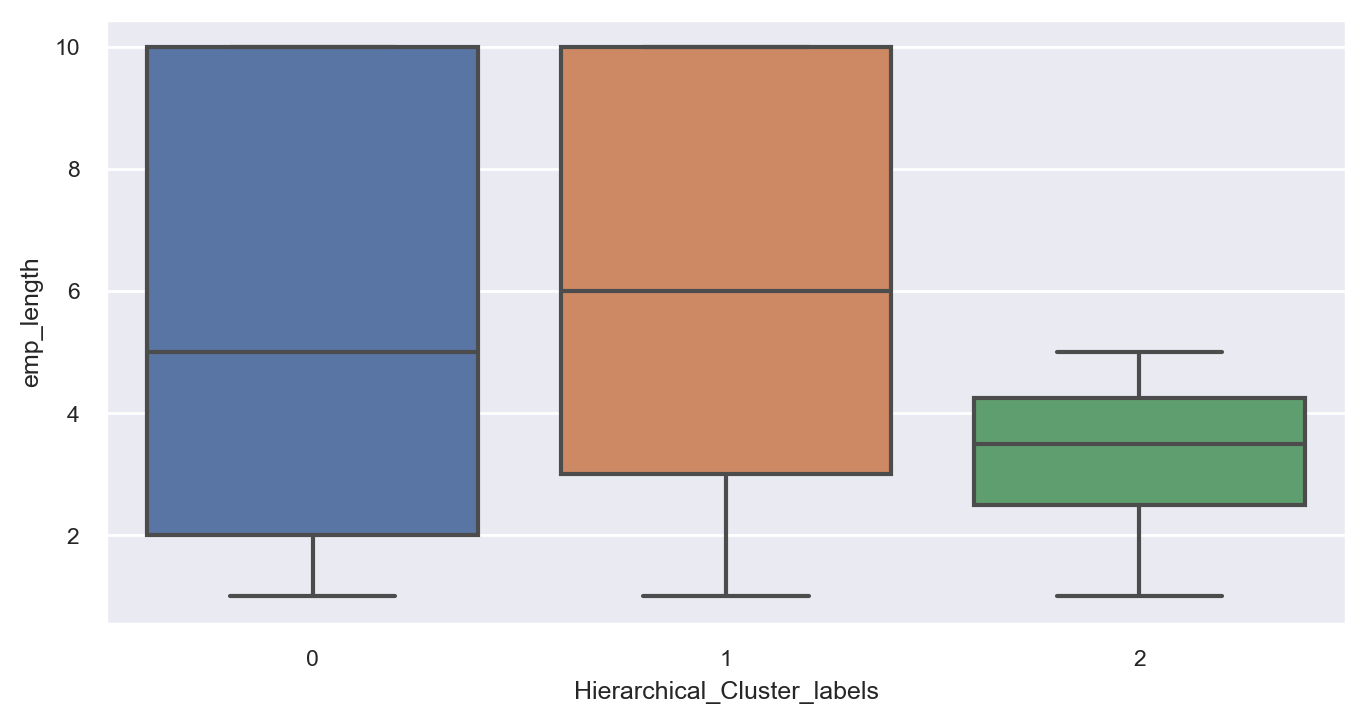

In [187]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='emp_length', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='installment_to_inc'>

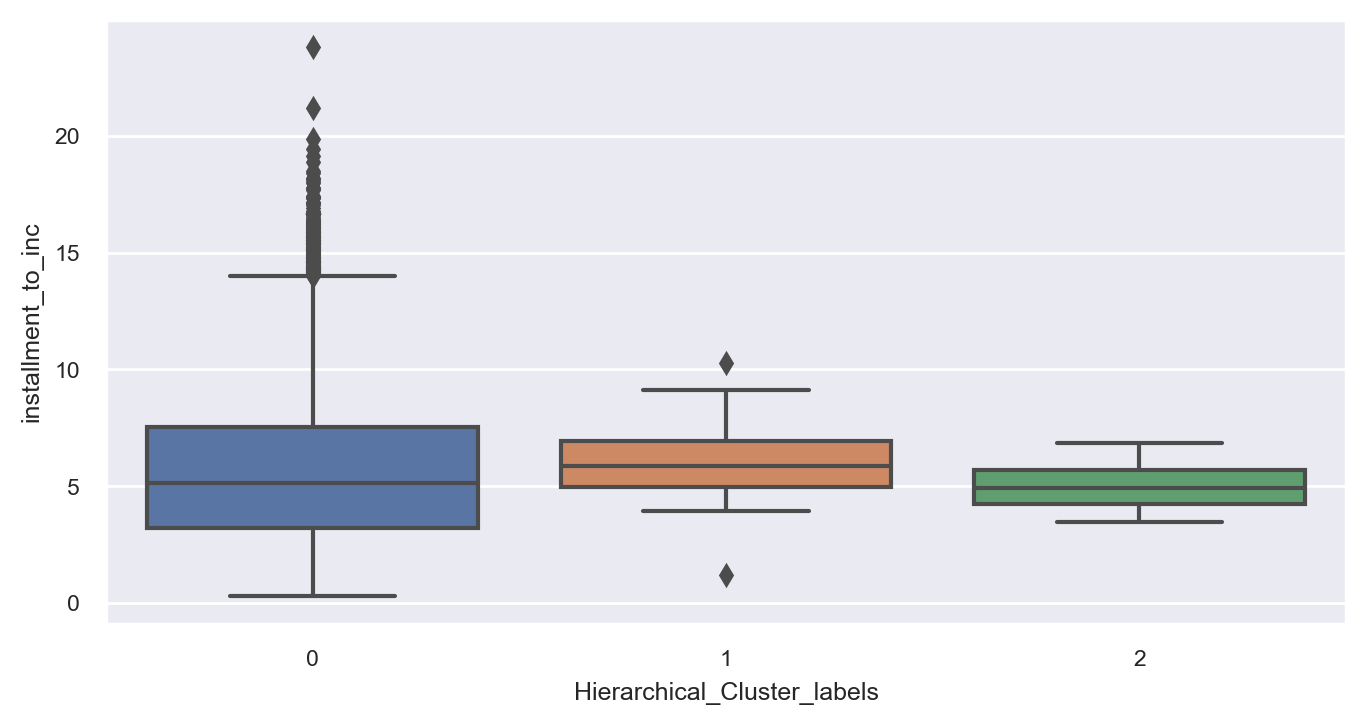

In [188]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment_to_inc', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='fico_range_low'>

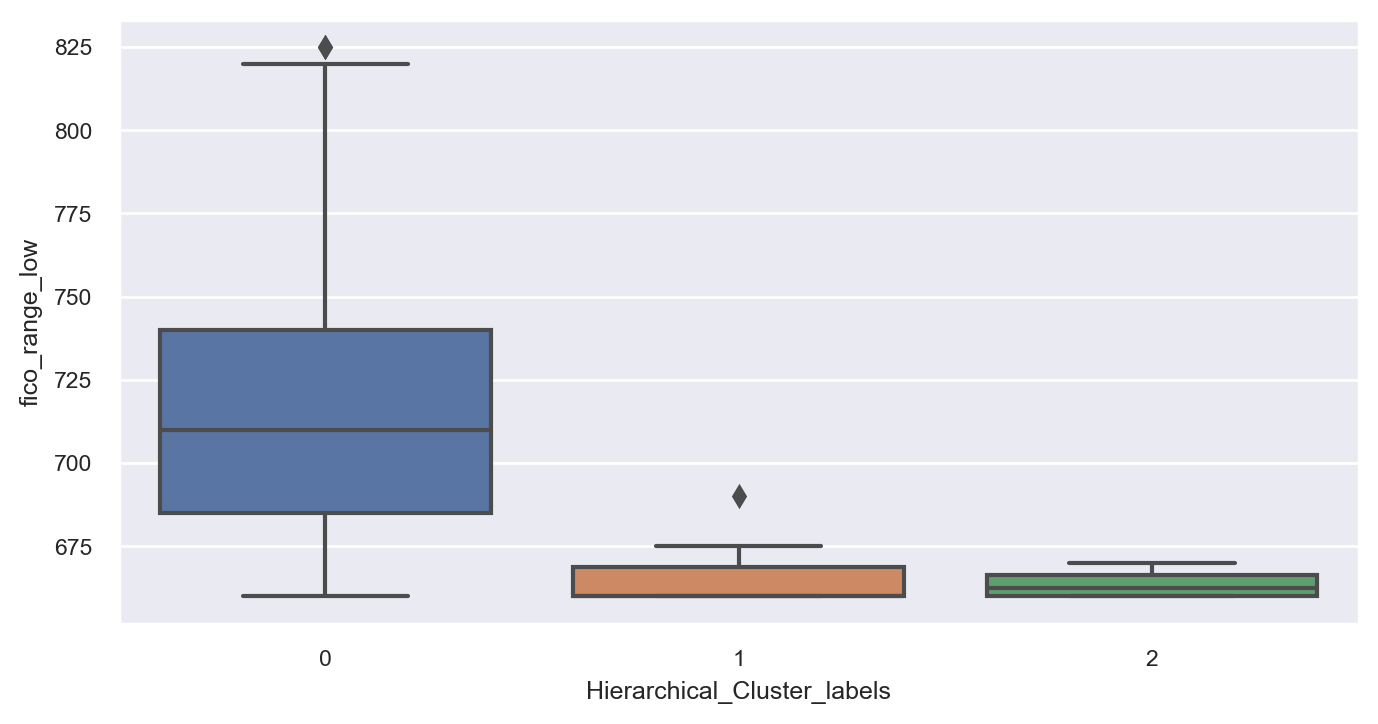

In [189]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico_range_low', data=df_hierarchical)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='fico_range_high'>

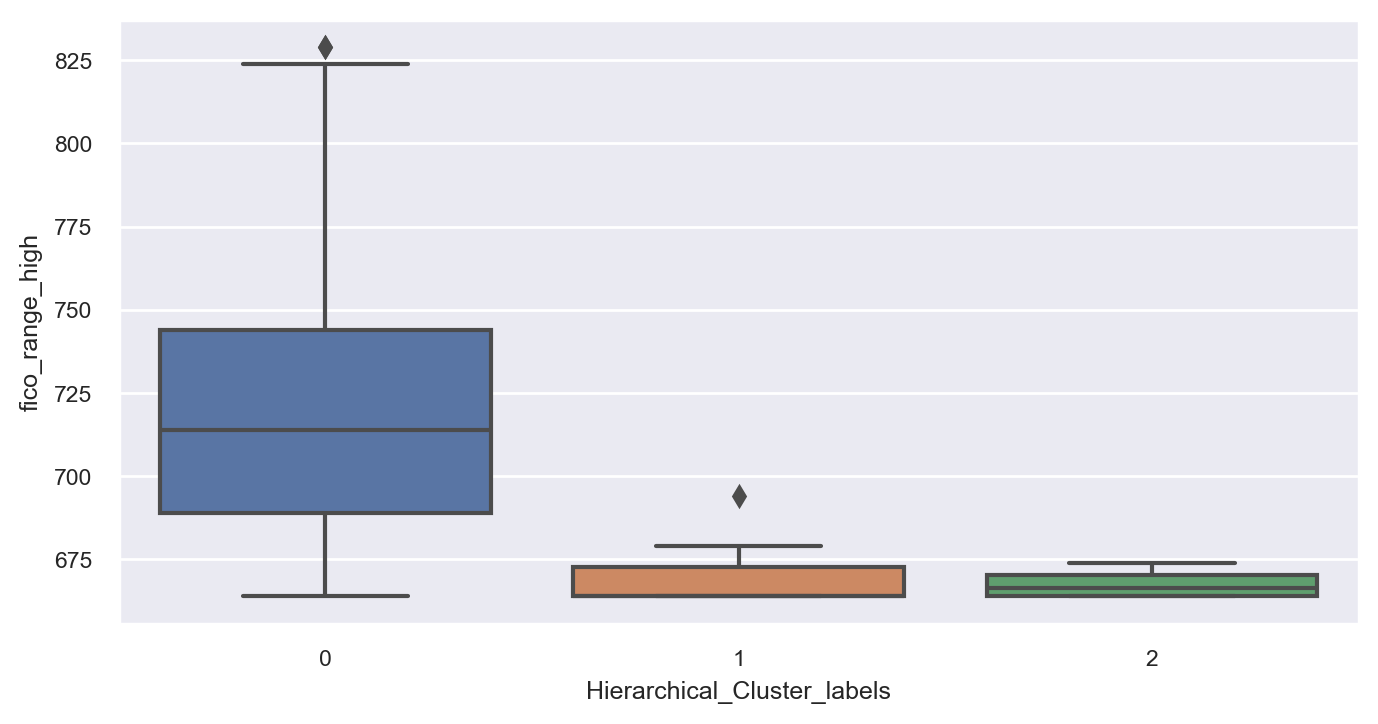

In [190]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico_range_high', data=df_hierarchical)

In [191]:
df_hierarchical

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
0         5000.0  36.0          10.65       162.87        10.0     24000.0   
1         2500.0  60.0          15.27        59.83         1.0     30000.0   
2         2400.0  36.0          15.96        84.33        10.0     12252.0   
3        10000.0  36.0          13.49       339.31        10.0     49200.0   
4         3000.0  60.0          12.69        67.79         1.0     80000.0   
...          ...   ...            ...          ...         ...         ...   
10104    10800.0  36.0           6.99       333.43         6.0     72000.0   
10105     3000.0  36.0          13.99       102.52         4.0     90000.0   
10106    16000.0  36.0          17.99       578.36        10.0     64000.0   
10107     6000.0  36.0          11.99       199.26         2.0     35000.0   
10108     7000.0  36.0           9.99       225.84         8.0     52000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0      27.65          0.0           735.0            739.0             1.0   
1       1.00          0.0           740.0            744.0             5.0   
2       8.72          0.0           735.0            739.0             2.0   
3      20.00          0.0           690.0            694.0             1.0   
4      17.94          0.0           695.0            699.0             0.0   
...      ...          ...             ...              ...             ...   
10104   4.37          0.0           760.0            764.0             0.0   
10105   5.88          0.0           690.0            694.0             1.0   
10106  17.61          1.0           665.0            669.0             1.0   
10107  19.37          0.0           700.0            704.0             3.0   
10108  15.32          0.0           715.0            719.0             1.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
0           3.0    13648.0             83.7                   0.0   
1           3.0     1687.0              9.4                   0.0   
2           2.0     2956.0             98.5                   0.0   
3          10.0     5598.0             21.0                   0.0   
4          15.0    27783.0             53.9                   0.0   
...         ...        ...              ...                   ...   
10104      11.0     5365.0             11.8                   0.0   
10105       8.0     5256.0             30.2                   0.0   
10106      13.0    26676.0             91.5                   0.0   
10107       4.0     3712.0             28.8                   0.0   
10108      10.0     8133.0             66.7                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
0                6.950000        0        1        0        0        0   
1                1.680000        0        0        1        0        0   
2                6.562194        0        0        1        0        0   
3                6.780488        0        0        1        0        0   
4                0.750000        0        1        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
10104            5.000000        1        0        0        0        0   
10105            1.106667        0        0        1        0        0   
10106            8.325000        0        0        0        0        1   
10107            5.725714        0        1        0        0        0   
10108            4.476923        0        1        0        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0            0        0             0             0             0   
1            0        0             0             0             0   
2            0        0             0             0             0   
3            0        0             0             0             0   
4            0        0             0             0             0   
.

In [192]:
X

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
0         5000.0  36.0          10.65       162.87        10.0     24000.0   
1         2500.0  60.0          15.27        59.83         1.0     30000.0   
2         2400.0  36.0          15.96        84.33        10.0     12252.0   
3        10000.0  36.0          13.49       339.31        10.0     49200.0   
4         3000.0  60.0          12.69        67.79         1.0     80000.0   
...          ...   ...            ...          ...         ...         ...   
42507     2000.0  36.0          12.80        67.20         1.0     10000.0   
42509     5350.0  36.0          13.12       180.57         1.0      4000.0   
42511    10000.0  36.0          14.70       345.18         1.0     50000.0   
42513     6000.0  36.0          10.59       195.28         1.0     20000.0   
42514     4400.0  36.0           9.64       141.25         2.0     30000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0      27.65          0.0           735.0            739.0             1.0   
1       1.00          0.0           740.0            744.0             5.0   
2       8.72          0.0           735.0            739.0             2.0   
3      20.00          0.0           690.0            694.0             1.0   
4      17.94          0.0           695.0            699.0             0.0   
...      ...          ...             ...              ...             ...   
42507   3.48          1.0           645.0            649.0             0.0   
42509  15.00          0.0           660.0            664.0             1.0   
42511   7.22          2.0           650.0            654.0             0.0   
42513  12.90          0.0           695.0            699.0             4.0   
42514   3.72          0.0           695.0            699.0             0.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
0           3.0    13648.0             83.7                   0.0   
1           3.0     1687.0              9.4                   0.0   
2           2.0     2956.0             98.5                   0.0   
3          10.0     5598.0             21.0                   0.0   
4          15.0    27783.0             53.9                   0.0   
...         ...        ...              ...                   ...   
42507       2.0      571.0             61.9                   0.0   
42509       1.0        0.0             49.7                   0.0   
42511      14.0    10025.0             85.0                   0.0   
42513       5.0    13660.0             66.0                   0.0   
42514       4.0     3493.0             63.5                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
0                6.950000        0        1        0        0        0   
1                1.680000        0        0        1        0        0   
2                6.562194        0        0        1        0        0   
3                6.780488        0        0        1        0        0   
4                0.750000        0        1        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
42507            6.720000        0        0        0        1        0   
42509           44.700000        0        0        0        1        0   
42511            6.672000        0        0        0        0        1   
42513           10.020000        0        0        1        0        0   
42514            4.880000        0        1        0        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0            0        0             0             0             0   
1            0        0             0             0             0   
2            0        0             0             0             0   
3            0        0             0             0             0   
4            0        0             0             0             0   
.

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='fico_range_high'>

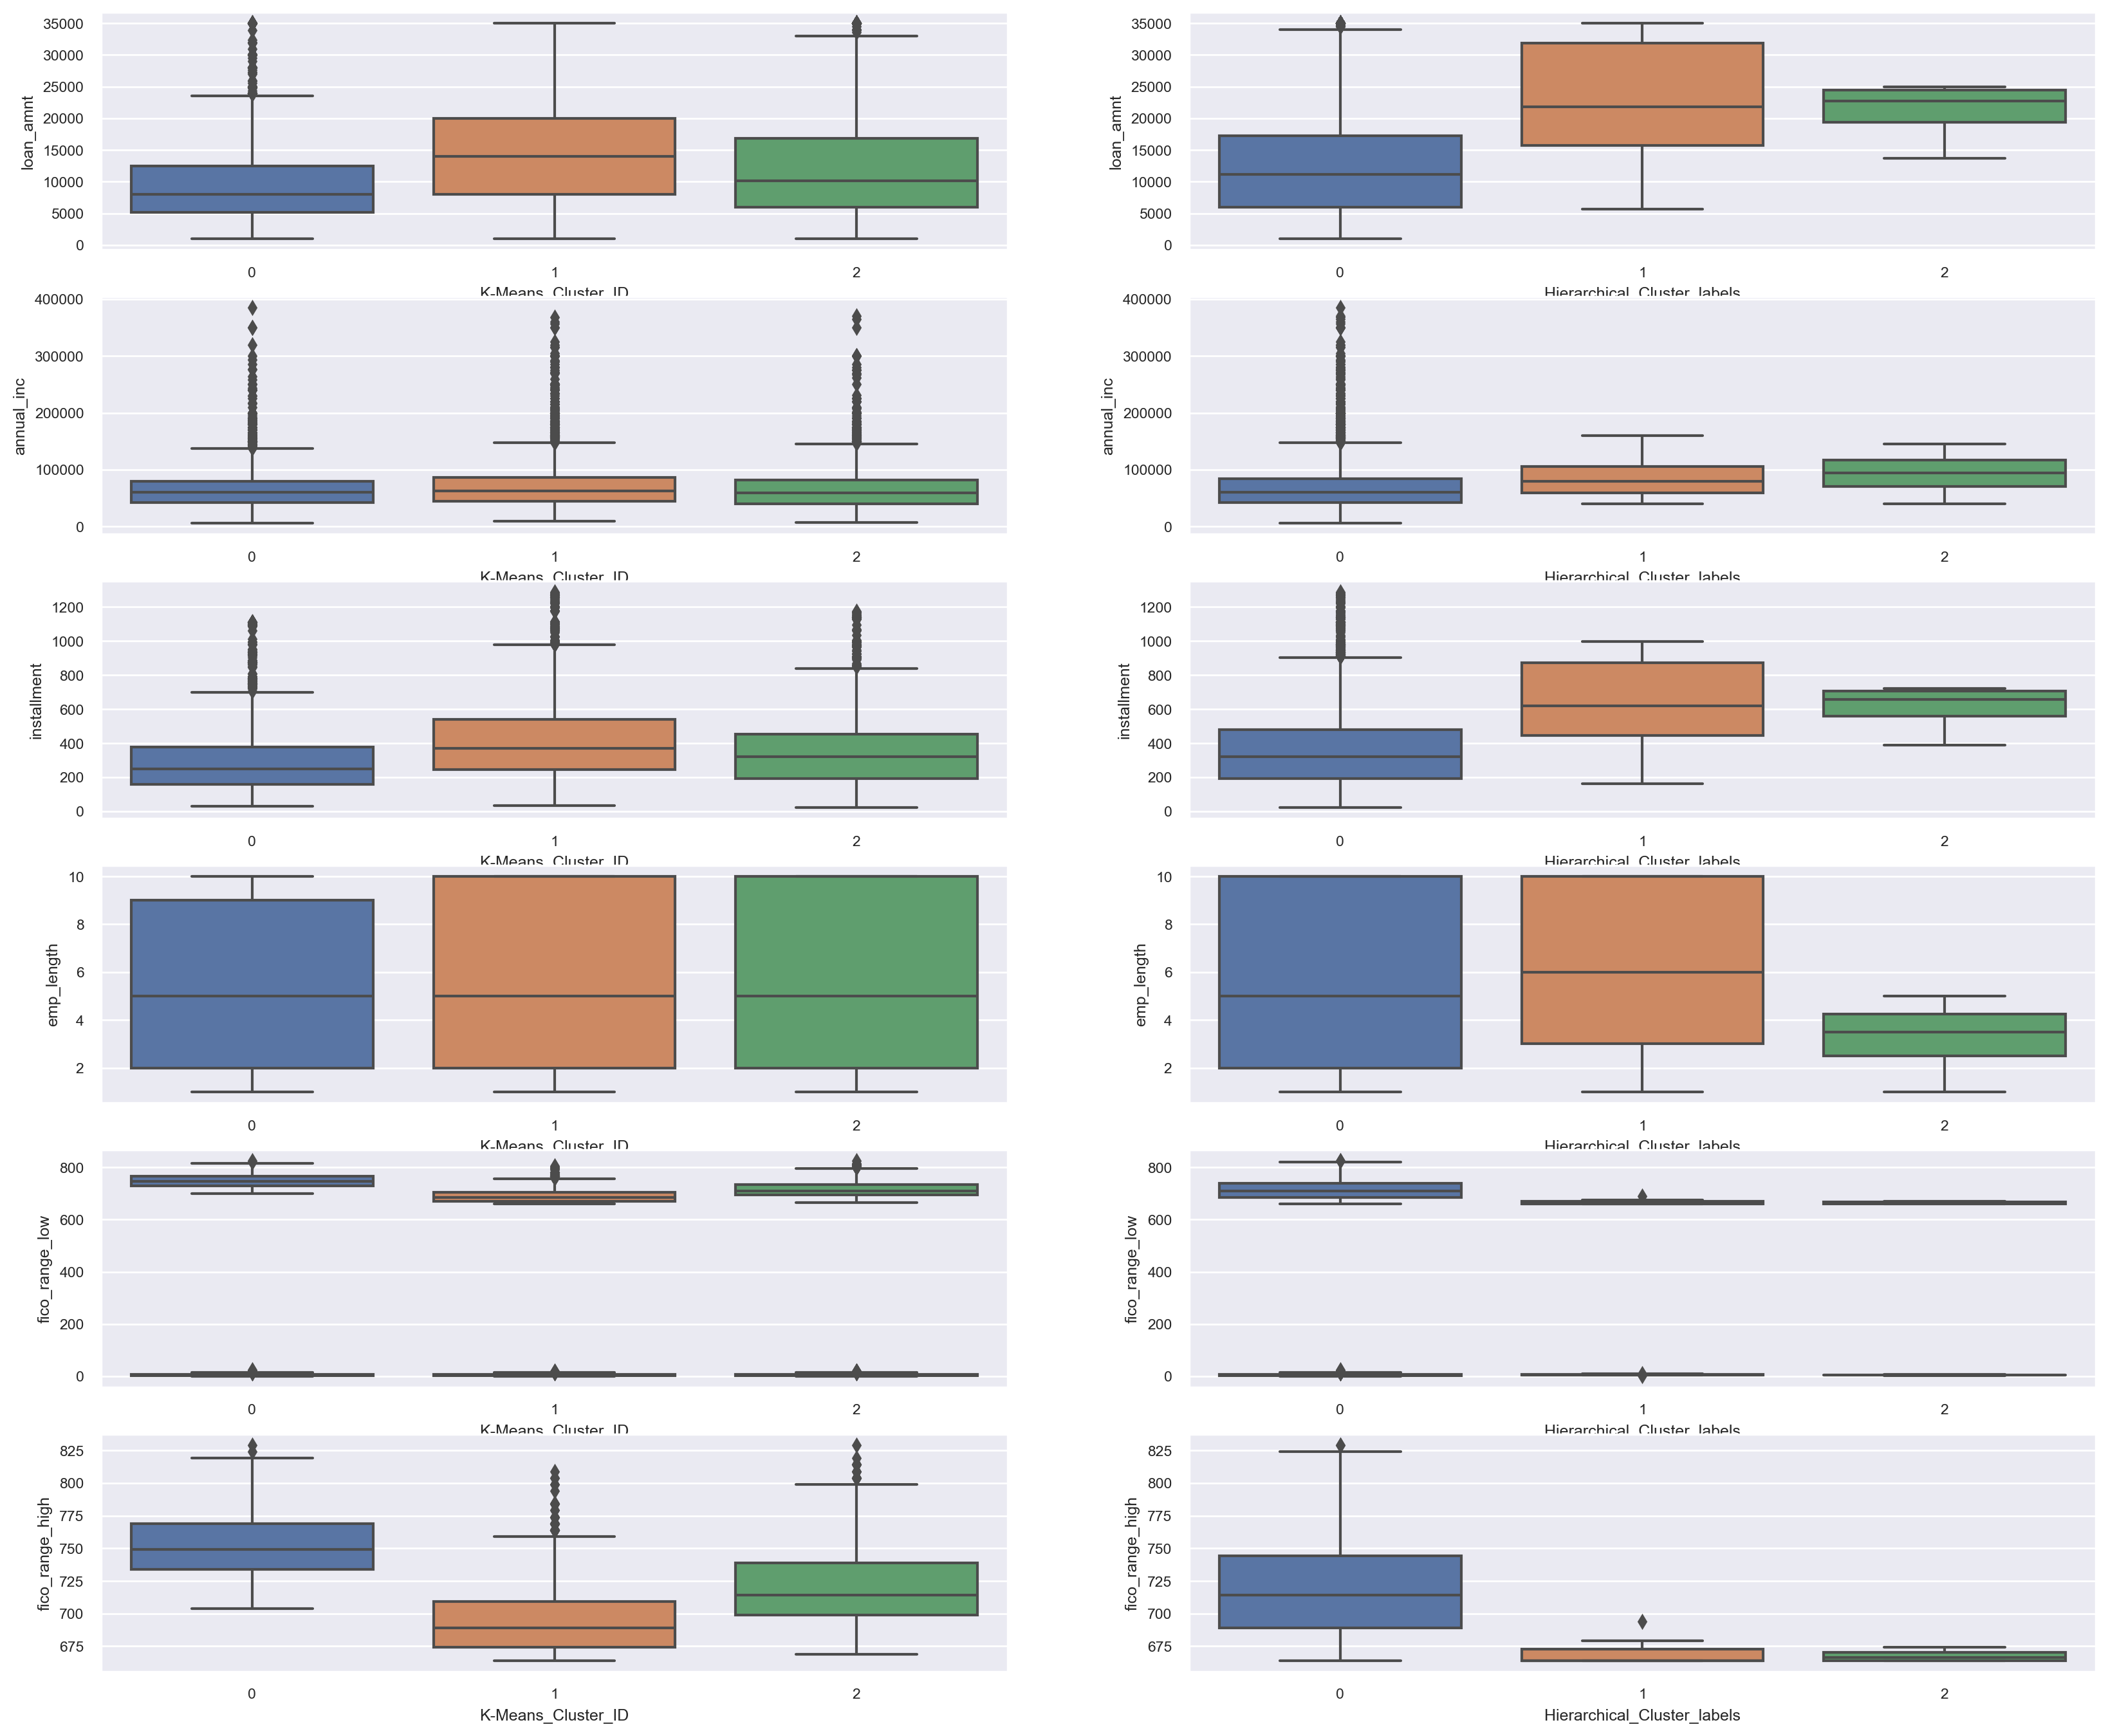

In [193]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(7,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df_hierarchical)

plt.subplot(7,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=df_hierarchical)

plt.subplot(7,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=df_hierarchical)

plt.subplot(7,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=df_hierarchical)

plt.subplot(7,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='installment', data=df_hierarchical)

plt.subplot(7,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment', data=df_hierarchical)

plt.subplot(7,2,7)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=df_hierarchical)

plt.subplot(7,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='emp_length', data=df_hierarchical)

plt.subplot(7,2,9)
sns.boxplot(x='K-Means_Cluster_ID', y='installment_to_inc', data=df_hierarchical)

plt.subplot(7,2,10)
sns.boxplot(x='Hierarchical_Cluster_labels', y='installment_to_inc', data=df_hierarchical)

plt.subplot(7,2,9)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_low', data=df_hierarchical)

plt.subplot(7,2,10)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico_range_low', data=df_hierarchical)

plt.subplot(7,2,11)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_high', data=df_hierarchical)

plt.subplot(7,2,12)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico_range_high', data=df_hierarchical)

Na przykładzie fico-range-high widizmy,że klastry pożyczkobiorców są zróżnicowane. 

Według metody K-Means mediana w klastrze 0  wynosi 750, dla klastra 1 jest to wartość około 685, a dla klastra 2 wartość około 715. W klastrze 1 i 2 znajduje się najwięcej outlierów. Wielkość klastrów jest w miarę porównywalna, klaster 2 jest minimalnie większy od klastra 1. Klaster 0 i 1 są zbliżonej wielkości.

Według metody klasyfikacji hierarchicznej mediana dla klastra 0 wynosi 715 (czyli tyle ile dla klastra 2 w metodzie K-means). d;a l;astra 1 i 2 jest ona trudna do zidentyfikowana ale wynosi pomoniżej 675.

In [194]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                   'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16','PC17','PC18','PC19',
                                                   'PC20','PC21','PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27']) 

In [195]:
X_pca_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.463884 -0.500645  2.764381  0.083529  0.188763  0.565132 -0.220863   
1 -0.196093 -2.591877 -1.098977  1.999292  0.826641  0.718035  0.117960   
2  0.284141 -2.915238 -0.666665  2.188350  0.198733  0.905354 -0.264015   
3  0.782070 -1.266405 -0.643620  2.326075  0.205800  1.356719 -0.575876   
4  0.459410 -1.160128  2.079010 -0.091288  0.128053 -1.469519  0.756538   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.060825 -0.770547  0.844816  0.480134  1.852424  0.188752 -1.076945   
1 -0.274327  3.904449 -1.172839 -0.428853  0.366973 -2.973296  0.456712   
2 -0.077255 -0.235593 -0.824164  0.075837  0.523868  0.970587  0.132098   
3 -0.319449  1.407169  1.192784  0.790880 -0.180932  1.721812 -1.438390   
4  0.016463  1.644536  2.817856  0.412989  0.969128 -1.064184  1.410707   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.014709 -1.424338 -1.752551  2.882974 -0.155295 -2.132332 -0.116040   
1  0.780272 -0.259421 -1.104104 -0.718680  1.090802 -1.268983  0.187334   
2 -0.429949 -0.139375 -1.006503 -0.260249 -1.968100  0.483911  0.888693   
3 -1.542392  0.213052  1.397439 -0.216502  2.035702 -0.728387 -0.404817   
4 -1.690063 -0.427731  1.705997  0.482195 -0.081034  1.193520  0.437887   

       PC22      PC23      PC24      PC25      PC26      PC27  
0  0.383821 -1.109501  0.420078  0.433360 -1.039108  0.253404  
1 -0.679759  3.179226  2.533658 -0.800052 -0.774527  0.530553  
2  0.437766 -0.300383  0.483587  0.016247 -1.755116 -0.511828  
3 -0.005450 -0.186085 -0.051547  0.154579 -0.132918  0.045842  
4 -0.313205  0.879601  0.097173  0.008396  0.754692 -0.275211

In [196]:
X_pca_final_df_hierarchical= X_pca_final_df[:10000].copy()

In [197]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df_hierarchical['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [198]:
X_pca_final_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.463884 -0.500645  2.764381  0.083529  0.188763  0.565132 -0.220863   
1 -0.196093 -2.591877 -1.098977  1.999292  0.826641  0.718035  0.117960   
2  0.284141 -2.915238 -0.666665  2.188350  0.198733  0.905354 -0.264015   
3  0.782070 -1.266405 -0.643620  2.326075  0.205800  1.356719 -0.575876   
4  0.459410 -1.160128  2.079010 -0.091288  0.128053 -1.469519  0.756538   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.060825 -0.770547  0.844816  0.480134  1.852424  0.188752 -1.076945   
1 -0.274327  3.904449 -1.172839 -0.428853  0.366973 -2.973296  0.456712   
2 -0.077255 -0.235593 -0.824164  0.075837  0.523868  0.970587  0.132098   
3 -0.319449  1.407169  1.192784  0.790880 -0.180932  1.721812 -1.438390   
4  0.016463  1.644536  2.817856  0.412989  0.969128 -1.064184  1.410707   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.014709 -1.424338 -1.752551  2.882974 -0.155295 -2.132332 -0.116040   
1  0.780272 -0.259421 -1.104104 -0.718680  1.090802 -1.268983  0.187334   
2 -0.429949 -0.139375 -1.006503 -0.260249 -1.968100  0.483911  0.888693   
3 -1.542392  0.213052  1.397439 -0.216502  2.035702 -0.728387 -0.404817   
4 -1.690063 -0.427731  1.705997  0.482195 -0.081034  1.193520  0.437887   

       PC22      PC23      PC24      PC25      PC26      PC27  \
0  0.383821 -1.109501  0.420078  0.433360 -1.039108  0.253404   
1 -0.679759  3.179226  2.533658 -0.800052 -0.774527  0.530553   
2  0.437766 -0.300383  0.483587  0.016247 -1.755116 -0.511828   
3 -0.005450 -0.186085 -0.051547  0.154579 -0.132918  0.045842   
4 -0.313205  0.879601  0.097173  0.008396  0.754692 -0.275211   

   K_Means_Cluster_ID  
0                   2  
1                   1  
2                   1  
3                   1  
4                   2

In [199]:
X_pca_final_df_hierarchical.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.463884 -0.500645  2.764381  0.083529  0.188763  0.565132 -0.220863   
1 -0.196093 -2.591877 -1.098977  1.999292  0.826641  0.718035  0.117960   
2  0.284141 -2.915238 -0.666665  2.188350  0.198733  0.905354 -0.264015   
3  0.782070 -1.266405 -0.643620  2.326075  0.205800  1.356719 -0.575876   
4  0.459410 -1.160128  2.079010 -0.091288  0.128053 -1.469519  0.756538   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.060825 -0.770547  0.844816  0.480134  1.852424  0.188752 -1.076945   
1 -0.274327  3.904449 -1.172839 -0.428853  0.366973 -2.973296  0.456712   
2 -0.077255 -0.235593 -0.824164  0.075837  0.523868  0.970587  0.132098   
3 -0.319449  1.407169  1.192784  0.790880 -0.180932  1.721812 -1.438390   
4  0.016463  1.644536  2.817856  0.412989  0.969128 -1.064184  1.410707   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.014709 -1.424338 -1.752551  2.882974 -0.155295 -2.132332 -0.116040   
1  0.780272 -0.259421 -1.104104 -0.718680  1.090802 -1.268983  0.187334   
2 -0.429949 -0.139375 -1.006503 -0.260249 -1.968100  0.483911  0.888693   
3 -1.542392  0.213052  1.397439 -0.216502  2.035702 -0.728387 -0.404817   
4 -1.690063 -0.427731  1.705997  0.482195 -0.081034  1.193520  0.437887   

       PC22      PC23      PC24      PC25      PC26      PC27  \
0  0.383821 -1.109501  0.420078  0.433360 -1.039108  0.253404   
1 -0.679759  3.179226  2.533658 -0.800052 -0.774527  0.530553   
2  0.437766 -0.300383  0.483587  0.016247 -1.755116 -0.511828   
3 -0.005450 -0.186085 -0.051547  0.154579 -0.132918  0.045842   
4 -0.313205  0.879601  0.097173  0.008396  0.754692 -0.275211   

   Hierarchical_Cluster_Labels  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

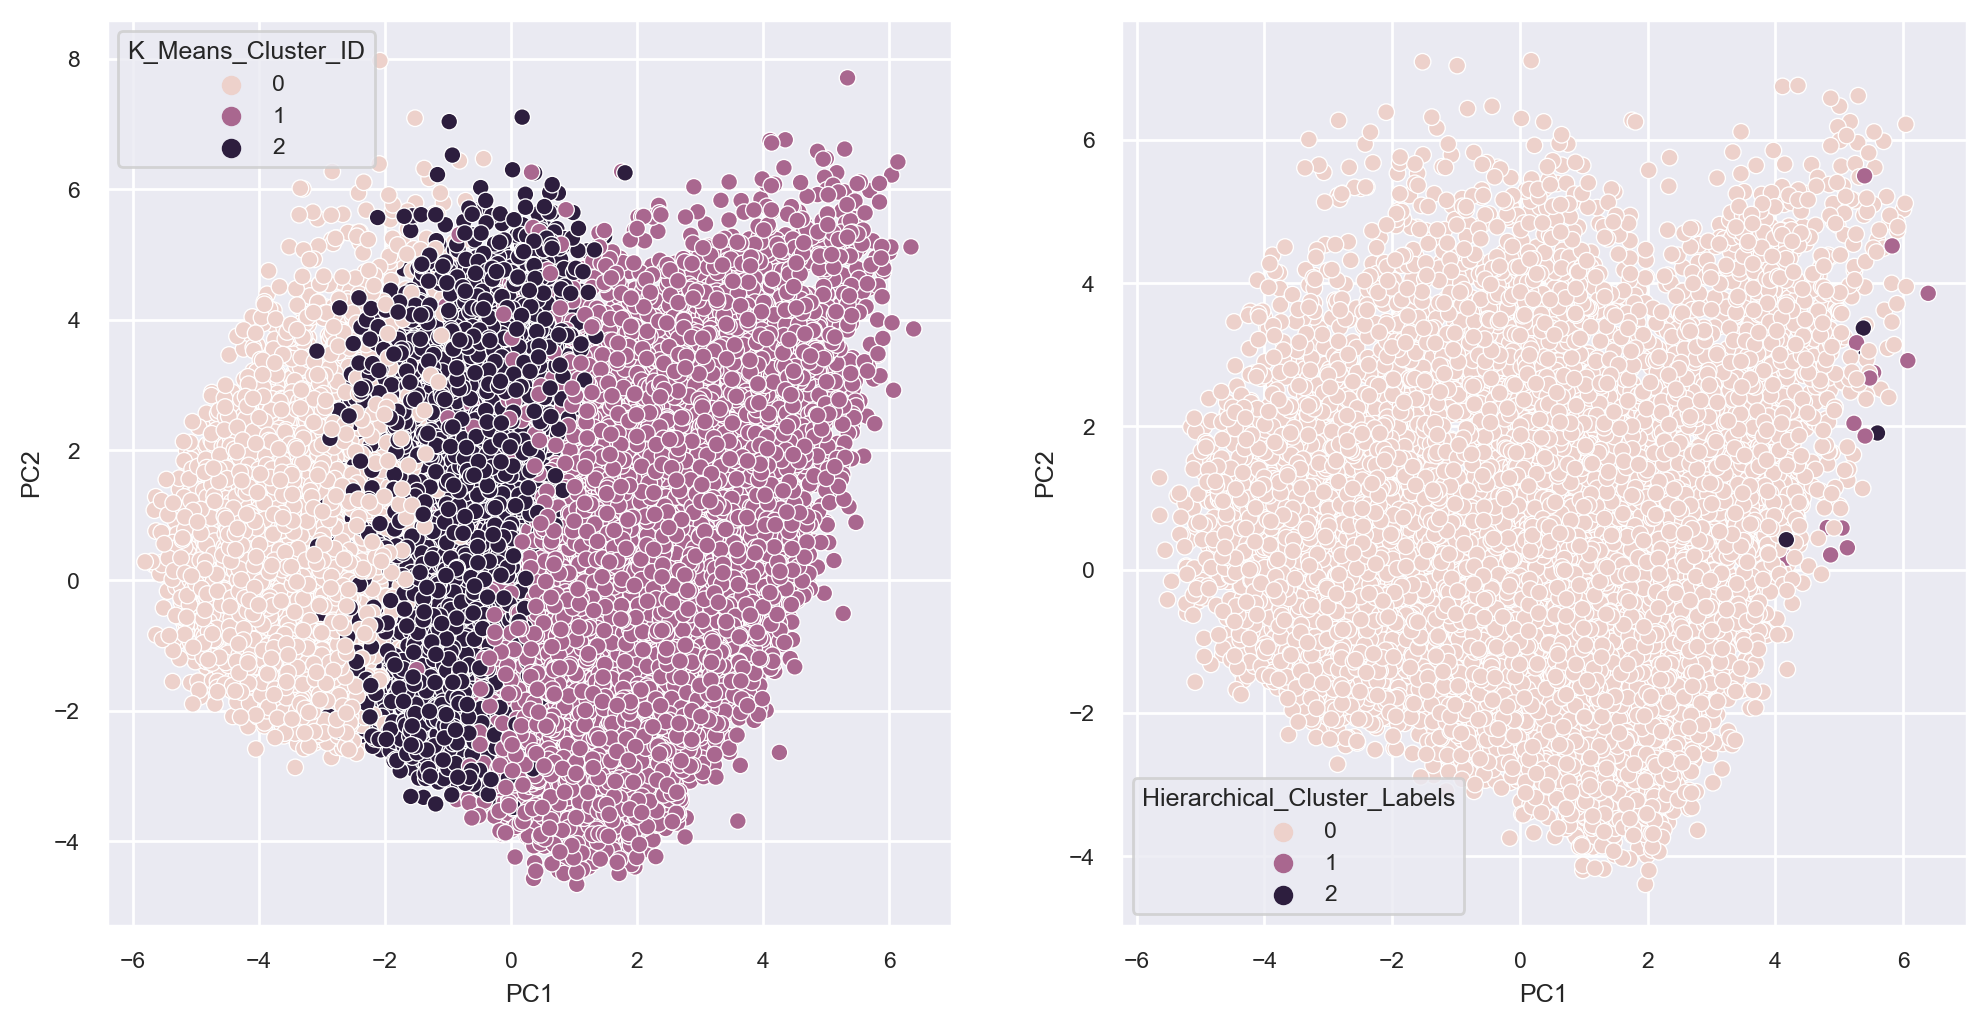

In [200]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df_hierarchical,hue='Hierarchical_Cluster_Labels')

ValueError: Could not interpret value `loan_amnt` for parameter `x`

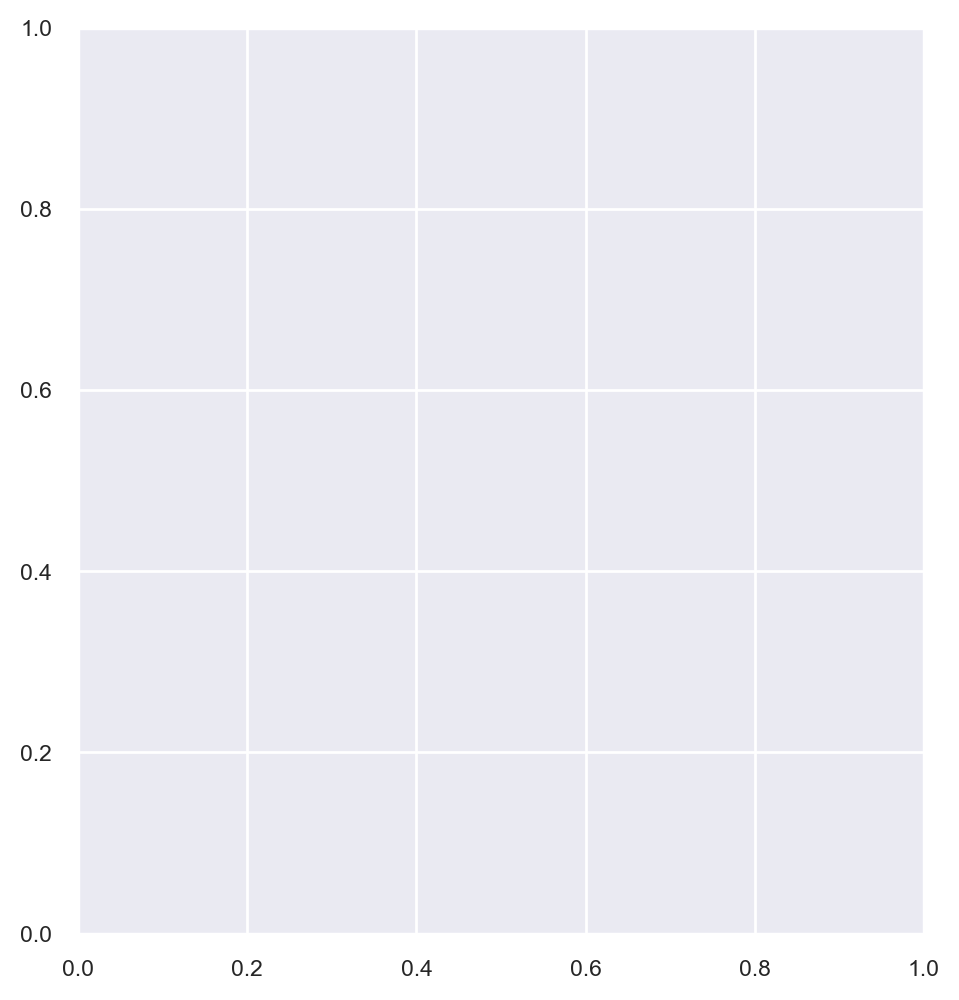

In [236]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='loan_amnt',y='annual_inc',data=df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt',y='annual_inc',data=df_hierarchical,hue='Hierarchical_Cluster_labels')

Obserwujemy zależność pomiędzy dochodem rocznym pożyczkbiorcy a wysokością kwoty kredytu. Im większy dochód roczny, tym więcej jest kredytów o wyższej kwocie.

ValueError: Could not interpret value `K-Means_Cluster_ID` for parameter `hue`

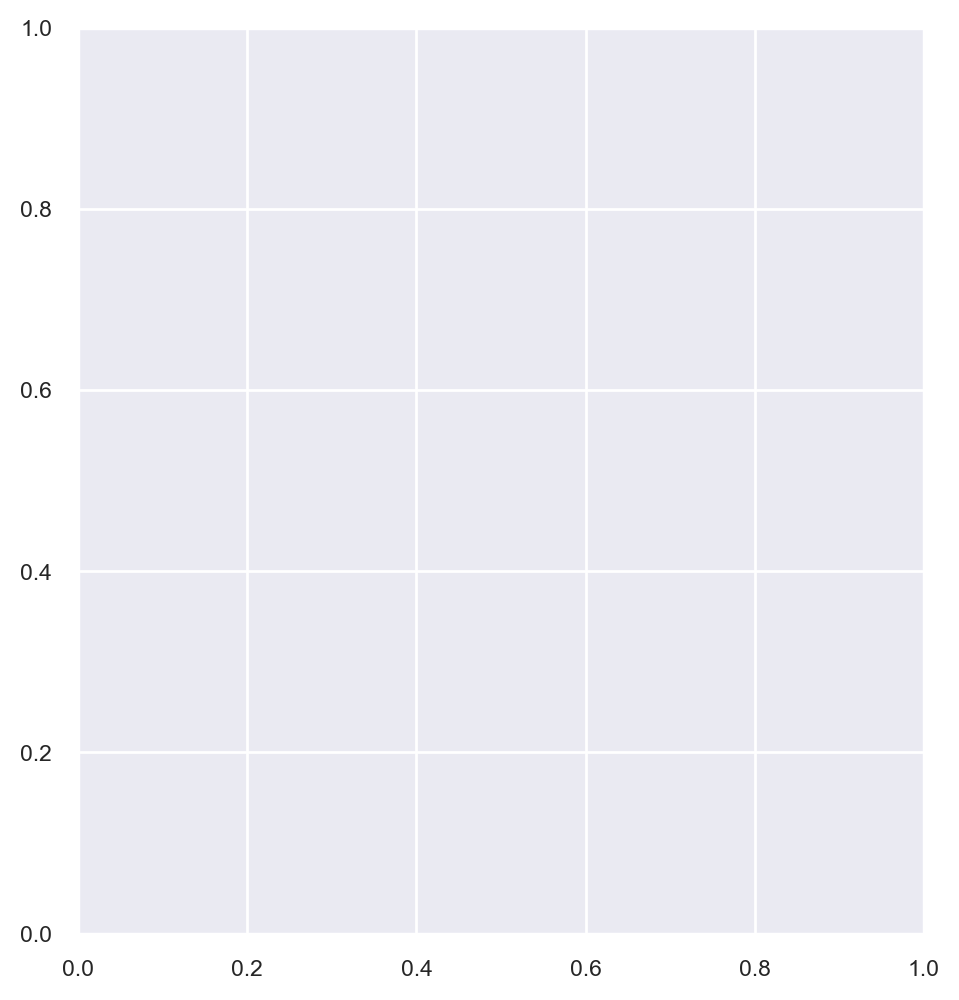

In [202]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='annual_inc',y='installment_to_inc',data=df,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='annual_inc',y='installment_to_inc',data=df_hierarchical,hue='Hierarchical_Cluster_labels')

<AxesSubplot:xlabel='loan_amnt', ylabel='installment_to_inc'>

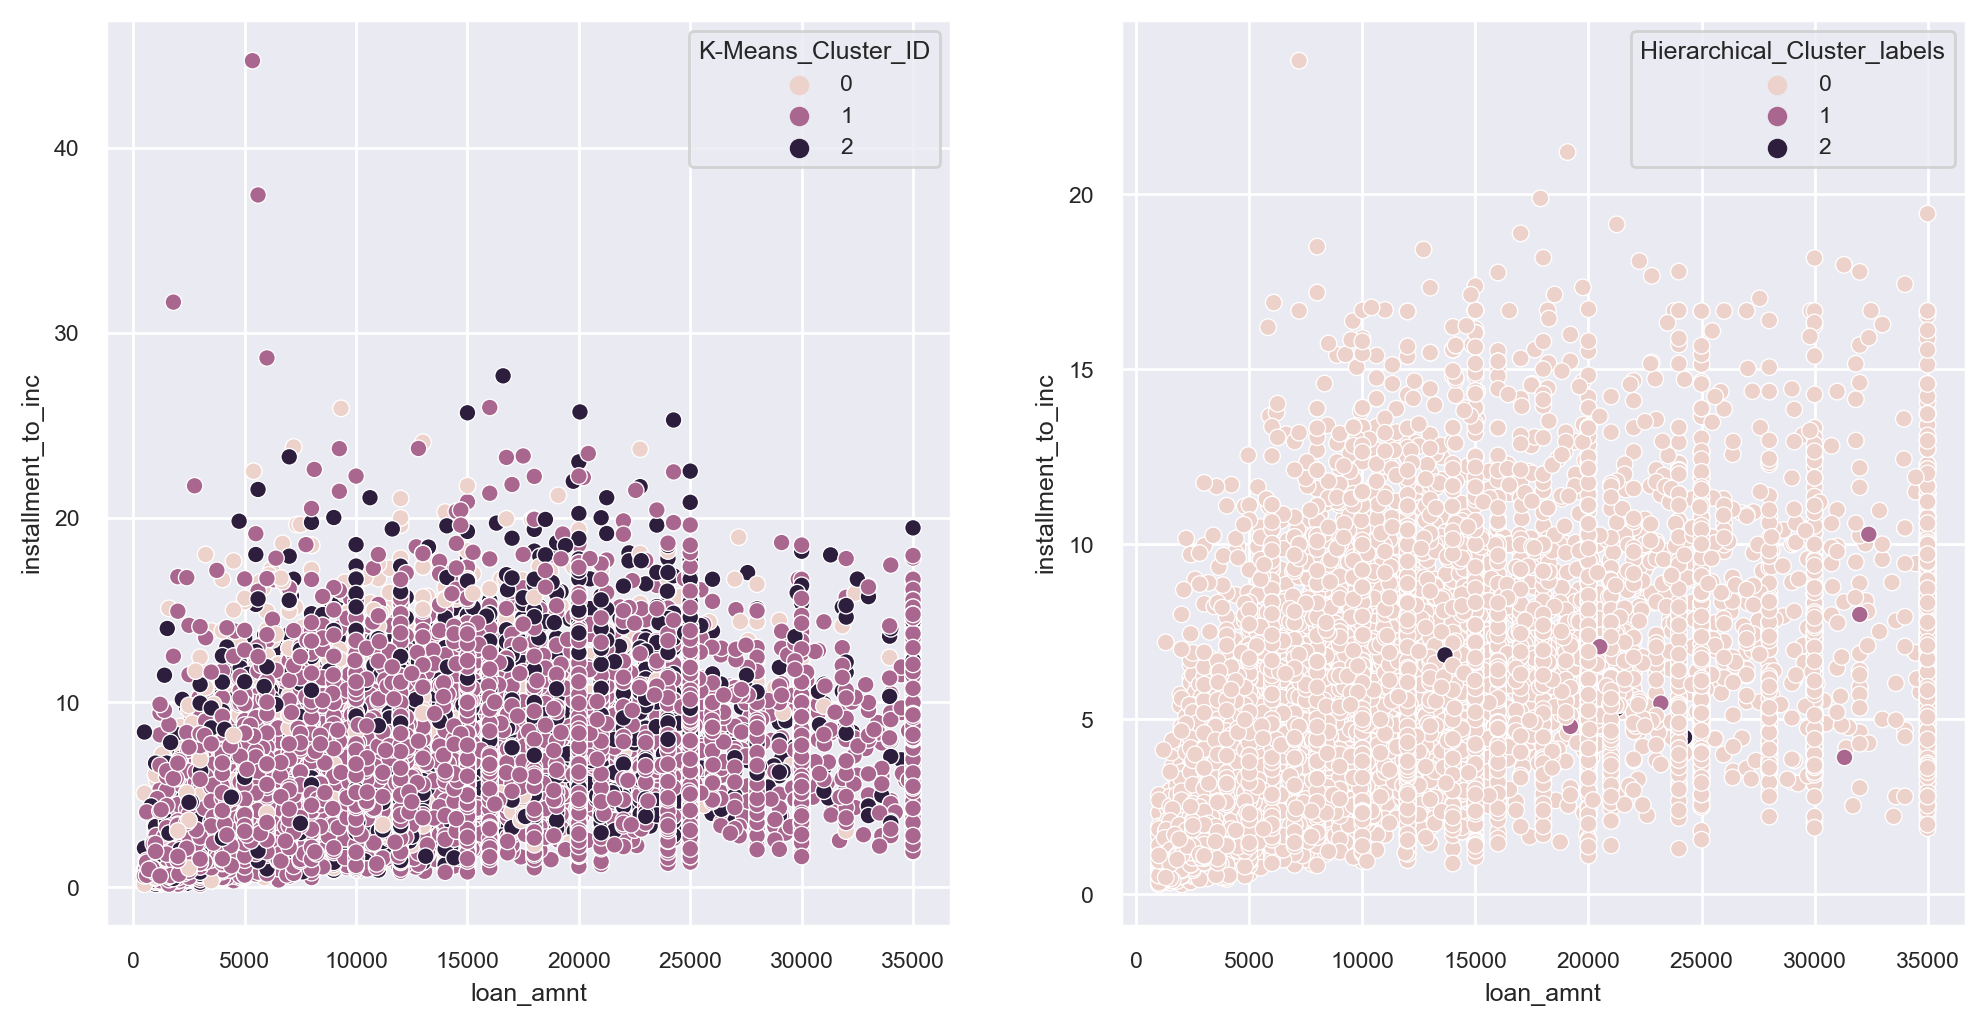

In [1306]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='loan_amnt',y='installment_to_inc',data=df,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt',y='installment_to_inc',data=df_hierarchical,hue='Hierarchical_Cluster_labels')

<AxesSubplot:xlabel='loan_amnt', ylabel='emp_length'>

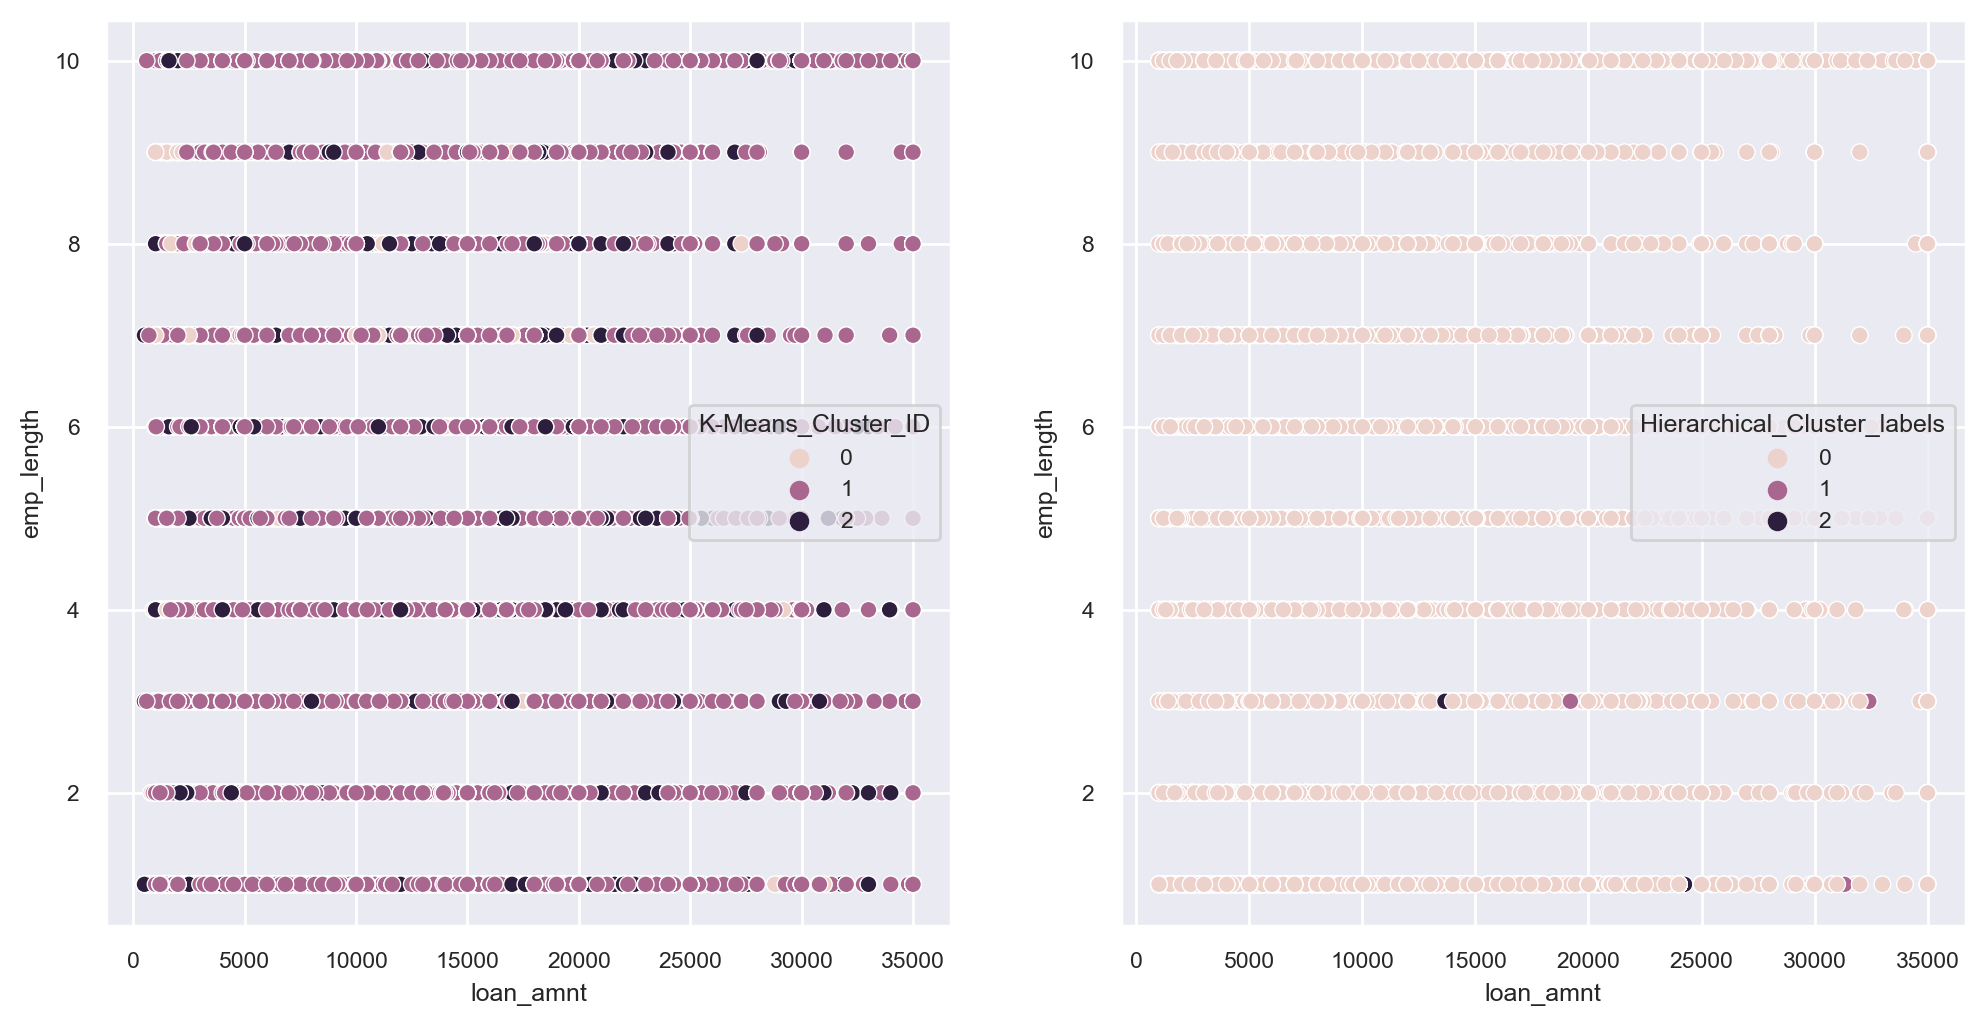

In [1307]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='loan_amnt',y='emp_length',data=df,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_amnt',y='emp_length',data=df_hierarchical,hue='Hierarchical_Cluster_labels')

<AxesSubplot:xlabel='annual_inc', ylabel='emp_length'>

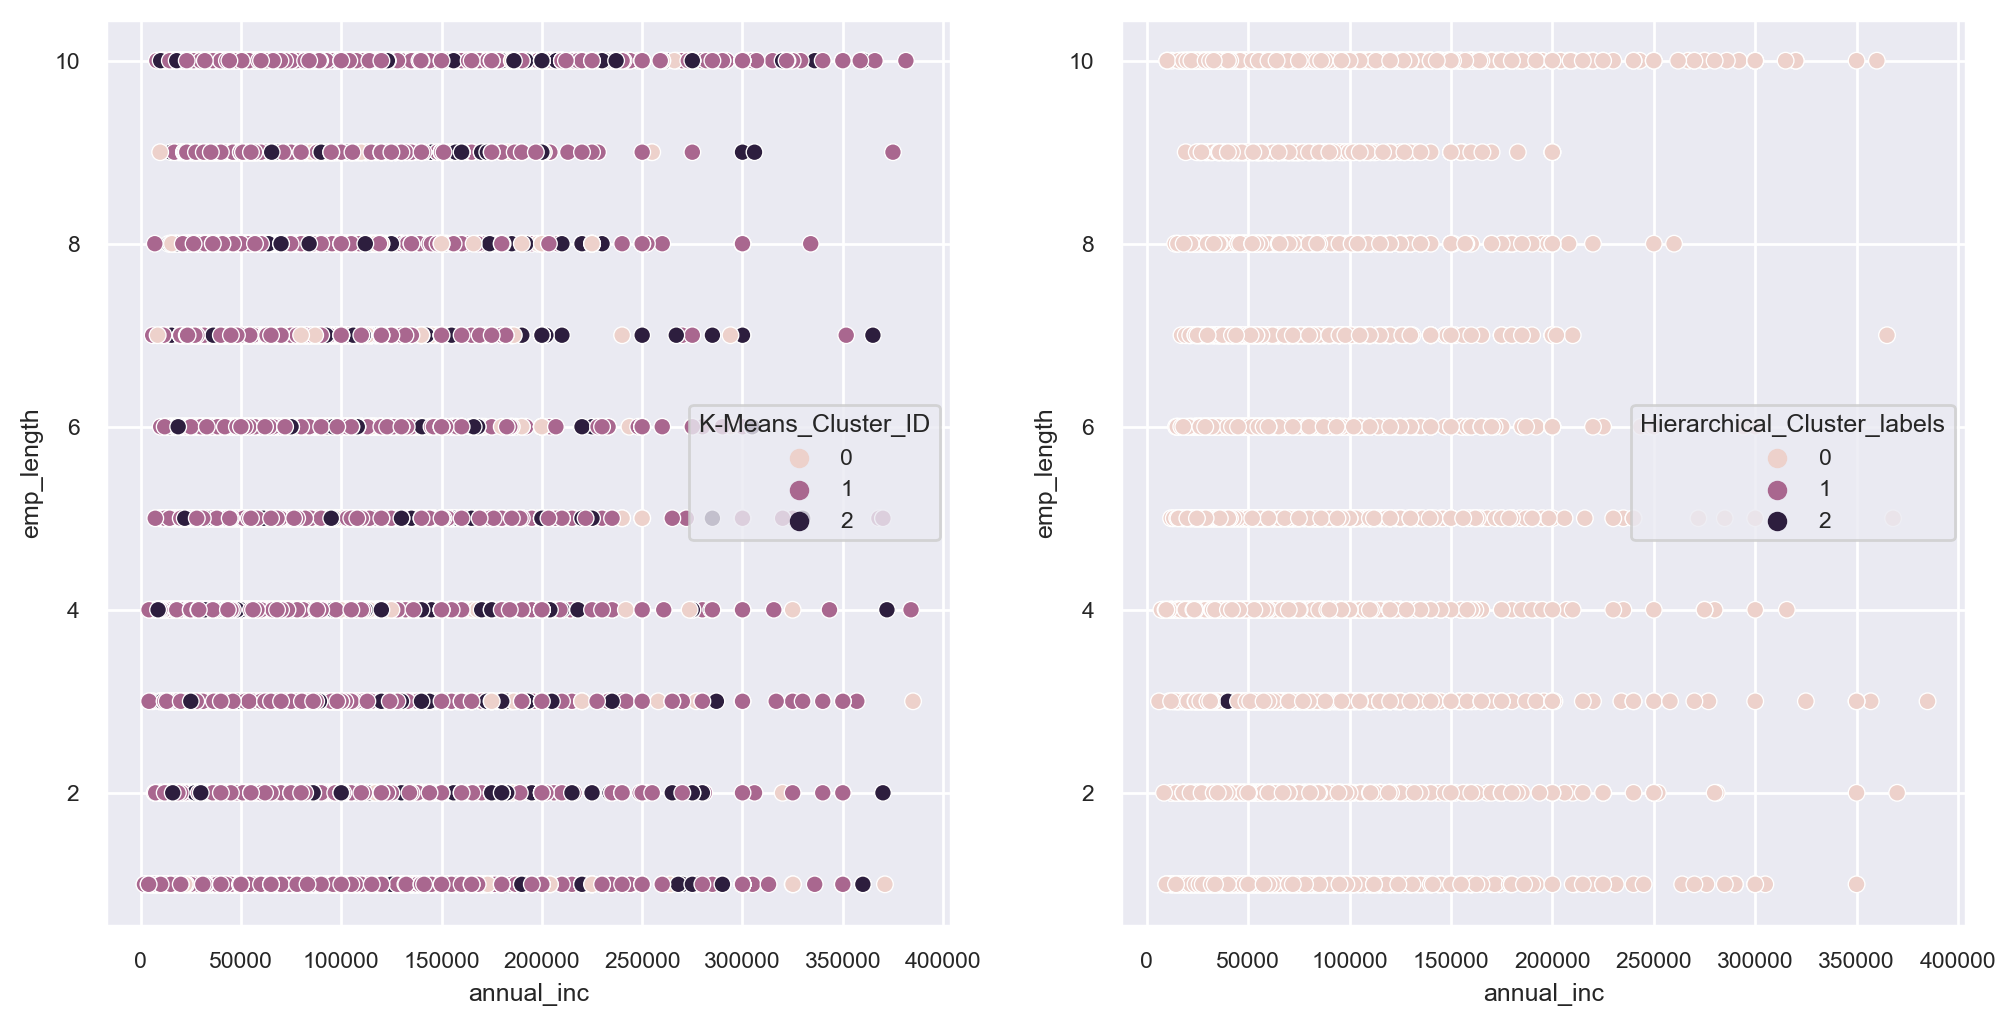

In [1308]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='annual_inc',y='emp_length',data=df,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='annual_inc',y='emp_length',data=df_hierarchical,hue='Hierarchical_Cluster_labels')

Po zastosowaniu Metody K-means oraz klasteryzacji hierarchicznej nie widać wyraźnych podziałów na klastry. Według metody K-means największa ilość pożyczkobiorców znajduje się w klastrze 1, a według metody klasteryzacji hierarchicznej w klastrze 0.

In [211]:
K_Means_credit = X[X['K-Means_Cluster_ID'] == 1]
K_Means_credit

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
1         2500.0  60.0          15.27        59.83         1.0     30000.0   
2         2400.0  36.0          15.96        84.33        10.0     12252.0   
3        10000.0  36.0          13.49       339.31        10.0     49200.0   
6         7000.0  60.0          15.96       170.08         8.0     47004.0   
7         3000.0  36.0          18.64       109.43         9.0     48000.0   
...          ...   ...            ...          ...         ...         ...   
42505    20000.0  36.0          15.01       693.45         2.0     80000.0   
42507     2000.0  36.0          12.80        67.20         1.0     10000.0   
42509     5350.0  36.0          13.12       180.57         1.0      4000.0   
42511    10000.0  36.0          14.70       345.18         1.0     50000.0   
42513     6000.0  36.0          10.59       195.28         1.0     20000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
1       1.00          0.0           740.0            744.0             5.0   
2       8.72          0.0           735.0            739.0             2.0   
3      20.00          0.0           690.0            694.0             1.0   
6      23.51          0.0           690.0            694.0             1.0   
7       5.35          0.0           660.0            664.0             2.0   
...      ...          ...             ...              ...             ...   
42505   3.11          1.0           670.0            674.0             6.0   
42507   3.48          1.0           645.0            649.0             0.0   
42509  15.00          0.0           660.0            664.0             1.0   
42511   7.22          2.0           650.0            654.0             0.0   
42513  12.90          0.0           695.0            699.0             4.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
1           3.0     1687.0              9.4                   0.0   
2           2.0     2956.0             98.5                   0.0   
3          10.0     5598.0             21.0                   0.0   
6           7.0    17726.0             85.6                   0.0   
7           4.0     8221.0             87.5                   0.0   
...         ...        ...              ...                   ...   
42505       5.0     7883.0             59.3                   0.0   
42507       2.0      571.0             61.9                   0.0   
42509       1.0        0.0             49.7                   0.0   
42511      14.0    10025.0             85.0                   0.0   
42513       5.0    13660.0             66.0                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
1                1.680000        0        0        1        0        0   
2                6.562194        0        0        1        0        0   
3                6.780488        0        0        1        0        0   
6                2.986980        0        0        1        0        0   
7                2.075000        0        0        0        0        1   
...                   ...      ...      ...      ...      ...      ...   
42505            8.340000        0        0        0        0        0   
42507            6.720000        0        0        0        1        0   
42509           44.700000        0        0        0        1        0   
42511            6.672000        0        0        0        0        1   
42513           10.020000        0        0        1        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
1            0        0             0             0             0   
2            0        0             0             0             0   
3            0        0             0             0             0   
6            0        0             0             0             0   
7            0        0             0             0             0   
.

In [213]:
Hirarchical_credit = df_hierarchical[df_hierarchical['Hierarchical_Cluster_labels'] == 0]
Hirarchical_credit

loan_amnt  term  int_rate_in_%  installment  emp_length  annual_inc  \
0         5000.0  36.0          10.65       162.87        10.0     24000.0   
1         2500.0  60.0          15.27        59.83         1.0     30000.0   
2         2400.0  36.0          15.96        84.33        10.0     12252.0   
3        10000.0  36.0          13.49       339.31        10.0     49200.0   
4         3000.0  60.0          12.69        67.79         1.0     80000.0   
...          ...   ...            ...          ...         ...         ...   
10104    10800.0  36.0           6.99       333.43         6.0     72000.0   
10105     3000.0  36.0          13.99       102.52         4.0     90000.0   
10106    16000.0  36.0          17.99       578.36        10.0     64000.0   
10107     6000.0  36.0          11.99       199.26         2.0     35000.0   
10108     7000.0  36.0           9.99       225.84         8.0     52000.0   

         dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
0      27.65          0.0           735.0            739.0             1.0   
1       1.00          0.0           740.0            744.0             5.0   
2       8.72          0.0           735.0            739.0             2.0   
3      20.00          0.0           690.0            694.0             1.0   
4      17.94          0.0           695.0            699.0             0.0   
...      ...          ...             ...              ...             ...   
10104   4.37          0.0           760.0            764.0             0.0   
10105   5.88          0.0           690.0            694.0             1.0   
10106  17.61          1.0           665.0            669.0             1.0   
10107  19.37          0.0           700.0            704.0             3.0   
10108  15.32          0.0           715.0            719.0             1.0   

       open_acc  revol_bal  revol_util_in_%  pub_rec_bankruptcies  \
0           3.0    13648.0             83.7                   0.0   
1           3.0     1687.0              9.4                   0.0   
2           2.0     2956.0             98.5                   0.0   
3          10.0     5598.0             21.0                   0.0   
4          15.0    27783.0             53.9                   0.0   
...         ...        ...              ...                   ...   
10104      11.0     5365.0             11.8                   0.0   
10105       8.0     5256.0             30.2                   0.0   
10106      13.0    26676.0             91.5                   0.0   
10107       4.0     3712.0             28.8                   0.0   
10108      10.0     8133.0             66.7                   0.0   

       installment_to_inc  grade_A  grade_B  grade_C  grade_D  grade_E  \
0                6.950000        0        1        0        0        0   
1                1.680000        0        0        1        0        0   
2                6.562194        0        0        1        0        0   
3                6.780488        0        0        1        0        0   
4                0.750000        0        1        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
10104            5.000000        1        0        0        0        0   
10105            1.106667        0        0        1        0        0   
10106            8.325000        0        0        0        0        1   
10107            5.725714        0        1        0        0        0   
10108            4.476923        0        1        0        0        0   

       grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0            0        0             0             0             0   
1            0        0             0             0             0   
2            0        0             0             0             0   
3            0        0             0             0             0   
4            0        0             0             0             0   
.

In [214]:
len(Hirarchical_credit)

9982

In [215]:
common_credit = pd.merge(K_Means_credit,Hirarchical_credit,how='inner',on=['loan_amnt', 'annual_inc', 'term', 'installment', 'emp_length', 'installment_to_inc',
       'fico_range_low', 'fico_range_high', 'int_rate_in_%', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',  'K-Means_Cluster_ID',
       ])

In [216]:
common_credit .columns

Index(['loan_amnt', 'term', 'int_rate_in_%', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       ...
       'sub_grade_G5_y', 'home_ownership_MORTGAGE_y', 'home_ownership_NONE_y',
       'home_ownership_OTHER_y', 'home_ownership_OWN_y',
       'home_ownership_RENT_y', 'verification_status_0_y',
       'verification_status_1_y', 'verification_status_2_y',
       'Hierarchical_Cluster_labels'],
      dtype='object', length=121)

In [217]:
common_credit [['loan_amnt', 'annual_inc', 'installment','emp_length', 'installment_to_inc','fico_range_low', 'fico_range_high', 'int_rate_in_%']]

loan_amnt  annual_inc  installment  emp_length  installment_to_inc  \
0        2500.0     30000.0        59.83         1.0            1.680000   
1        2400.0     12252.0        84.33        10.0            6.562194   
2       10000.0     49200.0       339.31        10.0            6.780488   
3        7000.0     47004.0       170.08         8.0            2.986980   
4        3000.0     48000.0       109.43         9.0            2.075000   
...         ...         ...          ...         ...                 ...   
4073    15000.0     60000.0       512.60         6.0            8.340000   
4074    13700.0     86000.0       336.74        10.0            3.181395   
4075    15000.0     57600.0       376.76         1.0            5.208333   
4076     3000.0     90000.0       102.52         4.0            1.106667   
4077    16000.0     64000.0       578.36        10.0            8.325000   

      fico_range_low  fico_range_high  int_rate_in_%  
0              740.0            744.0          15.27  
1              735.0            739.0          15.96  
2              690.0            694.0          13.49  
3              690.0            694.0          15.96  
4              660.0            664.0          18.64  
...              ...              ...            ...  
4073           690.0            694.0          13.99  
4074           695.0            699.0          16.49  
4075           680.0            684.0          17.49  
4076           690.0            694.0          13.99  
4077           665.0            669.0          17.99  

[4078 rows x 8 columns]

In [218]:
len(common_credit )

4078

### 4.2.4. DBSCAN

In [219]:
X_scaled

loan_amnt      term  int_rate_in_%  installment  emp_length  \
0      -0.821837 -0.593044      -0.398569    -0.764497    1.481536   
1      -1.160101  1.686215       0.850379    -1.260584   -1.191882   
2      -1.173632 -0.593044       1.036910    -1.142628    1.481536   
3      -0.145308 -0.593044       0.369182     0.084973    1.481536   
4      -1.092448  1.686215       0.152914    -1.222260   -1.191882   
...          ...       ...            ...          ...         ...   
42507  -1.227754 -0.593044       0.182651    -1.225101   -1.191882   
42509  -0.774480 -0.593044       0.269158    -0.679281   -1.191882   
42511  -0.145308 -0.593044       0.696288     0.113235   -1.191882   
42513  -0.686531 -0.593044      -0.414789    -0.608459   -1.191882   
42514  -0.903020 -0.593044      -0.671608    -0.868587   -0.894836   

       annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  \
0       -1.075805  2.123779    -0.321395        0.597916         0.597916   
1       -0.924504 -1.846100    -0.321395        0.736544         0.736544   
2       -1.372053 -0.696101    -0.321395        0.597916         0.597916   
3       -0.440340  0.984207    -0.321395       -0.649738        -0.649738   
4        0.336340  0.677343    -0.321395       -0.511110        -0.511110   
...           ...       ...          ...             ...              ...   
42507   -1.428841 -1.476670     2.315325       -1.897391        -1.897391   
42509   -1.580142  0.239390    -0.321395       -1.481507        -1.481507   
42511   -0.420166 -0.919547     4.952046       -1.758763        -1.758763   
42513   -1.176672 -0.073434    -0.321395       -0.511110        -0.511110   
42514   -0.924504 -1.440919    -0.321395       -0.511110        -0.511110   

       inq_last_6mths  open_acc  revol_bal  revol_util_in_%  \
0           -0.029178 -1.427537   0.018400         1.218438   
1            2.927848 -1.427537  -0.749091        -1.405192   
2            0.710078 -1.654513  -0.667664         1.741045   
3           -0.029178  0.161294  -0.498137        -0.995581   
4           -0.768435  1.296173   0.925390         0.166161   
...               ...       ...        ...              ...   
42507       -0.768435 -1.654513  -0.820701         0.448652   
42509       -0.029178 -1.881489  -0.857340         0.017854   
42511       -0.768435  1.069197  -0.214074         1.264343   
42513        2.188591 -0.973586   0.019170         0.593428   
42514       -0.768435 -1.200562  -0.633207         0.505150   

       pub_rec_bankruptcies  installment_to_inc   grade_A   grade_B   grade_C  \
0                  -0.21327            0.468507 -0.565967  1.551998 -0.508417   
1                  -0.21327           -1.129144 -0.565967 -0.644331  1.966890   
2                  -0.21327            0.350940 -0.565967 -0.644331  1.966890   
3                  -0.21327            0.417118 -0.565967 -0.644331  1.966890   
4                  -0.21327           -1.411083 -0.565967  1.551998 -0.508417   
...                     ...                 ...       ...       ...       ...   
42507              -0.21327            0.398780 -0.565967 -0.644331 -0.508417   
42509              -0.21327           11.912785 -0.565967 -0.644331 -0.508417   
42511              -0.21327            0.384229 -0.565967 -0.644331 -0.508417   
42513              -0.21327            1.399207 -0.565967 -0.644331  1.966890   
42514              -0.21327           -0.159033 -0.565967  1.551998 -0.508417   

        grade_D   grade_E   grade_F   grade_G  sub_grade_A1  sub_grade_A2  \
0     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
1     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
2     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
3     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
4     -0.404367 -0.290766 -0.173834 -0.104539     -0.167498     -0.193943   
...         ...       ...       ...       ...    

In [220]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [221]:
clt = DBSCAN(eps=0.5, metric= 'euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(X_scaled_df)

In [223]:
clt.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [224]:
pd.DataFrame(list(clt.labels_))[0].value_counts()

-1    41627
Name: 0, dtype: int64

In [225]:
clt.labels_[:1000]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

# Część piąta - Trenowanie modeli

In [226]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

## 5.1. Regresja logistyczna

In [227]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [229]:
y=y.astype('int')
y.dtypes

dtype('int32')

In [230]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_scaled_train, y_train)
lr_predictions = model_log_reg.predict(X_scaled_test) 
print(classification_report(y_test,lr_predictions))
log_reg_pr= evaluate(lr_predictions,y_test)
log_reg_pr

ValueError: Unknown label type: 'unknown'

In [238]:
import sklearn.linear_model as lm

In [239]:
from sklearn.metrics import roc_auc_score
import sklearn.linear_model as lm

print('roc_auc_score lr:')
round(roc_auc_score(y_test, model_log_reg.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score lr:


AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [1332]:
AUROC_LR= round(roc_auc_score(y_test, model_log_reg.predict_proba(X_scaled_test)[:, 1]),2)

In [1333]:
results = pd.DataFrame({'Method':['LogisticRegression'], 'AUROC': [AUROC_LR]},index={'1'})
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69

## 5.2. Drzewo decyzyjne

In [1334]:
from sklearn.tree import DecisionTreeClassifier

In [1335]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_scaled_train, y_train)
dt_predictions = dt_model.predict(X_scaled_test) 
print(classification_report(y_test,dt_predictions))
dt_pr= evaluate(dt_predictions,y_test)
dt_pr

              precision    recall  f1-score   support

           0       0.22      0.24      0.23      1884
           1       0.86      0.85      0.85     10605

    accuracy                           0.76     12489
   macro avg       0.54      0.54      0.54     12489
weighted avg       0.77      0.76      0.76     12489



{'f1-score': 0.85, 'accuracy': 0.76}

In [1336]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                             Imp
loan_amnt              0.038385
term                   0.004878
int_rate_in_%          0.100121
installment            0.069883
emp_length             0.042109
...                         ...
home_ownership_OWN     0.005089
home_ownership_RENT    0.010483
verification_status_0  0.008833
verification_status_1  0.007408
verification_status_2  0.008038

[66 rows x 1 columns]


In [1337]:
features = list(df.columns[:-1])
features

['loan_amnt',
 'term',
 'int_rate_in_%',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util_in_%',
 'pub_rec_bankruptcies',
 'loan_status',
 'installment_to_inc']

In [1339]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score dt:')
round(roc_auc_score(y_test, dt_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score dt:


0.54

In [1340]:
AUROC_DT= round(roc_auc_score(y_test, dt_model.predict_proba(X_scaled_test)[:, 1]),2)

In [1341]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'AUROC': [AUROC_DT]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.54

## 5.3.  Random Forest

In [1342]:
from sklearn.ensemble import RandomForestClassifier

In [1343]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_scaled_train, y_train)
rf_predictions = rf_model.predict(X_scaled_test) 
print(classification_report(y_test,rf_predictions))
rf_pr= evaluate(rf_predictions,y_test)
rf_pr

              precision    recall  f1-score   support

           0       0.42      0.01      0.03      1884
           1       0.85      1.00      0.92     10605

    accuracy                           0.85     12489
   macro avg       0.63      0.50      0.47     12489
weighted avg       0.78      0.85      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.85}

In [1344]:
print('Feature importances: \n',pd.DataFrame(rf_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                             Imp
loan_amnt              0.060334
term                   0.012384
int_rate_in_%          0.069232
installment            0.074324
emp_length             0.041769
...                         ...
home_ownership_OWN     0.006064
home_ownership_RENT    0.011152
verification_status_0  0.010685
verification_status_1  0.010126
verification_status_2  0.010120

[66 rows x 1 columns]


In [1345]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score rf:')
round(roc_auc_score(y_test, rf_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score rf:


0.66

In [1346]:
AUROC_RF= round(roc_auc_score(y_test, rf_model.predict_proba(X_scaled_test)[:, 1]),2)

In [1347]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'AUROC': [AUROC_RF]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.54
3       Random Forest   0.66

## 5.4. AdaBoost

In [1348]:
from sklearn.ensemble import AdaBoostClassifier

In [1349]:
AdaB_model = AdaBoostClassifier(random_state=1)
AdaB_model.fit(X_scaled_train, y_train)
ab_predictions = AdaB_model.predict(X_scaled_test) 
print(classification_report(y_test,ab_predictions))
ab_pr= evaluate(ab_predictions,y_test)
ab_pr

              precision    recall  f1-score   support

           0       0.44      0.01      0.03      1884
           1       0.85      1.00      0.92     10605

    accuracy                           0.85     12489
   macro avg       0.65      0.51      0.47     12489
weighted avg       0.79      0.85      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.85}

In [1350]:
print('Feature importances: \n',pd.DataFrame(AdaB_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                         Imp
loan_amnt              0.00
term                   0.02
int_rate_in_%          0.16
installment            0.04
emp_length             0.04
...                     ...
home_ownership_OWN     0.00
home_ownership_RENT    0.00
verification_status_0  0.00
verification_status_1  0.00
verification_status_2  0.00

[66 rows x 1 columns]


In [1351]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score AdaB:')
round(roc_auc_score(y_test, AdaB_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score AdaB:


0.68

In [1352]:
AUROC_AB= round(roc_auc_score(y_test, AdaB_model.predict_proba(X_scaled_test)[:, 1]),2)

In [1353]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'AUROC': [AUROC_AB]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.54
3       Random Forest   0.66
4            AdaBoost   0.68

## 5.5. XGBoost

In [1354]:
!conda install -c conda-forge xgboost 
import xgboost as xgb

Solving environment: ...working... done

# All requested packages already installed.



In [1355]:
xgb_model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model.fit(X_scaled_train, y_train)
xgb_predictions = xgb_model.predict(X_scaled_test) 
print(classification_report(y_test,xgb_predictions))
xgb_pr= evaluate(ab_predictions,y_test)
xgb_pr

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.47      0.00      0.01      1884
           1       0.85      1.00      0.92     10605

    accuracy                           0.85     12489
   macro avg       0.66      0.50      0.46     12489
weighted avg       0.79      0.85      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.85}

In [1356]:
print('Feature importances: \n',pd.DataFrame(xgb_model.feature_importances_,columns=['Imp'],index=X_scaled_train.columns))

Feature importances: 
                             Imp
loan_amnt              0.018250
term                   0.035877
int_rate_in_%          0.196177
installment            0.016997
emp_length             0.017483
...                         ...
home_ownership_OWN     0.005780
home_ownership_RENT    0.010363
verification_status_0  0.013365
verification_status_1  0.015942
verification_status_2  0.009349

[66 rows x 1 columns]


In [1357]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score XGB:')
round(roc_auc_score(y_test, xgb_model.predict_proba(X_scaled_test)[:, 1]),2)

roc_auc_score XGB:


0.68

In [1358]:
AUROC_XGB= round(roc_auc_score(y_test, xgb_model.predict_proba(X_scaled_test)[:, 1]),2)

In [1359]:
tempResultsDf = pd.DataFrame({'Method':['XGB'], 'AUROC': [AUROC_XGB]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1  LogisticRegression   0.69
2       Decision Tree   0.54
3       Random Forest   0.66
4            AdaBoost   0.68
5                 XGB   0.68

Na podstwie danych AUROC najlepszy osiągnięty wynik  to 0,70, który został osiągnięty przez model Logistic Regression - na podstawie trego modelu jesteśmy w stanie z dokładnością 70% ocenić czy pożyczkobiorca spłaci pożyczkę czy nie. 
Pozostałe modele osiągają bardzo zbliżone wartości pomiędzy 54% (Drzewo decyzyjne) a 67%-69% (Random Forest, XGBoost i AdaBoost).
Wyniki te nie są jednak zadowalające. Konieczne jest ulepszenie modeli, sprawdzenie ich na danych PCA, a póżniej optymalizacja modelu wykazującego najlepszy wynik AUROC.

##  5.6. Wytrenowanie modeli

In [1360]:
pca_final = IncrementalPCA(n_components=27)
X_pca = pca_final.fit_transform(X_scaled)

In [1361]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.30)

### 5.6.1. Regresja logistyczna PCA

In [1362]:
model_log_reg_pca = LogisticRegression()
model_log_reg_pca.fit(X_pca_train, y_train)
lr_predictions_pca = model_log_reg_pca.predict(X_pca_test)
print(classification_report(y_test,lr_predictions_pca))
log_reg_pr_pca= evaluate(lr_predictions_pca,y_test)
log_reg_pr_pca

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      1904
           1       0.85      1.00      0.92     10585

    accuracy                           0.85     12489
   macro avg       0.76      0.50      0.46     12489
weighted avg       0.82      0.85      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.85}

In [1363]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score lr:')
round(roc_auc_score(y_test, model_log_reg_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score lr:


0.68

In [1364]:
AUROC_LR_pca= round(roc_auc_score(y_test, model_log_reg_pca.predict_proba(X_pca_test)[:, 1]),2)

In [1365]:
tempResultsDf = pd.DataFrame({'Method':['LogisticRegression_PCA'], 'AUROC': [AUROC_LR_pca]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1      LogisticRegression   0.69
2           Decision Tree   0.54
3           Random Forest   0.66
4                AdaBoost   0.68
5                     XGB   0.68
6  LogisticRegression_PCA   0.68

AUSCORE modelu Logistic Regression dla danych wytrenowanych wynosi: 0,70, a dla danych PCA wynik wynosi 0,67. Jest bardzo zbliżony, jednak na danych skompresowanych jest on niższy niż na danych zeskalowanych.

### 5.6.2. Drzewo decyzyjne PCA 

In [1366]:
dt_model_pca = DecisionTreeClassifier()
dt_model_pca.fit(X_pca_train, y_train)
dt_predictions_pca = dt_model_pca.predict(X_pca_test)
print(classification_report(y_test,dt_predictions_pca))
dt_model_pr_pca= evaluate(dt_predictions_pca,y_test)
dt_model_pr_pca

              precision    recall  f1-score   support

           0       0.20      0.22      0.21      1904
           1       0.86      0.84      0.85     10585

    accuracy                           0.75     12489
   macro avg       0.53      0.53      0.53     12489
weighted avg       0.76      0.75      0.75     12489



{'f1-score': 0.85, 'accuracy': 0.75}

In [1367]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score dt:')
round(roc_auc_score(y_test, dt_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score dt:


0.53

In [1368]:
AUROC_DT_pca= round(roc_auc_score(y_test, dt_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [1369]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree_PCA'], 'AUROC': [AUROC_DT_pca]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1      LogisticRegression   0.69
2           Decision Tree   0.54
3           Random Forest   0.66
4                AdaBoost   0.68
5                     XGB   0.68
6  LogisticRegression_PCA   0.68
7       Decision Tree_PCA   0.53

AUSCORE modelu Drzewa dacyzynjego dla danych wytrenowanych wynosi: 0,54 a dla danych PCA wynosi 0,52. Jest bardzo zbliżony, jednak na danych skompresowanych jest on niższy niż na danych zeskalowanych.

### 5.6.3. RandomForest PCA

In [1370]:
rf_model_pca = RandomForestClassifier(n_estimators=100)
rf_model_pca.fit(X_pca_train, y_train)
rf_predictions_pca = rf_model_pca.predict(X_pca_test)
print(classification_report(y_test,rf_predictions_pca))
rf_model_pr_pca= evaluate(rf_predictions_pca,y_test)
rf_model_pr_pca

              precision    recall  f1-score   support

           0       0.34      0.02      0.04      1904
           1       0.85      0.99      0.92     10585

    accuracy                           0.84     12489
   macro avg       0.60      0.51      0.48     12489
weighted avg       0.77      0.84      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.84}

In [1371]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score rf:')
round(roc_auc_score(y_test, rf_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score rf:


0.64

In [1372]:
AUROC_RF_pca= round(roc_auc_score(y_test, rf_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [1373]:
tempResultsDf = pd.DataFrame({'Method':['RandomForest_PCA'], 'AUROC': [AUROC_RF_pca]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1      LogisticRegression   0.69
2           Decision Tree   0.54
3           Random Forest   0.66
4                AdaBoost   0.68
5                     XGB   0.68
6  LogisticRegression_PCA   0.68
7       Decision Tree_PCA   0.53
8        RandomForest_PCA   0.64

AUSCORE modelu Random Forest dla danych wytrenowanych wynosi: 0,67 a dla danych PCA wynosi 0,63.Jest bardzo zbliżony, jednak na danych skompresowanych jest on niższy niż na danych zeskalowanych.

### 5.6.4. AdaBoost PCA

In [1374]:
AdaB_model_pca = AdaBoostClassifier(random_state=1)
AdaB_model_pca.fit(X_pca_train, y_train)
ab_predictions_pca = AdaB_model_pca.predict(X_pca_test)
print(classification_report(y_test,ab_predictions_pca))
ab_pr_pca= evaluate(ab_predictions_pca,y_test)
ab_pr_pca

              precision    recall  f1-score   support

           0       0.58      0.01      0.02      1904
           1       0.85      1.00      0.92     10585

    accuracy                           0.85     12489
   macro avg       0.71      0.50      0.47     12489
weighted avg       0.81      0.85      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.85}

In [1375]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score AdaB:')
round(roc_auc_score(y_test, AdaB_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score AdaB:


0.66

In [1376]:
AUROC_AB_pca= round(roc_auc_score(y_test, AdaB_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [1377]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost_PCA'], 'AUROC': [AUROC_AB_pca]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1      LogisticRegression   0.69
2           Decision Tree   0.54
3           Random Forest   0.66
4                AdaBoost   0.68
5                     XGB   0.68
6  LogisticRegression_PCA   0.68
7       Decision Tree_PCA   0.53
8        RandomForest_PCA   0.64
9            AdaBoost_PCA   0.66

AUSCORE modelu AdaBoost dla danych wytrenowanych wynosi: 0,69 a dla danych PCA wynosi 0,66. Jest bardzo zbliżony, jednak na danych skompresowanych jest on niższy niż na danych zeskalowanych.

### 5.6.5. XGBoost PCA

In [1378]:
xgb_model_pca = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model_pca.fit(X_pca_train, y_train)
xgb_predictions_pca = xgb_model_pca.predict(X_pca_test)
print(classification_report(y_test,xgb_predictions_pca))
xgb_model_pr_pca= evaluate(xgb_predictions_pca,y_test)
xgb_model_pr_pca

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1904
           1       0.85      1.00      0.92     10585

    accuracy                           0.85     12489
   macro avg       0.67      0.50      0.46     12489
weighted avg       0.79      0.85      0.78     12489



{'f1-score': 0.92, 'accuracy': 0.85}

In [1379]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score xgb:')
round(roc_auc_score(y_test, xgb_model_pca.predict_proba(X_pca_test)[:, 1]),2)

roc_auc_score xgb:


0.66

In [1380]:
AUROC_XGB_pca= round(roc_auc_score(y_test, xgb_model_pca.predict_proba(X_pca_test)[:, 1]),2)

In [1381]:
tempResultsDf = pd.DataFrame({'Method':['XGB_PCA'], 'AUROC': [AUROC_XGB_pca]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1       LogisticRegression   0.69
2            Decision Tree   0.54
3            Random Forest   0.66
4                 AdaBoost   0.68
5                      XGB   0.68
6   LogisticRegression_PCA   0.68
7        Decision Tree_PCA   0.53
8         RandomForest_PCA   0.64
9             AdaBoost_PCA   0.66
10                 XGB_PCA   0.66

AUSCORE modelu XGBoost dla danych wytrenowanych wynosi: 0,7 a dla danych PCA wynosi 0,66. Jest bardzo zbliżony, jednak na danych skompresowanych jest on niższy niż na danych zeskalowanych.

Najlepsze wyniki zostały osiągnięte przez model Logistic Regression oraz XGBoost na danych zeskalowanych. Na podstawie powyższych danych ten model powinien zostać wybrany jako finalny. 

## 7. Porównanie wyników modeli pomiędzy danymi treningowymi a danymi testowymi.

### 7.1. Regresja logistyczna

In [1382]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [1383]:
y_pred = model_log_reg.predict(X_scaled_test)  
print('Performance on training data using LR:',model_log_reg.score(X_scaled_train,y_train))
print('Performance on testing data using LR:',model_log_reg.score(X_scaled_test,y_test))
AUROC_LR2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC LR: ',AUROC_LR2)
print('MSE LR: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LR: 0.8474500652069462
Performance on testing data using LR: 0.8445031627832492
AUROC LR:  0.5016509012674508
MSE LR:  0.15549683721675073


In [1384]:

y_pred = model_log_reg_pca.predict(X_pca_test)  

print('Performance on training data using LR_PCA:',model_log_reg_pca.score(X_pca_train,y_train))
print('Performance on testing data using LR_PCA:',model_log_reg_pca.score(X_pca_test,y_test))
AUROC_LR2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC LR_PCA: ',AUROC_LR2)
print('MSE LR_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LR_PCA: 0.8510536069737114
Performance on testing data using LR_PCA: 0.8476259108015053
AUROC LR_PCA:  0.5004779734283888
MSE LR_PCA:  0.15237408919849468


W obu modelach LogisticRegression (na dancyh zeskalowanych oraz na danych PCA) minimalnie lepsze wyniki osiągnięte są na danych treningowych. Minimalnie lepiej wypada model na danych skompresowanych PCA zarówno dla danych testowych jak i trenongowych. AUROC minimalnie wyższy na danych zeskalowanych (0,50 vs. 0,499).

### 7.2. Drzewo decyzyjne

In [1385]:
y_pred = dt_model.predict(X_scaled_test)  
print('Performance on training data using DT:',dt_model.score(X_scaled_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_scaled_test,y_test))
AUROC_DT2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC DT: ',AUROC_DT2)
print('MSE DT: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7445946873498525
Performance on testing data using DT: 0.7301625430378733
AUROC DT:  0.49622305228184804
MSE DT:  0.2698374569621267


In [1386]:
y_pred = dt_model_pca.predict(X_pca_test)  
print('Performance on training data using DT_PCA:',dt_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using DT_PCA:',dt_model_pca.score(X_pca_test,y_test))
AUROC_DT2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC DT_PCA: ',AUROC_DT2)
print('MSE DT_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT_PCA: 1.0
Performance on testing data using DT_PCA: 0.7476179037553047
AUROC DT_PCA:  0.5317187444179372
MSE DT_PCA:  0.2523820962446953


Dla modelu Decission Tree na dancyh zeskalowanych minimalnie lepsze wyniki osiągnięte zostały na danych treningowych (0,74 vs. 0,73). Dla Decission Tree na danych PCA zdecydowanie lepsze wyniki osiągnięte zostały na danych treningowych (1,0 vs. 0,74). O wiele lepiej lepiej wypada model na danych skompresowanych PCA (1,0 vs. 0,74) dla danych treningowych oraz minimalnie lepiej 0,74 vs. 0,73 dla danych testowych. AUROC zdecydowanie wyższy na danych PCA (0,52 vs. 0,49).

### 7.3. RandomForest

In [1387]:
y_pred = rf_model.predict(X_scaled_test)  
print('Performance on training data using RF:',rf_model.score(X_scaled_train,y_train))
print('Performance on testing data using RF:',rf_model.score(X_scaled_test,y_test))
AUROC_RF2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC RF: ',AUROC_RF2)
print('MSE RF: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RF: 0.7445946873498525
Performance on testing data using RF: 0.844182880935223
AUROC RF:  0.4999543759402675
MSE RF:  0.155817119064777


In [1388]:
y_pred = rf_model_pca.predict(X_pca_test)  
print('Performance on training data using RF_PCA:',rf_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using RF_PCA:',rf_model_pca.score(X_pca_test,y_test))
AUROC_RF2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC RF_PCA: ',AUROC_RF2)
print('MSE RF_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RF_PCA: 0.9999656805546022
Performance on testing data using RF_PCA: 0.8445031627832492
AUROC RF_PCA:  0.5070351109267515
MSE RF_PCA:  0.15549683721675073


W modelu Random Forest na dancyh zeskalowanych zdecydowanie lepsze wyniki osiągnięte są na danych testowych (0,85 vs. 0,75). W modelu Random Forest na danych PCA lepsze wyniki zostały osiągnięte na danych treningowych (0,999 vs. 0,845).
Dużo lepiej wypada model na danych skompresowanych PCA (0,999 vs. 0,74) dla danych treningowych oraz natomiast lepej na danych zeskalowanych 0,848 vs. 0,845 dla danych testowych. AUROC minimalnie wyższy na danych PCA (0,504 vs. 0,500).

### 7.4. AdaBoost 

In [1389]:
y_pred = AdaB_model.predict(X_scaled_test)  
print('Performance on training data using AB:',AdaB_model.score(X_scaled_train,y_train))
print('Performance on testing data using AB:',AdaB_model.score(X_scaled_test,y_test))
AUROC_AB2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC AB: ',AUROC_AB2)
print('MSE AB: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using AB: 0.8471068707529686
Performance on testing data using AB: 0.8449035150932821
AUROC AB:  0.5014563477729306
MSE AB:  0.1550964849067179


In [1390]:
y_pred = AdaB_model_pca.predict(X_pca_test)  
print('Performance on training data using AB_PCA:',AdaB_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using AB_PCA:',AdaB_model_pca.score(X_pca_test,y_test))
print('AUROC AB_PCA: ',AUROC_AB2)
print('MSE AB_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using AB_PCA: 0.8514997597638823
Performance on testing data using AB_PCA: 0.8479461926495316
AUROC AB_PCA:  0.5043281826192925
MSE AB_PCA:  0.15205380735046842


Oba modele AdaBoost (na dancyh zeskalowanych oraz na danych PCA) minimalnie lepsze wyniki osiągnęły dla danych treningowych. Nieco lepiej wypada model na danych skompresowanych PCA (0,85 vs. 0,84) zarówno dla danych testowych jak i treningowych. AUROC minimalnie wyższy na danych PCA (0,5014 vs. 0,5009).

### 7.5. Model 5: XGBoost

In [1391]:
y_pred = xgb_model.predict(X_scaled_test)  
print('Performance on training data using XGB:',xgb_model.score(X_scaled_train,y_train))
print('Performance on testing data using XGB:',xgb_model.score(X_scaled_test,y_test))
AUROC_XGB2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC XGB: ',AUROC_XGB2)
print('MSE XGB: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using XGB: 0.8497837874939941
Performance on testing data using XGB: 0.8463447834094002
AUROC XGB:  0.49972218693807235
MSE XGB:  0.15365521659059972


In [1392]:
y_pred = xgb_model_pca.predict(X_pca_test)  
print('Performance on training data using XGB_PCA:',xgb_model_pca.score(X_pca_train,y_train))
print('Performance on testing data using XGB_PCA:',xgb_model_pca.score(X_pca_test,y_test))
AUROC_XGB2= metrics.roc_auc_score(y_test, y_pred)
print('AUROC XGB_PCA: ',AUROC_XGB2)
print('MSE XGB_PCA: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using XGB_PCA: 0.8521861486718375
Performance on testing data using XGB_PCA: 0.8475458403394988
AUROC XGB_PCA:  0.500215368386372
MSE XGB_PCA:  0.15245415966050124


Modelu XGBoost na dancyh zeskalowanych minimalnie lepsze wyniki osiąga dla danych testowych (0,849 vs. 0,848). W modelu XGBoost na dancyh skompresowanych PCA minimalnie lepsze wyniki osiągnięte są dla danych treningowych (0,853 vs. 0,850).
Nieco lepiej wypada model na danych skompresowanych PCA (0,850 vs. 0,849) dla danych testowych jak i dla danych treningowych (0,853 vs. 0,848). AUROC minimalnie wyższy na danych PCA (0,502 vs. 0,499).

Porównując dane testowe i treningowe dla poszczególnych testowanych modeli (trenowanych na danych zeskalowanych oraz skomprecowanych PCA) najlepiej patrząc na miare AUROC (0,52) wypada model Decission Tree, chociaż wcześniej, trenując modele na danych treningowych najlepsze wyniki zostały osiągnięte przez model Logistic Regression na danych zeskalowanych.

## 8. Wybranie jednego, finalnego modelu oraz dokładna jego analiza.

Finalny model, który wybrałam do dalszej analizy to model Random Forest. Wyniki wszytskich sprawdzonych modeli są bardzo zbliżone. Random Forest daje wyniki pomiedzy 0,67 a 0,69.

In [1393]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_scaled_train, y_train)
rf_predictions = rf_model.predict(X_scaled_test) 
print(classification_report(y_test,rf_predictions))
rf_pr= evaluate(rf_predictions,y_test)
rf_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1904
           1       0.85      1.00      0.92     10585

    accuracy                           0.85     12489
   macro avg       0.42      0.50      0.46     12489
weighted avg       0.72      0.85      0.78     12489



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

{'f1-score': 0.92, 'accuracy': 0.85}

In [1397]:
AUROC_RF= round(roc_auc_score(y_test, rf_model.predict_proba(X_scaled_test)[:, 1]),2)

In [1398]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'AUROC': [AUROC_RF]},index={'FINAL CHOICE'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'AUROC']]
results

Method  AUROC
1                 LogisticRegression   0.69
2                      Decision Tree   0.54
3                      Random Forest   0.66
4                           AdaBoost   0.68
5                                XGB   0.68
6             LogisticRegression_PCA   0.68
7                  Decision Tree_PCA   0.53
8                   RandomForest_PCA   0.64
9                       AdaBoost_PCA   0.66
10                           XGB_PCA   0.66
FINAL CHOICE           Random Forest   0.50
FINAL CHOICE           Random Forest   0.50

In [1399]:
rf_prediction = rf_model.predict(X_test)

In [1400]:
rf_prediction

array([1, 1, 1, ..., 1, 1, 0])

In [1401]:
y_test.tolist()

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


### 8.1 Walidacja krzyżowa

In [1402]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results1 = cross_val_score(rf_model,X_scaled_train, y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8510531292660668
Standard Deviation:  0.008515142470305909


In [1403]:
results1

array([0.85586822, 0.85518188, 0.85518188, 0.84694578, 0.83527797,
       0.83596431, 0.84694578, 0.86067261, 0.85243651, 0.85861359,
       0.85175017, 0.85106383, 0.85312286, 0.83596431, 0.8620453 ,
       0.85449554, 0.85724091, 0.86410432, 0.8385989 , 0.84958791])

In [1404]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'FINAL CHOICE_CROSS'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                               LogisticRegression       NaN
2                                    Decision Tree       NaN
3                                    Random Forest       NaN
4                                         AdaBoost       NaN
5                                              XGB       NaN
6                           LogisticRegression_PCA       NaN
7                                Decision Tree_PCA       NaN
8                                 RandomForest_PCA       NaN
9                                     AdaBoost_PCA       NaN
10                                         XGB_PCA       NaN
FINAL CHOICE                         Random Forest       NaN
FINAL CHOICE                         Random Forest       NaN
FINAL CHOICE_CROSS  Random Forest Regressor k fold  0.851053

### 8.2. Optymalizacja parametrów modelu

In [1405]:
from sklearn.model_selection import RandomizedSearchCV

In [1406]:
param_rand = {'n_estimators': np.arange(100,800,100), #od 100 do 800, skaczemy co 100)
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(5,15,1),
              'max_leaf_nodes': np.arange(2,5,1),
             }

In [1407]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_rand, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [1408]:
rf_random.fit(X_scaled_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': array([2, 3, 4]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700])},
                   random_state=42, verbose=2)

In [1409]:
rf_random.best_params_ 

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 3,
 'max_features': 'auto',
 'max_depth': 7}

In [1410]:
rf_randomized = RandomForestClassifier(n_estimators= 600,min_samples_split= 10, min_samples_leaf = 1,
                                       max_leaf_nodes= 3,max_features= 'auto',max_depth= 7)
rf_randomized.fit(X_scaled_train,y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=3, min_samples_split=10,
                       n_estimators=600)

In [1411]:
rf_rand_prediction = rf_randomized.predict(X_scaled_test)

In [1412]:
print(classification_report(y_test,rf_rand_prediction))
rf_rand_pr = evaluate(rf_rand_prediction,y_test)
rf_rand_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1904
           1       0.85      1.00      0.92     10585

    accuracy                           0.85     12489
   macro avg       0.42      0.50      0.46     12489
weighted avg       0.72      0.85      0.78     12489



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

{'f1-score': 0.92, 'accuracy': 0.85}

In [1413]:
AUROC_RF_cross= round(roc_auc_score(y_test, rf_randomized.predict(X_scaled_test), average=None),2)

In [1414]:
print('Average AUROC: ',AUROC_RF_cross)

Average AUROC:  0.5


### 8.3. Learning curve

In [1415]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [1416]:
def plot_learning_curve(estimator, title, X_scaled_train, y_train, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_scaled_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [1417]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

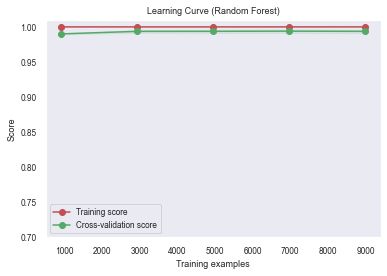

In [1422]:
from sklearn.ensemble import RandomForestClassifier
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest)', X_scaled_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### 8.4. Undersampling i oversampling classification

In [977]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

Note: you may need to restart the kernel to use updated packages.
    package                    |            build
    ---------------------------|-----------------

    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1




imbalanced-learn-0.7 | 97 KB     |            |   0% 
imbalanced-learn-0.7 | 97 KB     | #6         |  17% 
imbalanced-learn-0.7 | 97 KB     | ########## | 100% 
imbalanced-learn-0.7 | 97 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done


In [1418]:
model = RandomForestClassifier(n_estimators= 600,min_samples_split= 10, min_samples_leaf = 1,
                                       max_leaf_nodes= 3,max_features= 'auto',max_depth= 7)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]

In [1419]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
X_scaled_train, y_train = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
model = RandomForestClassifier(n_estimators= 600,min_samples_split= 10, min_samples_leaf = 1,
                                       max_leaf_nodes= 3,max_features= 'auto',max_depth= 7)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_scaled_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.918


Ostateczny model po optymalizacji osiągnął wynik ROC AUC w wysokości 0,918, co oznacza, że finalny model jest w stanie w ponad 91% przewidzieć czy dany pożyczkobiorca spłaci swoje zobowiązanie czy nie.

In [1420]:
model.fit(X_scaled_train, y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=3, min_samples_split=10,
                       n_estimators=600)

### 8.5. Wyznaczenie krzywej ROC

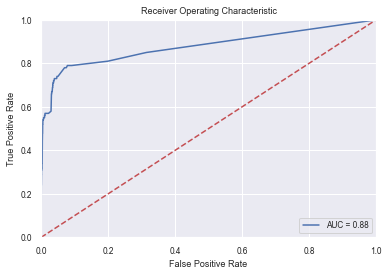

In [1421]:
import sklearn.metrics as metrics
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()